<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 20px; 
    background: linear-gradient(125deg, #d73027 7%, #fdae61 47%, #a6d96a 85%, #1a9850 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🚀 Spaceship Titanic 🧑‍🚀
    </h1>
</div>


# 📂 Overview

* **Background**
  In the year 2912, the passenger spaceship “Spaceship Titanic” collided with a **spacetime anomaly**, causing a large number of passengers to become **transported to another dimension**.

* **Goal of the Project**
  Build a machine learning model to **predict a binary label** for each passenger: whether they were **transported or not** (`Transported` = True/False).

🧾 **Key Features**

🎯 **Target Variable** <br>
- `Transported`: *Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.*

**General Property Characteristics** <br>
- `PassengerId`: A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- `HomePlanet`: The planet the passenger departed from, typically their planet of permanent residence.
- `CryoSleep`: Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- `Cabin`: The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- `Destination`: The planet the passenger will be debarking to.
- `Age`: The age of the passenger.
- `VIP`: Whether the passenger has paid for special VIP service during the voyage.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`: Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- `Name`: The first and last names of the passenger.

📁 **Files Provided**

* `train.csv`: the training set.
* `test.csv`: the test set.
* `Sample_submission.csv`: A submission file in the correct format.

(Source: [Kaggle Dataset](https://www.kaggle.com/competitions/spaceship-titanic/data)) 


🎯 **Project Objective**

The primary objective of this notebook is to **build machine learning model to predict and EDA**.

Key components of the approach include:

* **🔍 Exploratory Data Analysis (EDA):** Understand feature distributions, relationships.
* **⚙️ Feature Engineering:** Encode categorical variables and align schema across training and test data.
* **📈 Modeling:** Train with some models and choise the best model for predicting.
* **🔢 Multi-Label Prediction Strategy:** Generate predictions for each test row.
* **🧪 Evaluation Framework:** <br>
  * Cross-validation.
  * Metrics: Accuracy, F1-score, ROC-AUC, Confusion matrix

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [113]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Metrics
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
import scikit_posthocs as sp

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500) # To display all the columns of dataframe
pd.set_option('max_colwidth', None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>

In [114]:
# Load the datasets
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Verify shapes
print("Train Data Shape:", df_train.shape)
print("\nTest Data Shape:", df_test.shape)

Train Data Shape: (8693, 14)

Test Data Shape: (4277, 13)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>

In [115]:
# Display few rows of each dataset
print("Train Data Preview:")
display(df_train.tail())

print("\nTest Data Preview:")
display(df_test.head())

Train Data Preview:


PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True


Test Data Preview:


PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [116]:
# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 

## Insights from Initial Data Exploration

**Dataset Size and Structure**  
   - The **training dataset** contains 8693 samples with 14 columns, including the target variable `Transported`.
   - The **test dataset** includes 4277 samples with 13 columns (without the target), ready for prediction.

**Feature Overview**  
   - Both datasets include all important attributes:  
     - **Numerical features:** `Age`, `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`.
     - **Categorical features:** `PassengerId`, `HomePlanet`, `CryoSleep`, `Cabin`, `Destination`, `VIP`, `Name`.
   - The target variable is bool value but we need to convert to int8 to be compatible with any ML models.

**Data Consistency and Completeness**  
   - The datasets have **missing values**, we need to handle this issue.
   - Data types are appropriate: numerical features is float64, and categorical features are objects (strings).
   - The column `Name`is first and last names of the passenger. So this column is not really a part of the information we should care about. We can drop this column for both train and test data.

In [117]:
df_train.drop("Name", axis=1, inplace=True)
df_test.drop("Name", axis=1, inplace=True)

In [118]:
print("Train Data describe:")
cm = sns.light_palette("blue", as_cmap=True)
display(df_train.describe().T.style.background_gradient(cmap=cm))

print("\nTest Data describe:")
display(df_test.describe().T.style.background_gradient(cmap=cm))

Train Data describe:



Test Data describe:


## Descriptive Insights from Dataset Statistics

🧾 Detailed Observations from the Image

**1. Age**

| Set   | Mean  | Std Dev | Median | Max |
| ----- | ----- | ------- | ------ | --- |
| Train | 28.83 | 14.49   | 27     | 79  |
| Test  | 28.65 | 14.18   | 26     | 79  |

→ Very similar in terms of average, standard deviation, and percentiles.

**2. Spending Features (`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`)**

**Mean, standard deviation, min, max, and quartiles are all closely aligned between train and test.**

Some examples:

| Feature     | Train Mean | Test Mean | Train 75% | Test 75% |
| ----------- | ---------- | --------- | --------- | -------- |
| RoomService | 224.7      | 219.3     | 47        | 53       |
| FoodCourt   | 458.1      | 439.5     | 76        | 78       |
| Spa         | 311.1      | 303.1     | 59        | 50       |
| VRDeck      | 304.9      | 310.7     | 46        | 36       |

→ The distributions are **very consistent**, showing no signs of data shift or leakage.

**Conclusion:**

* ✅ **Train and test sets have nearly identical statistical distributions** <br>
  → We can **confidently train our model on the train set and expect good performance on the test set**.

In [119]:
print("Train Data describe:")
df_train.describe(include=["category", "object"]).T

Train Data describe:


count unique          top  freq
PassengerId  8693   8693      9280_02     1
HomePlanet   8492      3        Earth  4602
CryoSleep    8476      2        False  5439
Cabin        8494   6560      G/734/S     8
Destination  8511      3  TRAPPIST-1e  5915
VIP          8490      2        False  8291

In [120]:
print("\nTest Data describe:")
df_test.describe(include=["category", "object"]).T


Test Data describe:


count unique          top  freq
PassengerId  4277   4277      9277_01     1
HomePlanet   4190      3        Earth  2263
CryoSleep    4184      2        False  2640
Cabin        4177   3265      G/160/P     8
Destination  4185      3  TRAPPIST-1e  2956
VIP          4184      2        False  4110

## Insights on Categorical Features

1. `HomePlanet` (3 categories: Earth, Europa, Mars)

| Set   | Top Value | Freq | % Top |
| ----- | --------- | ---- | ----- |
| Train | Earth     | 4602 | \~54% |
| Test  | Earth     | 2263 | \~54% |

→ **Very consistent distribution** between train and test.


2. `CryoSleep` (True/False)

| Set   | Top Value | Freq | % Top |
| ----- | --------- | ---- | ----- |
| Train | False     | 5439 | \~64% |
| Test  | False     | 2640 | \~63% |

→ Nearly identical proportions.

3. `Destination` (3 categories)

| Set   | Top Value   | Freq |
| ----- | ----------- | ---- |
| Train | TRAPPIST-1e | 5915 |
| Test  | TRAPPIST-1e | 2956 |

→ Balanced and aligned in both sets.

4. `VIP` (True/False)

| Set   | Top Value | Freq | % Top   |
| ----- | --------- | ---- | ------- |
| Train | False     | 8291 | \~97.6% |
| Test  | False     | 4110 | \~98.2% |

→ Very close proportions — no distribution shift.

5. `Cabin` (Highly unique values)

* Train: 6,560 unique cabin values
* Test: 3,265 unique cabin values
* Top frequency is just 8 → indicates strong dispersion <br>
  → ❗ Suggestion: it's better to **split `Cabin` into `Deck`, `Number`, and `Side`** rather than using the raw string.

**Conclusion:**

* The distributions of **categorical features are highly consistent between train and test** <br>
  → The model can learn well on the train set and **generalize effectively to the test set** <br>
  → **No need for domain adaptation, rebalancing, or other special techniques**

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Handling Missing Value
### Numerical feature

In [121]:
def displayNULL(df, dataset_name = None, style = 1):
    if style == 1 and dataset_name is None:
        for column in df.columns:
            if df[column].isna().sum() > 0:
                print(f"Column: {column}: {df[column].isnull().sum()}")
            else:
                pass
    else:
        missing_count = df.isnull().sum().sum()
        rows = len(df)
        
        print("=" * 40)
        print(f"{dataset_name} Missing Value Analysis")
        print("=" * 40)
        
        if missing_count == 0:
            print(f"✅ No missing values detected in {rows:,} rows")
        else:
            print(f"⚠️  {missing_count} missing values found in {rows:,} rows")

print("Missing value train dataset: ")
displayNULL(df=df_train)

print("\nMissing value test dataset: ")
displayNULL(df=df_test)

Missing value train dataset: 
Column: HomePlanet: 201
Column: CryoSleep: 217
Column: Cabin: 199
Column: Destination: 182
Column: Age: 179
Column: VIP: 203
Column: RoomService: 181
Column: FoodCourt: 183
Column: ShoppingMall: 208
Column: Spa: 183
Column: VRDeck: 188

Missing value test dataset: 
Column: HomePlanet: 87
Column: CryoSleep: 93
Column: Cabin: 100
Column: Destination: 92
Column: Age: 91
Column: VIP: 93
Column: RoomService: 82
Column: FoodCourt: 106
Column: ShoppingMall: 98
Column: Spa: 101
Column: VRDeck: 80


In [122]:
# Fill value for numerical feature.
def fill_missing_value(df):
    for column in df.select_dtypes(include="number").columns:
        if df[column].isna().sum() > 0:
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            pass
fill_missing_value(df=df_train)
fill_missing_value(df=df_test)

In [123]:
print("Missing value train dataset after filling value for numerical feature: ")
displayNULL(df=df_train)

print("\nMissing value test dataset after filling value for numerical feature: ")
displayNULL(df=df_test)

Missing value train dataset after filling value for numerical feature: 
Column: HomePlanet: 201
Column: CryoSleep: 217
Column: Cabin: 199
Column: Destination: 182
Column: VIP: 203

Missing value test dataset after filling value for numerical feature: 
Column: HomePlanet: 87
Column: CryoSleep: 93
Column: Cabin: 100
Column: Destination: 92
Column: VIP: 93


### Categorical feature

In [124]:
# Fill value for categorical feature.
def fill_missing_value_categorical(df):
    for column in df.select_dtypes(include=["object", "category"]).columns:
        if df[column].isna().sum() > 0:
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            pass
fill_missing_value_categorical(df=df_train)
fill_missing_value_categorical(df=df_test)

In [125]:
datasets = {
    "Training Data": df_train,
    "Test Data": df_test
}

for name, data in datasets.items():
    displayNULL(df=data, dataset_name=name, style=2)
    print()

Training Data Missing Value Analysis
✅ No missing values detected in 8,693 rows

Test Data Missing Value Analysis
✅ No missing values detected in 4,277 rows



## Checking duplicate Value

In [126]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Training Data": df_train,
    "Test Data": df_test
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Training Data Duplicate Analysis
✅ No duplicates found in 8,693 rows

🔍 Test Data Duplicate Analysis
✅ No duplicates found in 4,277 rows



## Feature Engineering

In [127]:
# Refer from notebook Gowtham G -san: https://www.kaggle.com/code/gowtham1805/eda-spaceship-titanic#Data-Preprocessing
df_train[["CabinDeck", "CabinNum", "CabinSide"]] = df_train["Cabin"].str.split("/", expand=True)
df_test[["CabinDeck", "CabinNum", "CabinSide"]] = df_test["Cabin"].str.split("/", expand=True)
df_train["CabinNum"] = pd.to_numeric(df_train["CabinNum"], errors="coerce")
df_test["CabinNum"] = pd.to_numeric(df_test["CabinNum"], errors="coerce")

df_train[["Group", "PassengerNum"]] = df_train["PassengerId"].str.split("_", expand = True)
df_test[["Group", "PassengerNum"]] = df_test["PassengerId"].str.split("_", expand = True)
df_train["Group"] = pd.to_numeric(df_train["Group"], errors="coerce")
df_test["Group"] = pd.to_numeric(df_test["Group"], errors="coerce")
df_train["PassengerNum"] = pd.to_numeric(df_train["PassengerNum"], errors="coerce")
df_test["PassengerNum"] = pd.to_numeric(df_test["PassengerNum"], errors="coerce")

df_train["TotalAmount"] = df_train[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)
df_test["TotalAmount"] = df_test[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)

group_counts_train = df_train["Group"].value_counts()
df_train["GroupSize"] = df_train["Group"].map(group_counts_train)
df_train["IsAlone"] = (df_train["GroupSize"] == 1)

group_counts_test = df_test["Group"].value_counts()
df_test["GroupSize"] = df_test["Group"].map(group_counts_test)
df_test["IsAlone"] = (df_test["GroupSize"] == 1)

In [128]:
# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Transported   8693 non-null   bool   
 13  CabinDeck     8693 non-null   object 
 14  CabinNum      8693 non-null   int64  
 15  CabinSide     8693 non-null   object 
 16  Group         8693 non-null   int64  
 17  PassengerNum  8693 non-null   int64  
 18  TotalAmount

- Based on the description of this dataset, we need to create some features `CabinDeck`, `CabinNum`, `CabinSide`, `Group`, `PassengerNum`, `TotalAmount`, `GroupSize` and `IsAlone`. Of course the columns `PassengerId`, `Cabin` will be dropped.
- About column `PassengerId` in test data, we will copy to prepare submission file.

In [129]:
df_train.drop(columns=["PassengerId", "Cabin"], axis=1, inplace=True)
list_test_PassengerId = df_test["PassengerId"].copy().to_list()
df_test.drop(columns=["PassengerId", "Cabin"], axis=1, inplace=True)

In [130]:
# convert type data for categorical feature to category
cat_features = ["HomePlanet", "Destination", "CabinDeck", "CabinSide"]
def convert_cat(df, cat_features= cat_features):
    for feature in cat_features:
        if feature in df.columns:
            df[feature] = df[feature].astype("category")
        else:
            pass

convert_cat(df=df_train)
convert_cat(df=df_test)

df_train["Transported"] = df_train["Transported"].astype("int8")
df_train["CryoSleep"] = df_train["CryoSleep"].astype("int8")
df_train["VIP"] = df_train["VIP"].astype("int8")
df_train["IsAlone"] = df_train["IsAlone"].astype("int8")
df_test["CryoSleep"] = df_test["CryoSleep"].astype("int8")
df_test["VIP"] = df_test["VIP"].astype("int8")
df_test["IsAlone"] = df_test["IsAlone"].astype("int8")

cat_features.extend(["CryoSleep", "VIP", "IsAlone"])

# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    8693 non-null   category
 1   CryoSleep     8693 non-null   int8    
 2   Destination   8693 non-null   category
 3   Age           8693 non-null   float64 
 4   VIP           8693 non-null   int8    
 5   RoomService   8693 non-null   float64 
 6   FoodCourt     8693 non-null   float64 
 7   ShoppingMall  8693 non-null   float64 
 8   Spa           8693 non-null   float64 
 9   VRDeck        8693 non-null   float64 
 10  Transported   8693 non-null   int8    
 11  CabinDeck     8693 non-null   category
 12  CabinNum      8693 non-null   int64   
 13  CabinSide     8693 non-null   category
 14  Group         8693 non-null   int64   
 15  PassengerNum  8693 non-null   int64   
 16  TotalAmount   8693 non-null   float64 
 17  GroupSize     8693 non-null   int64

## Checking Outlier Value

In [131]:
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)

num_features = ["Age",  "RoomService",  "FoodCourt",  "ShoppingMall",  "Spa",  "VRDeck",  "CabinNum",  "Group",  "PassengerNum",  "TotalAmount",  "GroupSize"]
checking_outlier(list_feature=num_features, df=df_train, dataset_name="Training data")

🔍 Training data Checking outlier


Feature  Outlier Count  \
0           Age            162   
1   RoomService           1906   
2     FoodCourt           1916   
3  ShoppingMall           1879   
4           Spa           1833   
5        VRDeck           1849   
6  PassengerNum            493   
7   TotalAmount            934   
8     GroupSize            335   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Outlier Detail  
0                                                                                                                                                                                                                              [64.0, 67.0, 63.0, 67.0, 63.0, 79.0, 68.0, 74.0, 64.0, 65.0, 63.0, 79.0, 65.0, 67.0, 65.0, 67.0, 71.0, 74.0, 64.0, 71.0, 64.0, 75.0, 67.0, 65.0, 67.0, 70.0, 63.0, 76.0, 63.0, 63.0, 78.0, 64.0, 70.0, 67.0, 73.0, 67.0, 65.0, 64.0, 63.0, 63.0, 64.0, 64.0, 68.0, 65.0, 66.0, 63.0, 75.0, 67.0, 70.0, 69.0, 69.0, 69.0, 78.0, 63.0, 71.0, 72.0, 71.0, 68.0, 70.0, 66.0, 69.0, 73.0, 71.0, 74.0, 77.0, 68.0, 64.0, 64.0, 73.0, 64.0, 72.0, 65.0, 74.0, 74.0, 64.0, 70.0, 64.0, 77.0, 67.0, 73.0, 63.0, 63.0, 65.0, 66.0, 65.0, 68.0, 63.0, 75.0, 65.0, 63.0, 64.0, 64.0, 68.0, 64.0, 63.0, 65.0, 65.0, 63.0, 65.0, 64.0, ...]  
1                                                                                     [109.0, 303.0, 719.0, 1286.0, 412.0, 980.0, 1125.0, 214.0, 784.0, 554.0, 970.0, 790.0, 279.0, 1946.0, 793.0, 887.0, 190.0, 147.0, 7406.0, 688.0, 211.0, 311.0, 1743.0, 562.0, 2209.0, 701.0, 2353.0, 2103.0, 2738.0, 440.0, 1072.0, 4119.0, 1365.0, 287.0, 3414.0, 406.0, 1052.0, 902.0, 848.0, 192.0, 147.0, 367.0, 1517.0, 122.0, 2237.0, 1215.0, 1933.0, 1230.0, 915.0, 1406.0, 181.0, 637.0, 313.0, 2947.0, 335.0, 272.0, 702.0, 1664.0, 118.0, 146.0, 368.0, 1194.0, 331.0, 386.0, 1018.0, 247.0, 443.0, 5715.0, 695.0, 417.0, 121.0, 434.0, 142.0, 520.0, 2001.0, 148.0, 358.0, 2832.0, 116.0, 5649.0, 198.0, 348.0, 391.0, 1056.0, 1770.0, 353.0, 177.0, 1134.0, 691.0, 1094.0, 417.0, 1483.0, 382.0, 2484.0, 1869.0, 1352.0, 757.0, 210.0, 2156.0, 865.0, ...]  
2                                                                           [3576.0, 1283.0, 483.0, 1539.0, 785.0, 7295.0, 974.0, 225.0, 6073.0, 850.0, 964.0, 492.0, 195.0, 164.0, 605.0, 1096.0, 592.0, 153.0, 258.0, 2165.0, 8397.0, 5840.0, 697.0, 1208.0, 856.0, 2811.0, 427.0, 410.0, 331.0, 11418.0, 2537.0, 157.0, 2223.0, 2344.0, 597.0, 334.0, 418.0, 420.0, 1688.0, 985.0, 10346.0, 219.0, 972.0, 2433.0, 1720.0, 188.0, 281.0, 888.0, 1249.0, 3571.0, 695.0, 615.0, 172.0, 4810.0, 231.0, 2390.0, 918.0, 654.0, 1281.0, 587.0, 4458.0, 6500.0, 422.0, 584.0, 175.0, 230.0, 540.0, 2628.0, 4651.0, 317.0, 349.0, 2876.0, 1198.0, 212.0, 1068.0, 215.0, 235.0, 2491.0, 773.0, 747.0, 5728.0, 11003.0, 608.0, 420.0, 896.0, 465.0, 7255.0, 157.0, 1170.0, 3584.0, 4118.0, 10116.0, 1026.0, 891.0, 5637.0, 1043.0, 429.0, 4288.0, 185.0, 869.0, ...]  
3                                                                                                                 [371.0, 151.0, 589.0, 1123.0, 65.0, 876.0, 69.0, 136.0, 81.0, 1411.0, 1750.0, 180.0, 1938.0, 3374.0, 148.0, 197.0, 446.0, 738.0, 1018.0, 1295.0, 670.0, 957.0, 526.0, 570.0, 326.0, 87.0, 804.0, 429.0, 296.0, 730.0, 126.0, 97.0, 21

In [132]:
checking_outlier(list_feature=num_features, df=df_test, dataset_name="Test data")

🔍 Test data Checking outlier


Feature  Outlier Count  \
0           Age             54   
1   RoomService            919   
2     FoodCourt            931   
3  ShoppingMall            912   
4           Spa            921   
5        VRDeck            927   
6  PassengerNum            222   
7   TotalAmount            423   
8     GroupSize            543   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Outlier Detail  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      [66.0, 70.0, 65.0, 79.0, 74.0, 67.0, 69.0, 66.0, 72.0, 75.0, 65.0, 67.0, 73.0, 73.0, 71.0, 69.0, 70.0, 67.0, 75.0, 78.0, 71.0, 66.0, 69.0, 65.0, 73.0, 65.0, 67.0, 77.0, 69.0, 65.0, 66.0, 72.0, 68.0, 69.0, 73.0, 68.0, 74.0, 66.0, 67.0, 79.0, 65.0, 66.0, 69.0, 66.0, 66.0, 65.0, 66.0, 72.0, 65.0, 66.0, 65.0, 65.0, 73.0, 65.0]  
1                                                                                     [339.0, 932.0, 1784.0, 293.0, 598.0, 483.0, 1037.0, 3966.0, 413.0, 378.0, 832.0, 362.0, 756.0, 197.0, 261.0, 1669.0, 717.0, 4762.0, 741.0, 786.0, 2556.0, 186.0, 1340.0, 696.0, 1542.0, 3186.0, 1054.0, 301.0, 123.0, 212.0, 376.0, 1031.0, 356.0, 638.0, 1395.0, 130.0, 273.0, 288.0, 731.0, 1678.0, 4908.0, 708.0, 642.0, 658.0, 239.0, 189.0, 129.0, 128.0, 1030.0, 246.0, 648.0, 1729.0, 4105.0, 441.0, 760.0, 3424.0, 4922.0, 1063.0, 2221.0, 286.0, 2543.0, 1644.0, 755.0, 499.0, 748.0, 1045.0, 632.0, 596.0, 710.0, 1279.0, 1344.0, 466.0, 1661.0, 559.0, 720.0, 266.0, 530.0, 1705.0, 472.0, 178.0, 149.0, 3682.0, 830.0, 2227.0, 182.0, 2577.0, 698.0, 869.0, 2024.0, 3160.0, 780.0, 299.0, 1399.0, 589.0, 1246.0, 176.0, 1793.0, 411.0, 483.0, 901.0, ...]  
2                                                                  [6652.0, 1615.0, 639.0, 1561.0, 7708.0, 1925.0, 878.0, 6977.0, 6452.0, 3495.0, 619.0, 870.0, 1736.0, 869.0, 2872.0, 315.0, 514.0, 402.0, 8853.0, 463.0, 772.0, 275.0, 516.0, 3833.0, 25273.0, 1442.0, 334.0, 678.0, 627.0, 11549.0, 755.0, 1252.0, 1030.0, 1468.0, 1704.0, 722.0, 538.0, 251.0, 1192.0, 183.0, 2116.0, 1347.0, 870.0, 2522.0, 1378.0, 345.0, 2081.0, 6442.0, 752.0, 547.0, 9352.0, 804.0, 379.0, 1032.0, 492.0, 428.0, 430.0, 1528.0, 1048.0, 5718.0, 875.0, 379.0, 1415.0, 1502.0, 437.0, 2352.0, 725.0, 480.0, 885.0, 1029.0, 2490.0, 4733.0, 3410.0, 1288.0, 1857.0, 3326.0, 1641.0, 372.0, 1704.0, 3636.0, 324.0, 2673.0, 699.0, 171.0, 2935.0, 4958.0, 1124.0, 1277.0, 8179.0, 6915.0, 405.0, 695.0, 175.0, 382.0, 363.0, 908.0, 2983.0, 458.0, 1286.0, 784.0, ...]  
3                                                                                              [635.0, 263.0, 136.0, 253.0, 243.0, 5273.0, 87.0, 135.0, 1235.0, 1585.0, 997.0, 82.0, 571.0, 2305.0, 6108.0, 521.0, 148.0, 705.0, 1175.0, 1404.0, 206.0, 242.0, 565.0, 8098.0, 78.0, 728.0, 2839.0, 462.0, 138.0, 7022.0, 79.0, 1299.0, 422.0, 242.0, 132.0,

## Data Quality Insights: Missing Values, Duplicates and Outliers

**Missing Values Analysis**

- We conducted a thorough check for missing values across the **training**, **test** datasets.  
- The **missing values** were detected in the datasets. I used method **mode** to fill missing value for both categorical and numerical features.
- This completeness of data simplifies preprocessing since we do not need to perform imputation or remove incomplete records.

**Duplicate Records Analysis**

- We examined the datasets for duplicate rows that could bias the model or inflate performance metrics.  
- **No duplicate records** were found in any dataset, confirming the uniqueness and integrity of each sample:  
  - Training Data: 0 duplicates out of 8693 rows  
  - Test Data: 0 duplicates out of 4277 rows 
- The absence of duplicates ensures that the model will not be trained or evaluated on repeated data points, which helps maintain the reliability of results.

**Outliers Records Analysis**

- We also examined the datasets for checking outliers.
- **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis (EDA)</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis (EDA)
    </h1>
</div>

**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA

| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated

| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [133]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [134]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables 
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals 
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).
    
    target_feature : str
        Name of the second categorical variable (typically the target label).
    
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.
    
    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap 
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.
    
    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\n📈 Standardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(8, 6))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}")
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    """
    Perform the Shapiro–Wilk test to assess normality of a numerical feature 
    within each group defined by a categorical feature.

    This function iterates through all unique, non-null values of a categorical variable,
    and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
    Optionally, it displays a Q-Q plot to visually assess the distribution.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    plot_result : bool, optional (default=False)
        If True, displays a Q-Q plot for each group to visually assess normality.

    Returns
    -------
    None
        Prints the Shapiro–Wilk test statistic and p-value for each group,
        and optionally shows a Q-Q plot.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - The test is not reliable for n > 5000 (as per scipy recommendation).
    - Requires at least 3 non-null values per group.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    - https://www.statskingdom.com/shapiro-wilk-test.html
    """

    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" 🟢 Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" ⚪ Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    """
    Perform Levene’s test to assess the equality (homogeneity) of variances 
    for a numeric feature across two or more groups defined by a categorical feature.

    Levene's test is used to verify the assumption of equal variances 
    (homoscedasticity), which is important for parametric tests such as the 
    independent t-test and ANOVA.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the features to test.

    categorical_feature : str
        The name of the categorical column that defines the grouping.

    num_feature : str
        The name of the numerical column whose variance is being compared across groups.

    center : str, optional (default="mean")
        Specifies the measure of central tendency to use when calculating deviations:
        - "mean": classic Levene's test (sensitive to non-normal data)
        - "median": more robust to non-normal distributions (Brown–Forsythe test)

    Returns
    -------
    None
        Prints the Levene test statistic, p-value, and an interpretation of whether 
        the variances are equal or significantly different.

    Notes
    -----
    - H₀ (Null Hypothesis): All groups have equal variances.
    - H₁ (Alternative Hypothesis): At least one group has different variance.
    - If p > 0.05 → Fail to reject H₀ → Variances are approximately equal.
    - If p ≤ 0.05 → Reject H₀ → Variances are significantly different (heteroscedasticity).

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    - https://www.geeksforgeeks.org/levenes-test-in-python/
    """

    print(f"🔍 Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()    
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]    
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)
    
    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("🟢 Variances are approximately equal across groups.")
    else:
        print("⚪ Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there 
    is a statistically significant difference in the distribution of a numerical feature 
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    # Calculate Z and effect size r
    n1, n2 = len(group1), len(group2)
    u_mean = n1 * n2 / 2
    u_std = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (stat - u_mean) / u_std
    r = abs(z) / np.sqrt(n1 + n2)

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")
    print(f"Z-score     : {z}")
    print(f"Effect size : r = {r}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (p ≤ 0.05).")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (p > 0.05).")

    if r < 0.1:
        print("Effect size: negligible")
    elif r < 0.3:
        print("Effect size: small")
    elif r < 0.5:
        print("Effect size: medium")
    else:
        print("Effect size: large")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    """
    Perform an Independent Two-Sample T-Test and compute Cohen's d to evaluate 
    the difference between two independent groups on a numeric variable.

    This function tests whether the means of two independent groups are statistically different,
    and also calculates the magnitude of the difference (effect size) using Cohen's d.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame containing the categorical and numerical features.

    categorical_feature : str
        The name of the categorical column used to define the two groups (must have exactly 2 unique values).

    num_feature : str
        The name of the numerical feature to compare between the two groups.

    equal_var : bool, optional (default=False)
        Assumes equal population variance if True (Student’s t-test). If False (default), performs Welch’s t-test.

    Returns
    -------
    None
        Prints the t-statistic, p-value, Cohen’s d, and interpretation of the effect size.

    Notes
    -----
    - H₀ (null hypothesis): The two groups have equal means.
    - H₁ (alternative): The means are significantly different.
    - Cohen's d interpretation:
        - 0.2  → small effect
        - 0.5  → medium effect
        - 0.8+ → large effect
    - Welch’s t-test is recommended when group variances are unequal (default setting).

    References
    ----------
    - https://www.scribbr.com/statistics/t-test/
    - https://en.wikipedia.org/wiki/Cohen%27s_d
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically 
    significant differences between the means of three or more independent groups. 

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically 
    significant differences in the distribution of a numeric variable across 
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction 
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and 
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def cal_Anderson(df, numerical_col, group_col):
    """
    Perform the Anderson–Darling test to assess whether the data within each group 
    follows a normal distribution.

    This function applies the Anderson-Darling normality test for each subgroup 
    defined by a categorical column, and optionally plots KDE distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset.

    numerical_col : str
        The name of the numeric column to test for normality.

    group_col : str
        The name of the categorical column defining the groups to be tested separately.

    Returns
    -------
    None
        Prints the Anderson–Darling test statistic, critical values, and interpretation
        for each group. Optionally displays a KDE plot for visual comparison.

    Notes
    -----
    - H₀ (null hypothesis): The data follows a normal distribution.
    - If test statistic > critical value → ❌ Reject H₀ → Data is not normally distributed.
    - If test statistic ≤ critical value → ✅ Fail to reject H₀ → Data may be normal.
    - The test is more sensitive to deviations in the tails of the distribution than other tests like Shapiro-Wilk.

    Limitations
    ----------
    - Not recommended for very small sample sizes (< 8).
    - Not reliable for very large sample sizes where even small deviations may be flagged.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
    - https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
    - https://en.wikipedia.org/wiki/Anderson–Darling_test
    """

    groups = df[group_col].dropna().unique()
    
    print(f"📊 Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test:\n")
    print("ℹ️  H₀: The data follows a normal distribution.")
    print("ℹ️  If test statistic > critical value → ❌ Reject H₀ → Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")
        
        print(f"Group = {group}")
        print(f"  - Sample size: {len(data)}")
        print(f"  - Test statistic: {result.statistic:.4f}")
        
        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "❌ Reject H₀ → Not normal" if result.statistic > cv else "✅ Fail to reject H₀ → Possibly normal"
            print(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        print()

## Transported Distribution

In [135]:
df_train["Transported"].value_counts()

Transported
1    4378
0    4315
Name: count, dtype: int64

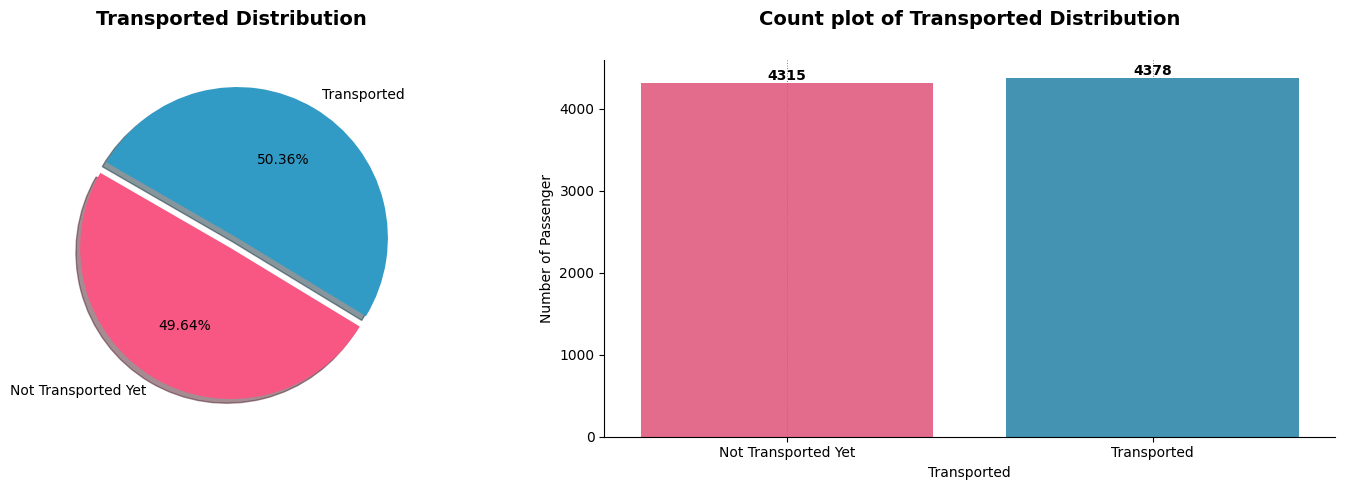

In [136]:
attri_Distribution  = df_train["Transported"].value_counts().loc[[0, 1]]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 5))
# ax[0]
ax[0].pie(
    attri_Distribution,
    labels = ["Not Transported Yet", "Transported"],
    colors = color(n_colors=2),
    autopct = "%1.2f%%",
    startangle = 150,
    explode = (0, 0.08),
    shadow= True
)
ax[0].set_title("Transported Distribution", weight="bold", fontsize=14, pad=25)
ax[0].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)

# ax[1]
sns.countplot(data=df_train, x = "Transported", palette=color(n_colors=2), ax=ax[1])
ax[1].set_title("Count plot of Transported Distribution", weight="bold", fontsize=14, pad=25)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%d", label_type="edge", fontsize=10, weight="bold")
ax[1].set_ylabel("Number of Passenger")
ax[1].set_xticks([0, 1], ["Not Transported Yet", "Transported"])
ax[1].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.show()

***The difference is very small, only about 0.7%. This indicates the data is fairly evenly distributed between the two groups. If you're using this for training a machine learning model, it's an ideal dataset — avoids the issue of label imbalance.***

## Numerical Feature Distributions

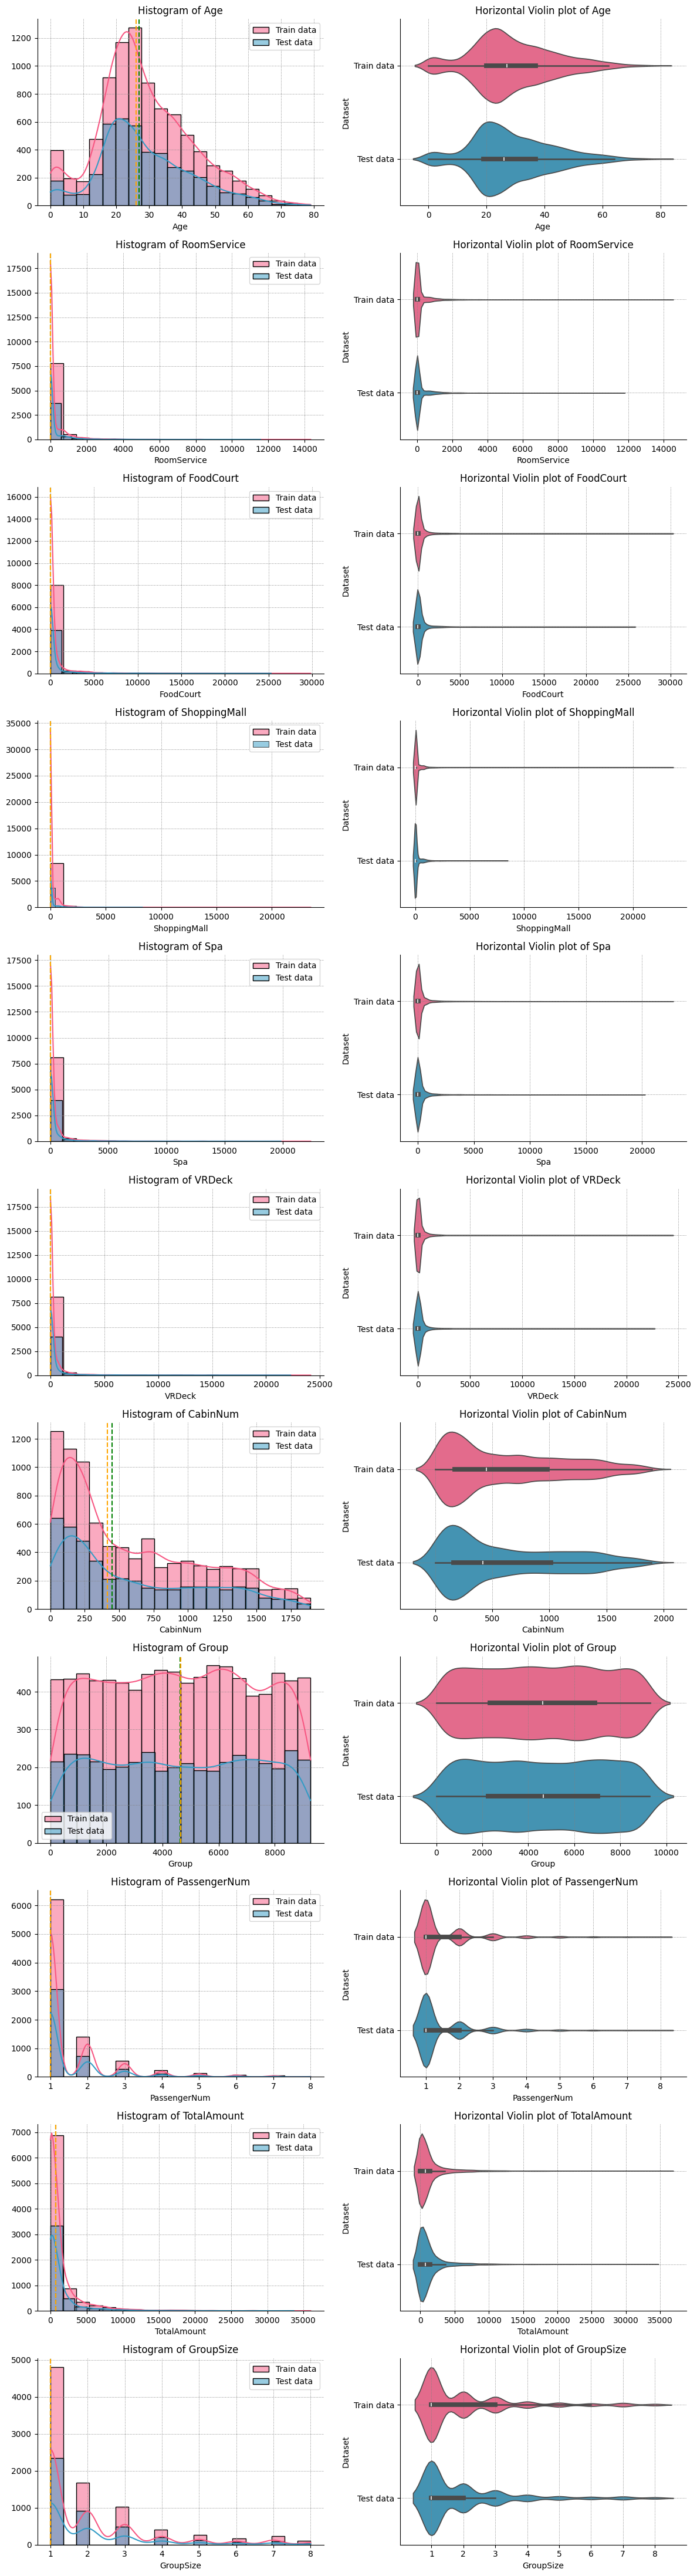

In [137]:
def plot_numerical_features(df_train, df_test, num_features):
    colors = color()
    n = len(num_features)

    fig, axes = plt.subplots(n, 2, figsize=(12, n * 4))
    axes = np.array(axes).reshape(n, 2)

    for i, feature in enumerate(num_features):
        sns.histplot(data=df_train[feature], color=colors[0], bins=20, kde=True, ax=axes[i, 0], label="Train data")
        sns.histplot(data=df_test[feature], color=colors[1], bins=20, kde=True, ax=axes[i, 0], label="Test data")
        axes[i, 0].set_title(f"Histogram of {feature}")
        axes[i, 0].legend()
        # axes[i, 0].set_facecolor("lightgray")
        axes[i, 0].set_ylabel("")
        axes[i, 0].grid(color="gray", linestyle=":", linewidth=0.7)
        axes[i, 0].axvline(df_train[feature].median(), color="green", linestyle="--", label="Median Train")
        axes[i, 0].axvline(df_test[feature].median(), color="orange", linestyle="--", label="Median Test")
        sns.despine(left=False, bottom=False, ax=axes[i, 0])

        df_plot = pd.concat([
            pd.DataFrame({"Dataset": "Train data", feature: df_train[feature]}),
            pd.DataFrame({"Dataset": "Test data", feature: df_test[feature]})
        ])

        sns.violinplot(
            data=df_plot,
            x=feature,
            y="Dataset",
            palette=colors,
            orient="h",
            ax=axes[i, 1]
        )
        axes[i, 1].set_title(f"Horizontal Violin plot of {feature}")
        # axes[i, 1].set_facecolor("lightgray")
        axes[i, 1].grid(color="gray", linestyle=":", linewidth=0.7)
        sns.despine(left=False, bottom=False, ax=axes[i, 1])

    plt.tight_layout()
    plt.show()

plot_numerical_features(df_train = df_train, df_test = df_test, num_features=num_features)

In [138]:
def check_skewness(data, dataset_name, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for {dataset_name}:")
    print("-"*60)
    print(f"{'Feature':<21} | {'Skewness':<10} | {'Remark'}")
    print("-"*60)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<21} | {skew:>+9.4f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<21} | {skew:>+9.4f} | {remark}")
    print("-"*60)
    return skew_feature, skew_df

skew_feature_train, skew_train_df = check_skewness(df_train, "Train data")
skew_feature_test, skew_test_df = check_skewness(df_test, "Test data")


🔍 Skewness for Train data:
------------------------------------------------------------
Feature               | Skewness   | Remark
------------------------------------------------------------
ShoppingMall          |  +12.7638 | Highly skewed
VRDeck                |   +7.9046 | Highly skewed
Spa                   |   +7.7164 | Highly skewed
FoodCourt             |   +7.1775 | Highly skewed
RoomService           |   +6.3978 | Highly skewed
TotalAmount           |   +4.4176 | Highly skewed
PassengerNum          |   +2.7466 | Highly skewed
GroupSize             |   +1.8890 | Highly skewed
CabinNum              |   +0.7073 | Moderately skewed
Age                   |   +0.4420 | Approximately symmetric
Group                 |   +0.0020 | Approximately symmetric
------------------------------------------------------------

🔍 Skewness for Test data:
------------------------------------------------------------
Feature               | Skewness   | Remark
---------------------------------------

### Insights on Numerical Feature Distributions

**Overall Observation:**

🔍 **The numerical features in the training and test sets show very similar distributions.** Specifically:

* The **distribution curves (histograms)** and **violinplots** for both datasets almost overlap.
* This is a **good sign**: it suggests that the test and training data come from the **same underlying distribution**, and there is **no significant data drift**.

**Detailed observations by feature:**

| Feature          | Histogram                           | Violinplot               | Remark                    |
| ---------------- | ----------------------------------- | --------------------- | ------------------------- |
| **Age**          | Very similar, slightly right-skewed | Similar outliers      | ✅ OK                      |
| **RoomService**  | Highly right-skewed (many zeros)    | Large outliers        | ✅ Similar                 |
| **FoodCourt**    | Highly skewed                       | Significant outliers  | ✅ Consistent              |
| **ShoppingMall** | Strong right skew                   | Many outliers         | ✅ Close                   |
| **Spa**          | Similar to ShoppingMall             | Clear outliers        | ✅ Similar                 |
| **VRDeck**       | Almost overlapping                  | Clear outliers        | ✅ Very consistent         |
| **CabinNum**     | Nearly identical distribution       | Close Violinplots      | ✅ Well-aligned            |
| **Group**        | Repeated groupings                  | Matching distribution | ✅ Slight periodic pattern |
| **PassengerNum** | Consistent trend                    | Aligned Violinplots      | ✅ Good                    |
| **TotalAmount**  | Strong right skew                   | Numerous outliers     | ✅ Matched well            |
| **GroupSize**    | Highly similar                      | Few outliers          | ✅ Clean                   |

**Summary:**

| Assessment                           | Conclusion                             |
| ------------------------------------ | -------------------------------------- |
| Train/Test sets are consistent    | Great for modeling                 |
| Many outliers                     | Consider handling or use robust models |


**Skewness Analysis** <br>

* The **train and test datasets have very similar skewness values** across all numerical features.
* Both sets contain:

  * Many **highly skewed** features (skewness > +1), indicating strong right-skewed distributions.
  * A few **moderately skewed** features (around +0.7).
  * Some features that are **approximately symmetric**, such as `Age` and `Group`.

Details:

| Feature        | Train Skewness | Test Skewness | Observation                             |
| -------------- | -------------- | ------------- | --------------------------------------- |
| `VRDeck`       | +7.9046        | +8.4658       | Strongly right-skewed, very similar ✅  |
| `Spa`          | +7.7164        | +7.7814       | ✅ Similar                             |
| `FoodCourt`    | +7.1775        | +6.9974       | ✅ Similar                             |
| `RoomService`  | +6.3978        | +5.6114       | ✅ Similar                             |
| `ShoppingMall` | +12.7638       | +6.9020       | ⚠️ Still skewed, test is slightly lower|
| `TotalAmount`  | +4.4176        | +4.8102       | ✅ Similar                              |
| `PassengerNum` | +2.7466        | +2.8121       | ✅ Similar                               |
| `GroupSize`    | +1.8890        | +1.9695       | ✅ Similar                               |
| `CabinNum`     | +0.7073        | +0.7197       | **Moderately skewed** ✅                 |
| `Age`          | +0.4420        | +0.5284       | **Approximately symmetric** ✅           |
| `Group`        | +0.0020        | +0.0011       | **Perfectly symmetric** ✅               |

**Conclusion:**

**Skewness is highly consistent between the train and test datasets**, which suggests:

* No **data leakage** or **distribution drift**
* You can apply the same skewness correction methods (e.g., log-transform) to both datasets confidently.


## Correlation Analysis of Numerical Features

In [139]:
def plot_correlation(train_data, test_data, train_name="Train Data", test_name="Test Data"):
    corr_train = train_data.corr(numeric_only=True)
    corr_test = test_data.corr(numeric_only=True)

    mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
    adjusted_mask_train = mask_train[1:, :-1]
    adjusted_cereal_corr_train = corr_train.iloc[1:, :-1]

    mask_test = np.triu(np.ones_like(corr_test, dtype=bool))
    adjusted_mask_test = mask_test[1:, :-1]
    adjusted_cereal_corr_test = corr_test.iloc[1:, :-1]

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

    fig, ax = plt.subplots(1, 2, figsize=(24, 10))

    sns.heatmap(data=adjusted_cereal_corr_train, mask=adjusted_mask_train,
                annot=True, fmt=".1f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[0])
    ax[0].set_title(f"Correlation Heatmap of {train_name}", fontsize=16, weight="bold")

    sns.heatmap(data=adjusted_cereal_corr_test, mask=adjusted_mask_test,
                annot=True, fmt=".1f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[1])
    ax[1].set_title(f"Correlation Heatmap of {test_name}", fontsize=16, weight="bold")

    plt.tight_layout()
    plt.show()

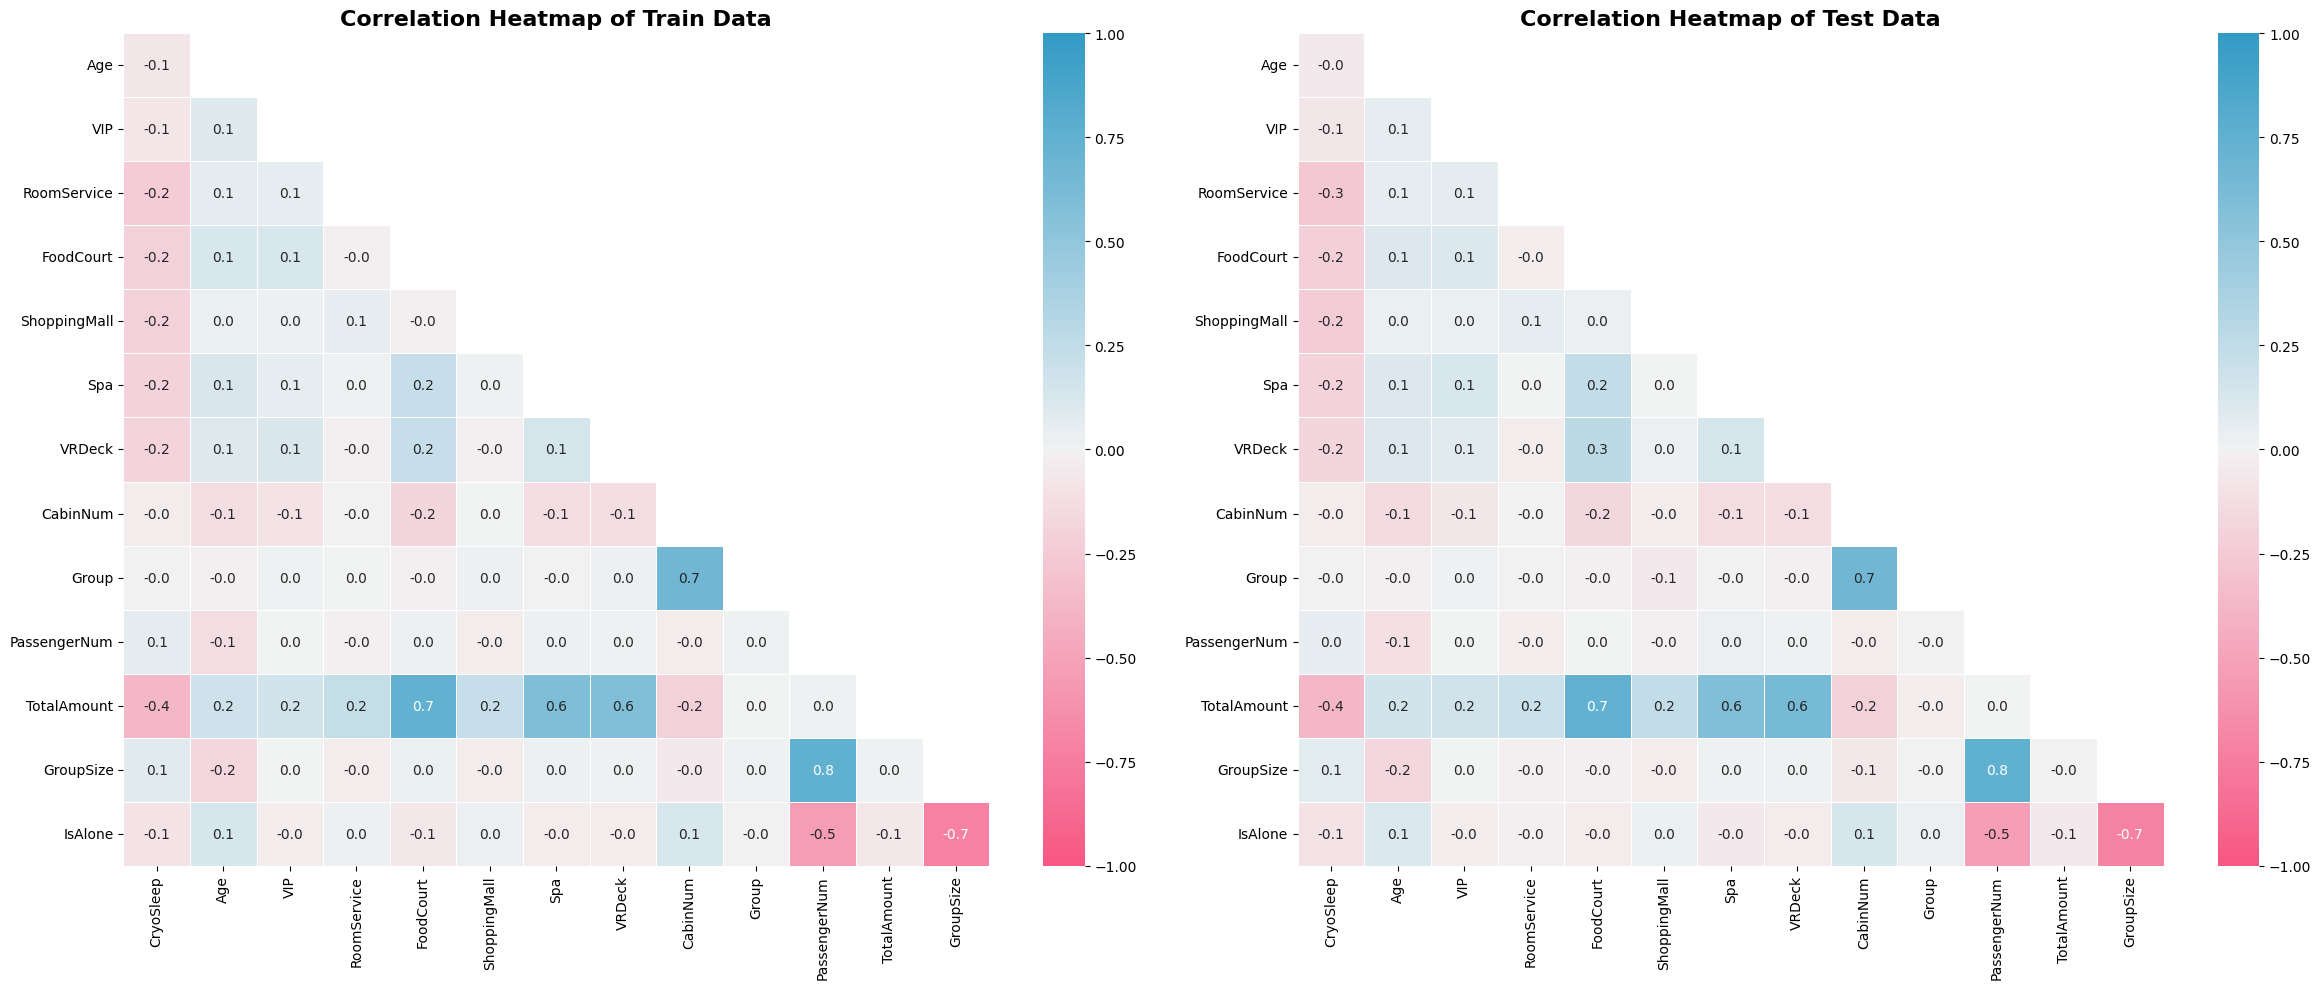

In [140]:
plot_correlation(train_data=df_train.drop(columns="Transported", axis=1), test_data=df_test)

**Observation on Correlation Heatmaps:**

* The **correlation structure between the training and test datasets is very consistent**, which suggests no data drift.
* **Several feature pairs have high correlation coefficients** in both datasets.

**Implication – Potential Multicollinearity:**

* The presence of strong correlations between some features (e.g., `TotalAmount` vs. `RoomService`, `Spa`, `VRDeck`, etc.) may indicate **multicollinearity**.
* This is especially important when using **linear models (Logistic Regression)** since multicollinearity can:

  * Distort the estimated coefficients.
  * Reduce model interpretability.
  * Inflate variance.

**Example of highly correlated feature pairs:**

| Feature Pair                  | Correlation (≈) | Note                 |
| ----------------------------- | --------------- | -------------------- |
| `TotalAmount` – `RoomService` | \~0.7           | Strong correlation ✅ |
| `TotalAmount` – `Spa`         | \~0.6           | Moderate correlation ✅                    |
| `TotalAmount` – `VRDeck`      | \~0.6           | Moderate correlation ✅                    |
| `GroupSize` – `PassengerNum`  | \~0.8           | Very high ✅          |
| `Group` – `CabinNum`          | \~0.7           | Strong correlation ✅  |

## Categorical Feature Distributions

In [141]:
def plot_categorical_distribution_both(cat_features, df_train, df_test, order=None):
    for feature in cat_features:
        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 9))

        # COUNT PLOT – TRAIN
        sns.countplot(data=df_train, y=feature, ax=ax[0, 0],
                      palette=color(n_colors=len(df_train[feature].unique())), order=order)
        ax[0, 0].set_title(f"[Train] Count plot of {feature}", fontsize=13, pad=12)
        ax[0, 0].set_ylabel(feature)
        ax[0, 0].set_xlabel("")
        ax[0, 0].grid(axis="x", linestyle=":", linewidth=0.7)
        sns.despine(ax=ax[0, 0], left=False, bottom=False)

        for p in ax[0, 0].patches:
            width = p.get_width()
            y = p.get_y() + p.get_height() / 2
            ax[0, 0].text(width + 0.01 * df_train[feature].value_counts().max(), y,
                        f"{int(width)}", ha="left", va="center", fontsize=9, fontweight="bold")
            
        # COUNT PLOT – TEST
        sns.countplot(data=df_test, y=feature, ax=ax[0, 1], 
                      palette=color(n_colors=len(df_test[feature].unique())), order=order)
        ax[0, 1].set_title(f"[Test] Count plot of {feature}", fontsize=13, pad=12)
        ax[0, 1].set_ylabel(feature)
        ax[0, 1].set_xlabel("")
        ax[0, 1].grid(axis="x", linestyle=":", linewidth=0.7)
        sns.despine(ax=ax[0, 1], left=False, bottom=False)

        for p in ax[0, 1].patches:
            width = p.get_width()
            y = p.get_y() + p.get_height() / 2
            ax[0, 1].text(width + 0.01 * df_test[feature].value_counts().max(), y,
                        f"{int(width)}", ha="left", va="center", fontsize=9, fontweight="bold")
            
        # PIE CHART – TRAIN
        train_counts = df_train[feature].value_counts().sort_index()
        wedges, texts, autotexts = ax[1, 0].pie(
            train_counts,
            labels=train_counts.index,
            autopct="%1.1f%%",
            startangle=90,
            colors=color(n_colors=len(df_train[feature].unique())),
            wedgeprops=dict(width=0.4, edgecolor="w"),
            radius=1.1
        )
        for t in texts + autotexts:
            t.set_fontsize(9)
            t.set_fontweight("bold")
        ax[1, 0].set_title(f"[Train] Percentage Distribution of {feature}", pad=10)
        ax[1, 0].add_artist(plt.Circle((0, 0), 0.7, color="white"))
        ax[1, 0].axis("equal")

        # PIE CHART – TEST
        test_counts = df_test[feature].value_counts().sort_index()
        wedges, texts, autotexts = ax[1, 1].pie(
            test_counts,
            labels=test_counts.index,
            autopct="%1.1f%%",
            startangle=90,
            colors=color(n_colors=len(df_test[feature].unique())),
            wedgeprops=dict(width=0.4, edgecolor="w"),
            radius=1.1
        )
        for t in texts + autotexts:
            t.set_fontsize(9)
            t.set_fontweight("bold")
        ax[1, 1].set_title(f"[Test] Percentage Distribution of {feature}", pad=10)
        ax[1, 1].add_artist(plt.Circle((0, 0), 0.7, color="white"))
        ax[1, 1].axis("equal")

    plt.tight_layout()
    plt.show()

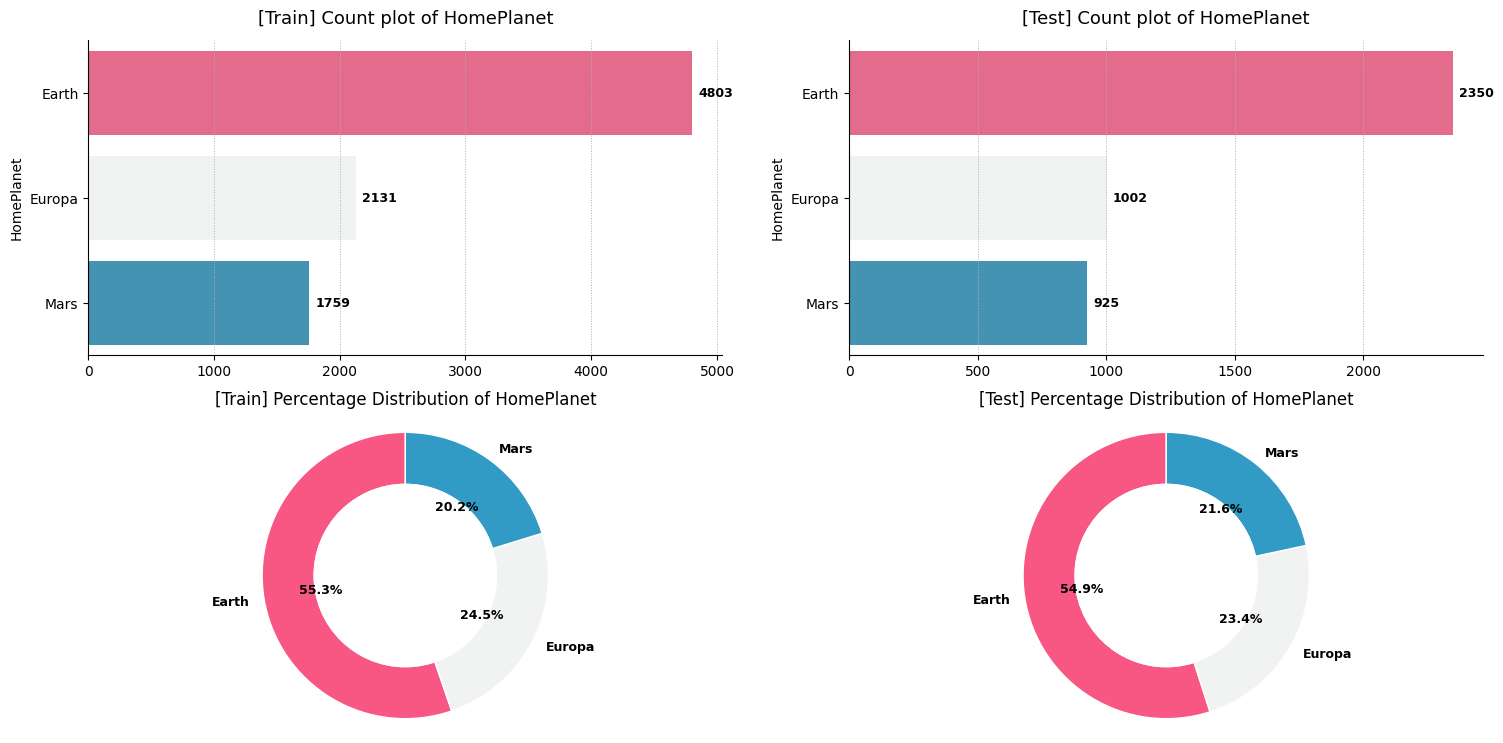

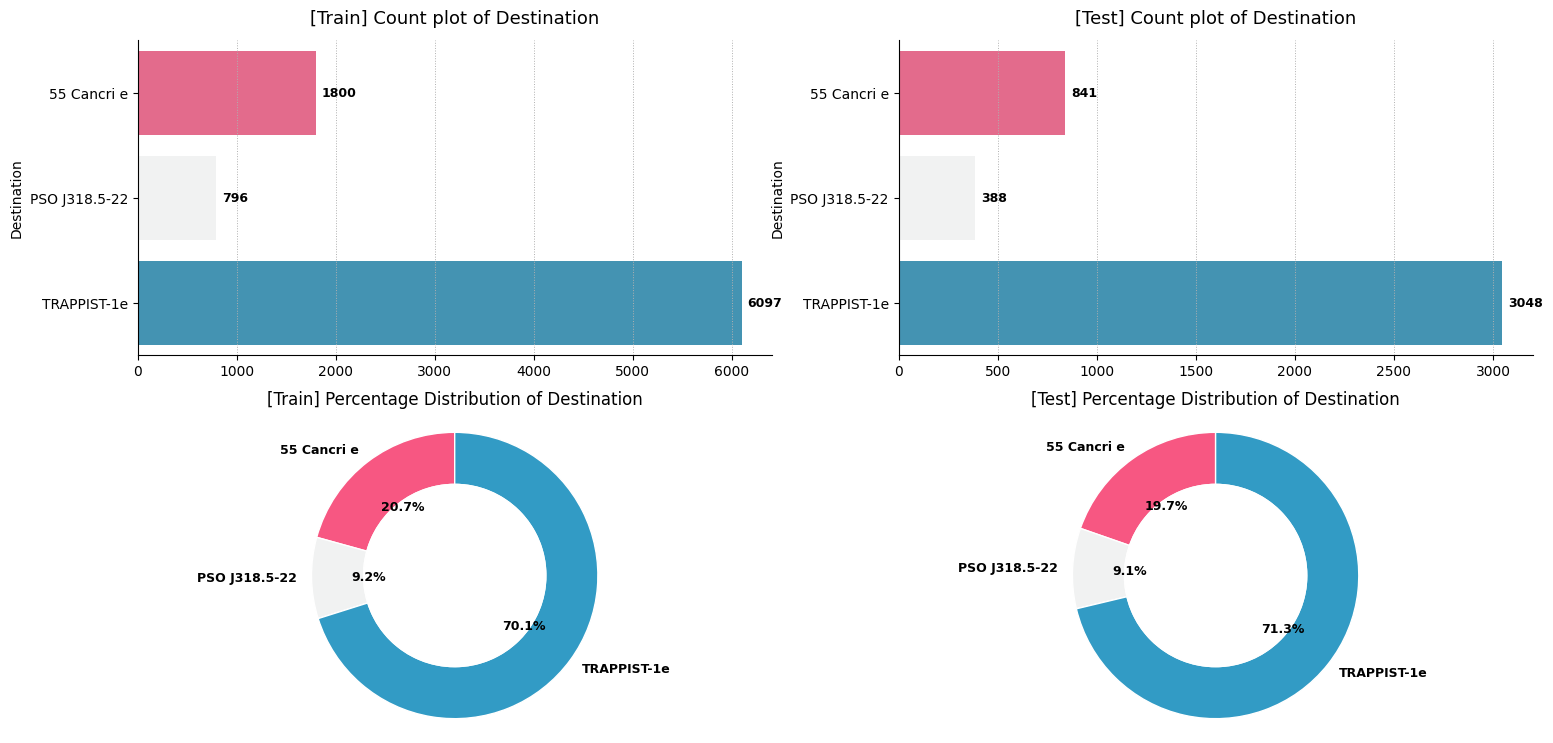

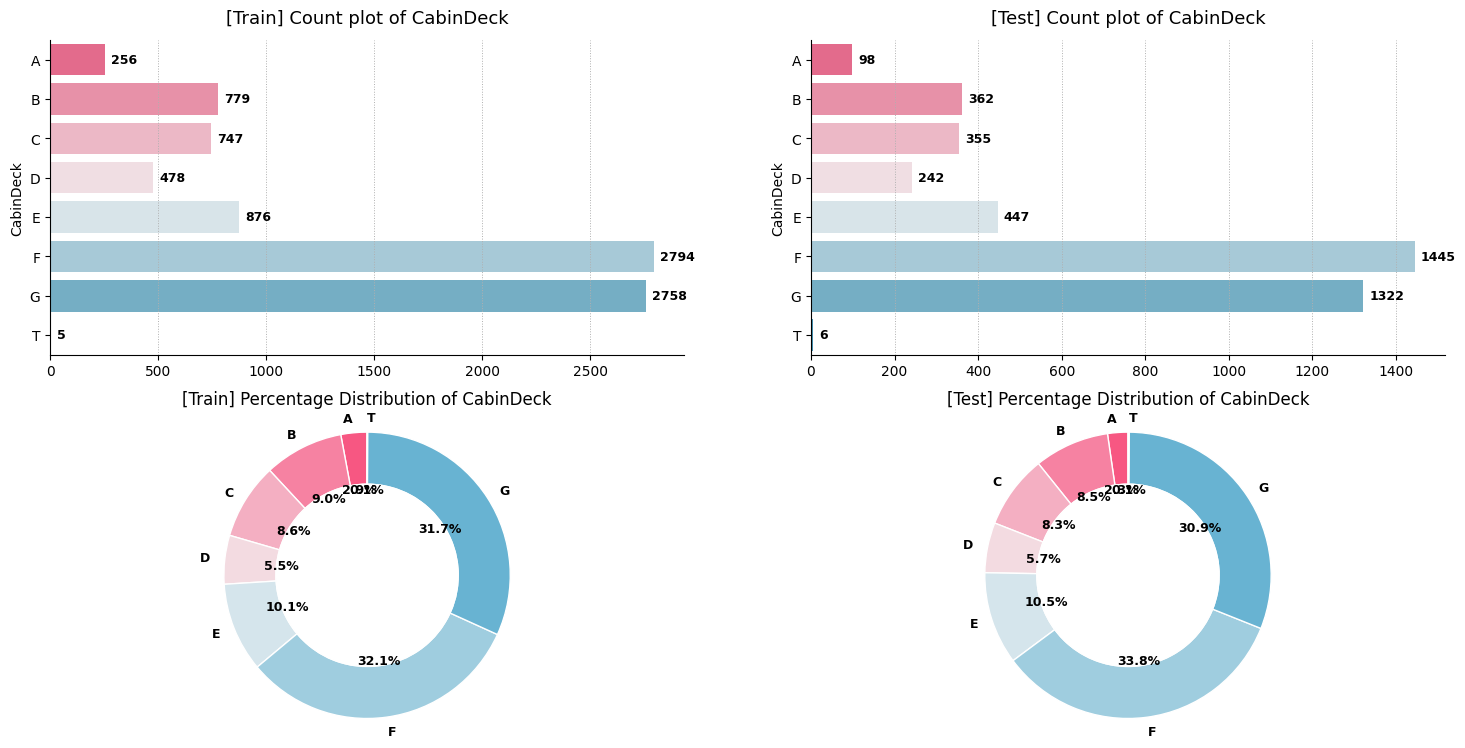

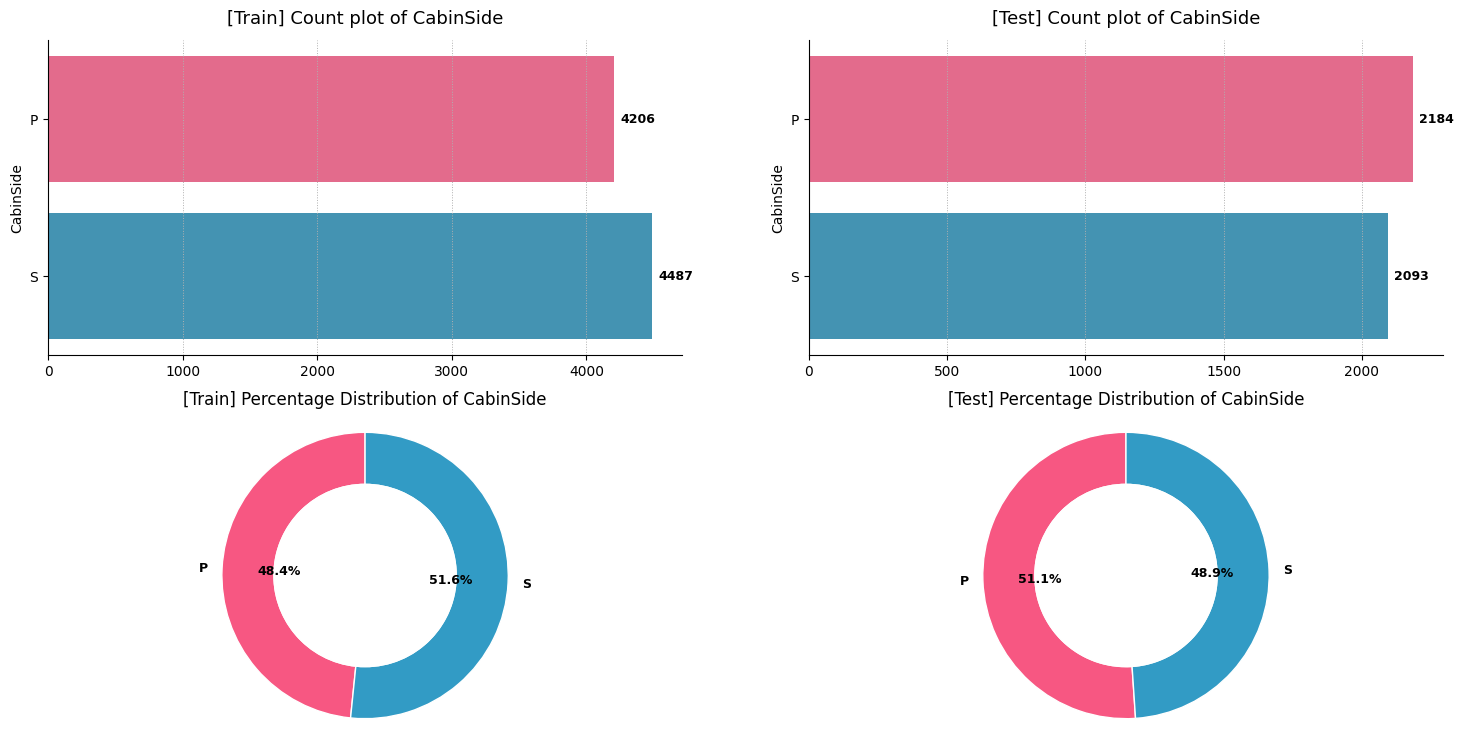

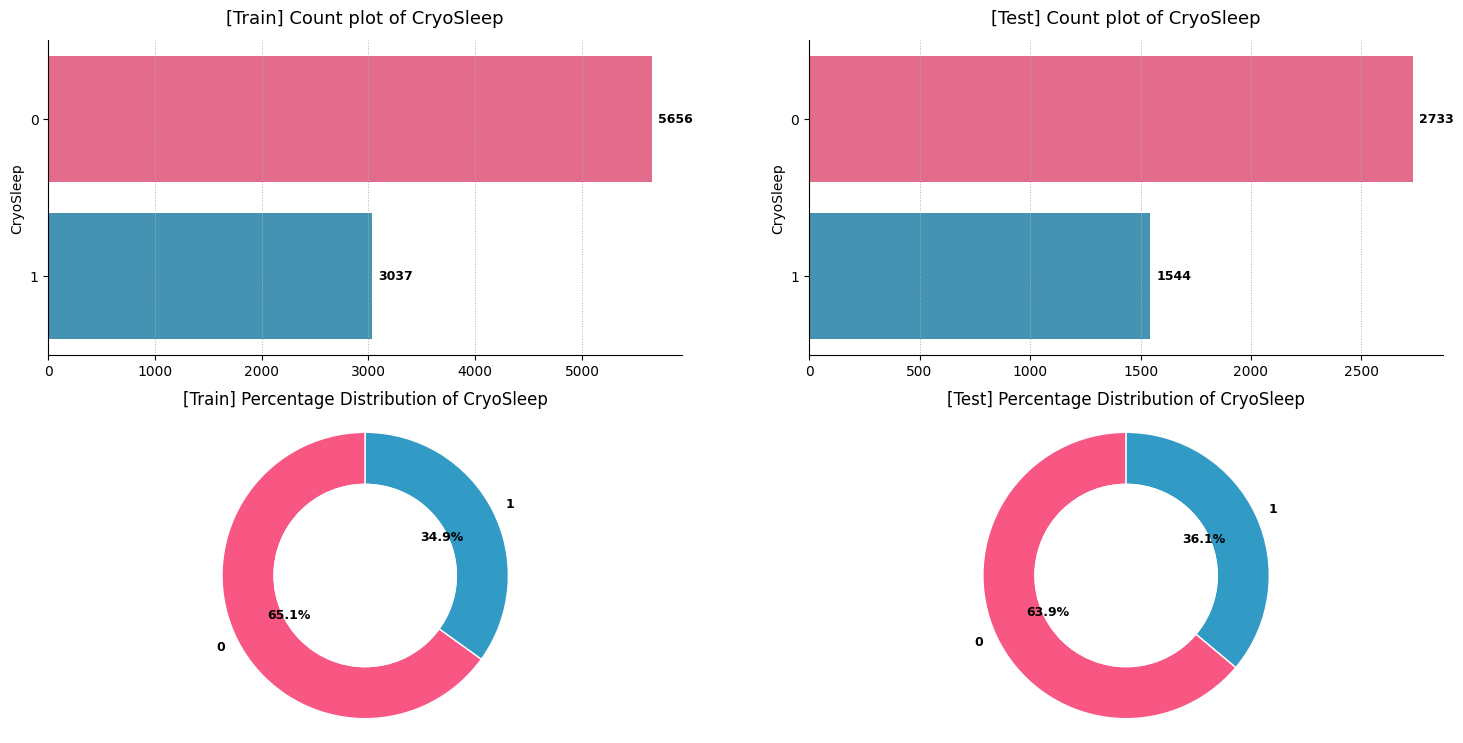

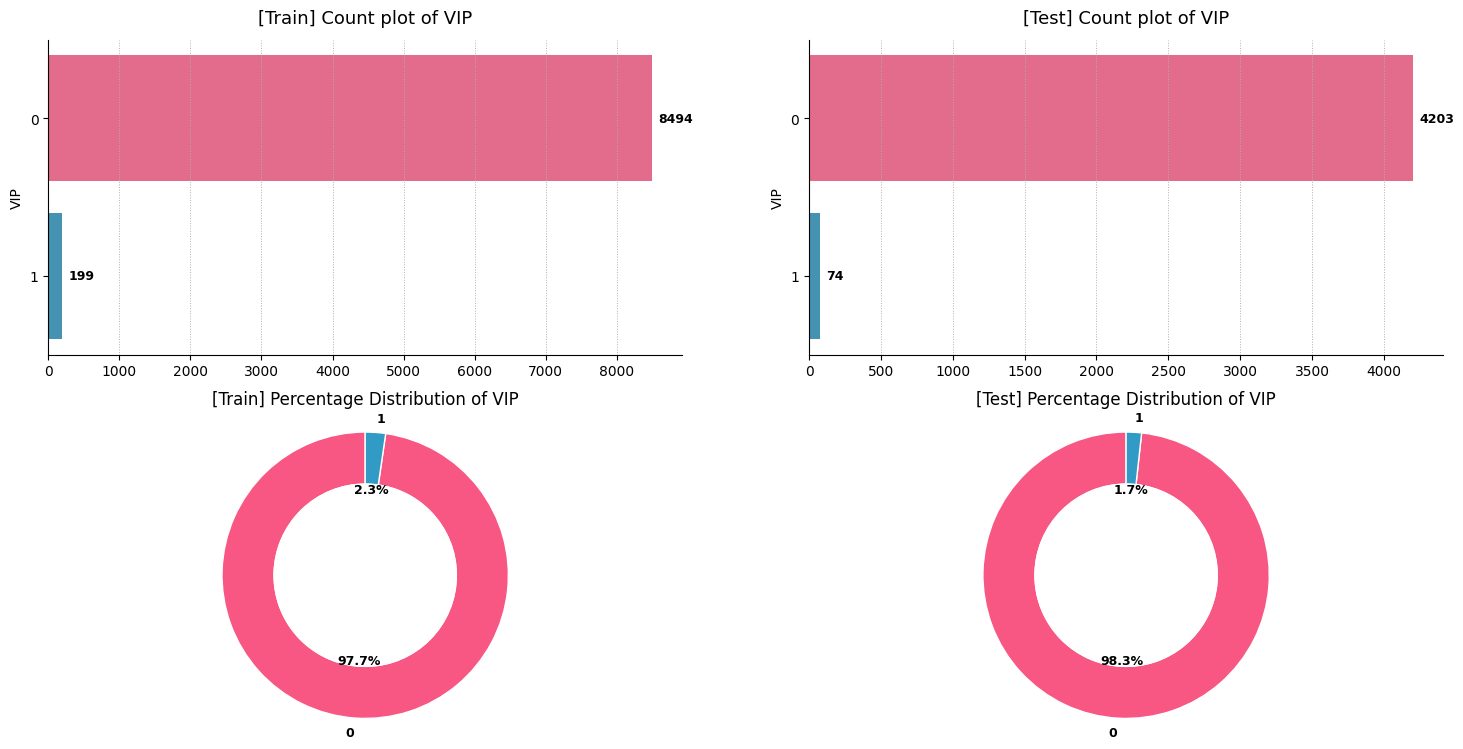

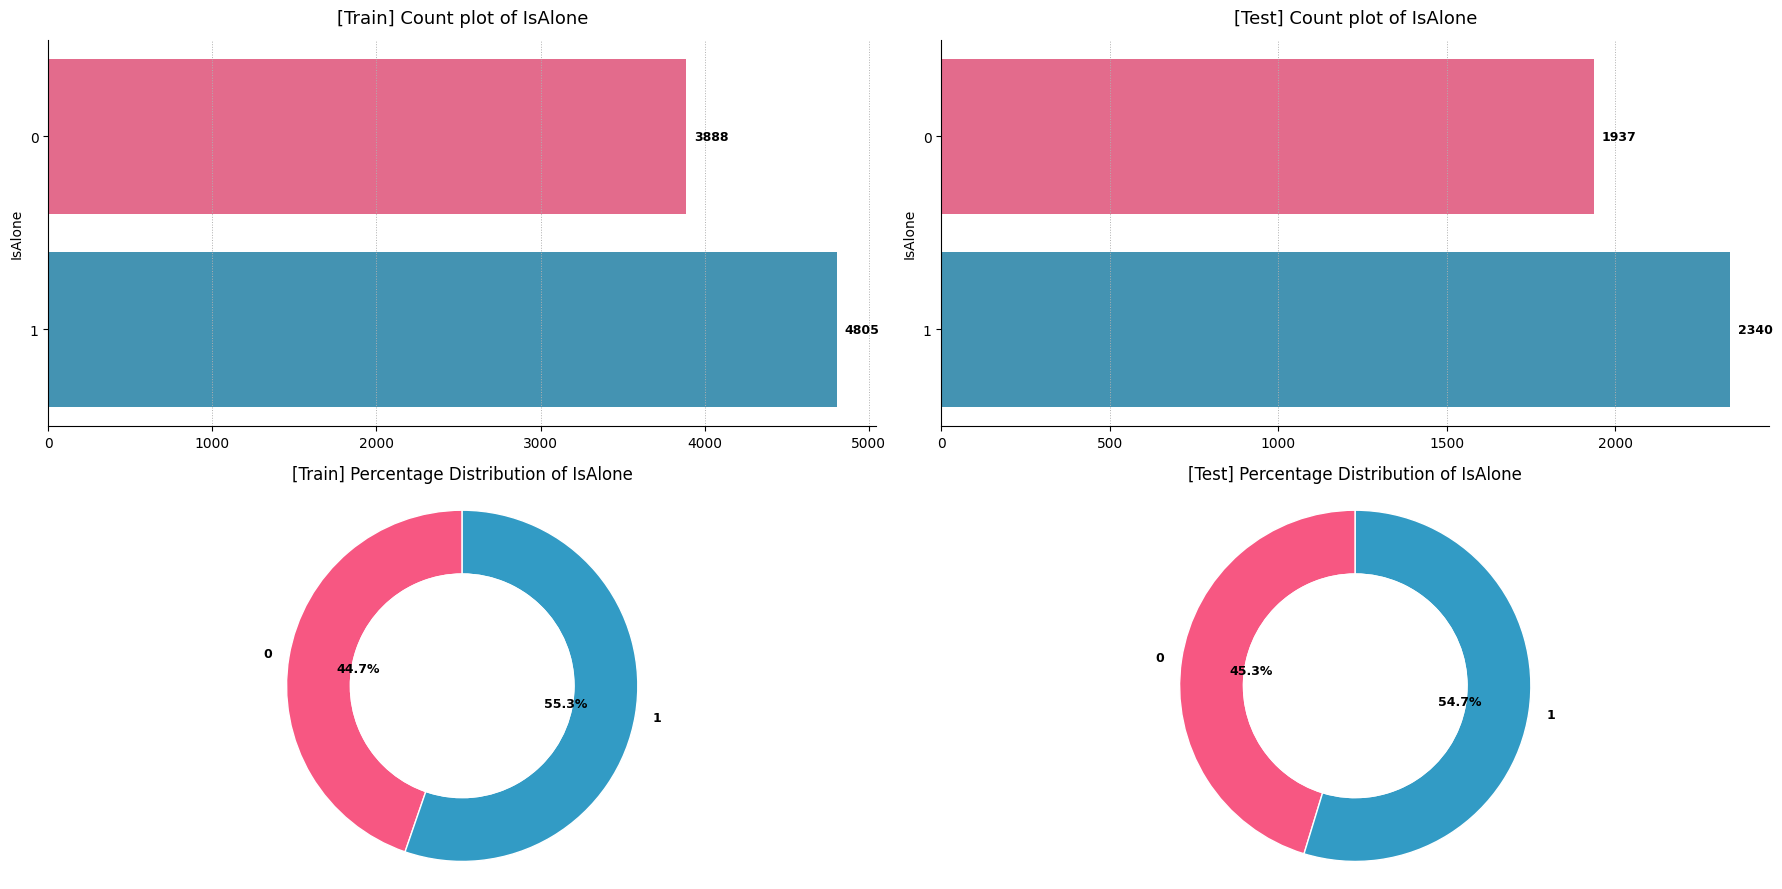

In [142]:
plot_categorical_distribution_both(cat_features=cat_features, df_train = df_train, df_test = df_test)

In [143]:
def top_ratio(df_test = df_test, df_train = df_train, cat_features = cat_features):
    dataset_names = ["Train", "Test"]
    datasets = [df_train, df_test]
    for i, (data, name) in enumerate(zip(datasets, dataset_names)):
        print(f"{name} Data")
        flagged = False
        for feature in cat_features:
            freq = data[feature].value_counts(normalize=True)
            top_ratio = freq.iloc[0]
            if top_ratio > 0.99:
                flagged = True
                print(f"⚠️  {feature}: {top_ratio:.1%} là '{freq.index[0]}'")
        if not flagged:
            print("✅ No feature has a category that makes up more than 99% of its values.")
        print("*" * 50)
top_ratio()

Train Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************
Test Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************


### Insights on Categorical Feature Distributions

**Consistency between training and testing:** <br>
- No feature distribution is greater than 99%.
- The distribution of values ​​of each feature is almost the same between train and test data, which is good for modeling and avoiding data drift.
- These are important features because they are able to help the model differentiate between different groups.

## Bivariate Analysis

🔎 Shapiro-Wilk Normality Test for Age across Transported groups
Group: 0
  Shapiro-Wilk statistic: 0.970
  p-value: 2.6000889074076333e-29
 ⚪ Group '0' does not appear to follow a normal distribution.

Group: 1
  Shapiro-Wilk statistic: 0.981
  p-value: 7.320035953693972e-24
 ⚪ Group '1' does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Age' by 'Transported'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 10207093.0
p-value     : 7.420581760613777e-11
Z-score     : 6.509618108423742
Effect size : r = 0.0698185252750904

✅ Result: Statistically significant difference between the two groups (p ≤ 0.05).
Effect size: negligible


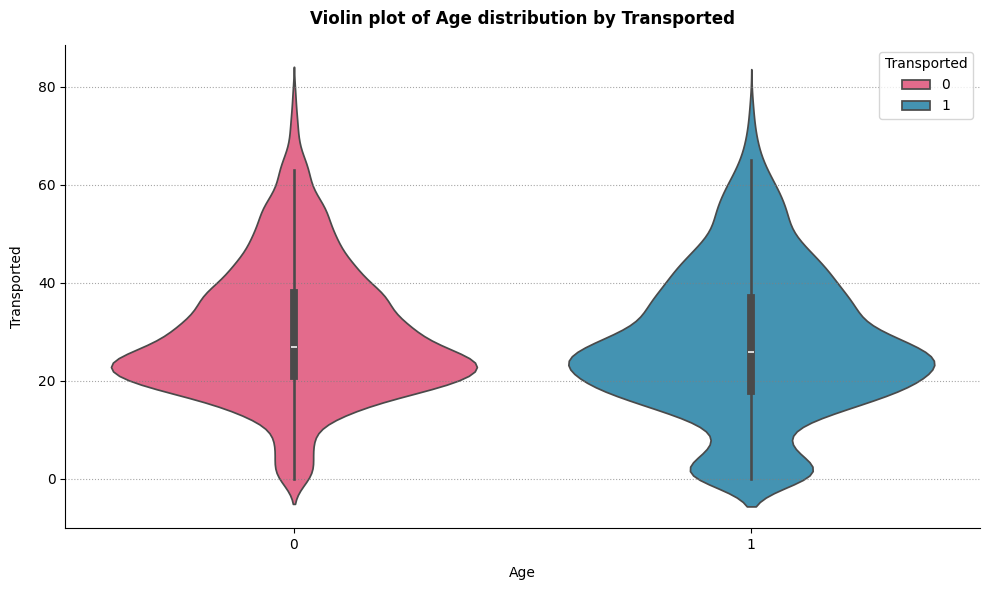

🔎 Shapiro-Wilk Normality Test for RoomService across Transported groups
Group: 0
  Shapiro-Wilk statistic: 0.486
  p-value: 3.221031573636803e-77
 ⚪ Group '0' does not appear to follow a normal distribution.

Group: 1
  Shapiro-Wilk statistic: 0.241
  p-value: 4.9808649541752056e-86
 ⚪ Group '1' does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'RoomService' by 'Transported'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 12788493.0
p-value     : 2.6951798172390294e-252
Z-score     : 28.574816274663277
Effect size : r = 0.30647750744731944

✅ Result: Statistically significant difference between the two groups (p ≤ 0.05).
Effect size: medium


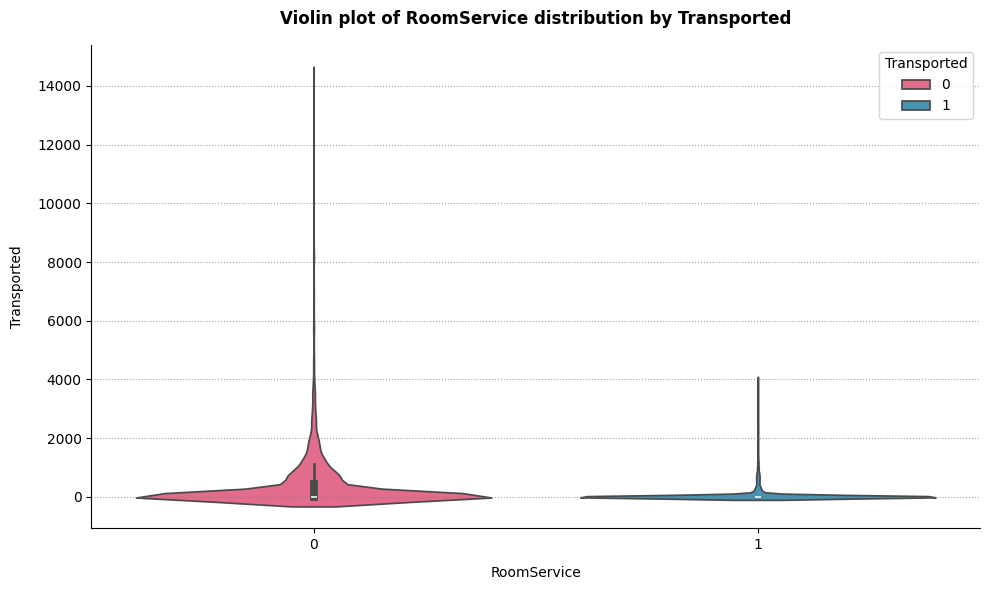

🔎 Shapiro-Wilk Normality Test for FoodCourt across Transported groups
Group: 0
  Shapiro-Wilk statistic: 0.343
  p-value: 1.7624606969912037e-82
 ⚪ Group '0' does not appear to follow a normal distribution.

Group: 1
  Shapiro-Wilk statistic: 0.298
  p-value: 2.6905136428025605e-84
 ⚪ Group '1' does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'FoodCourt' by 'Transported'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 11178953.0
p-value     : 1.2301518447765295e-67
Z-score     : 14.816848095965987
Effect size : r = 0.15891723078911477

✅ Result: Statistically significant difference between the two groups (p ≤ 0.05).
Effect size: small


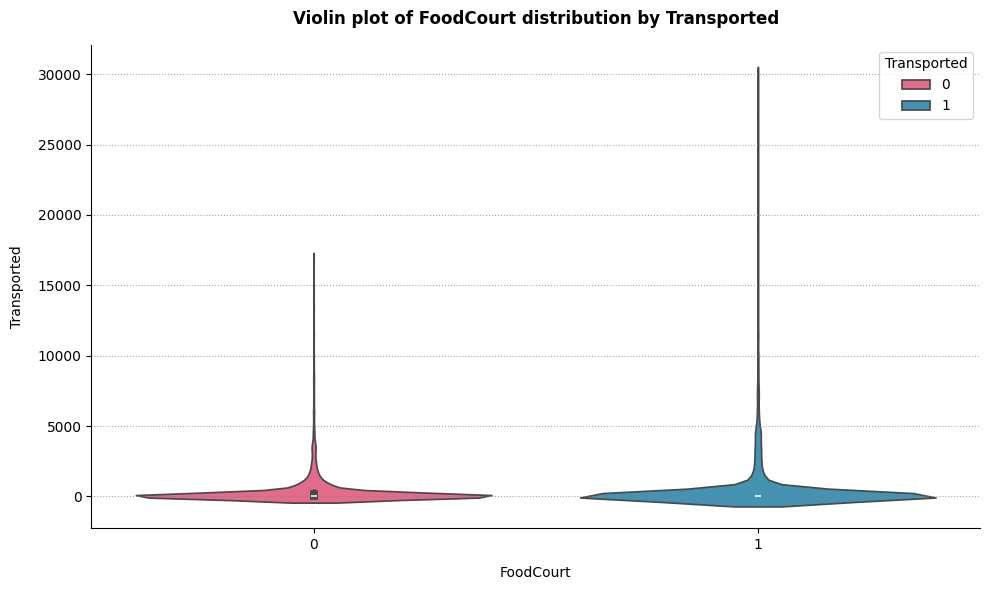

🔎 Shapiro-Wilk Normality Test for ShoppingMall across Transported groups
Group: 0
  Shapiro-Wilk statistic: 0.389
  p-value: 6.782632894055765e-81
 ⚪ Group '0' does not appear to follow a normal distribution.

Group: 1
  Shapiro-Wilk statistic: 0.249
  p-value: 8.62740117629617e-86
 ⚪ Group '1' does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'ShoppingMall' by 'Transported'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 11522727.5
p-value     : 2.002614271938654e-99
Z-score     : 17.75535141470772
Effect size : r = 0.19043397490733235

✅ Result: Statistically significant difference between the two groups (p ≤ 0.05).
Effect size: small


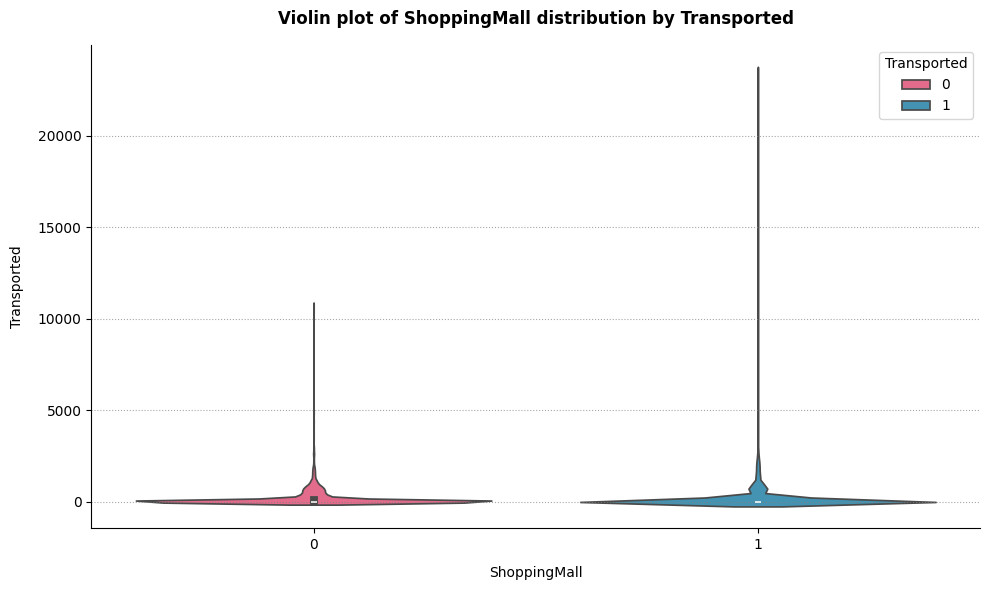

🔎 Shapiro-Wilk Normality Test for Spa across Transported groups
Group: 0
  Shapiro-Wilk statistic: 0.395
  p-value: 1.0414909311906134e-80
 ⚪ Group '0' does not appear to follow a normal distribution.

Group: 1
  Shapiro-Wilk statistic: 0.247
  p-value: 7.478625230140972e-86
 ⚪ Group '1' does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Spa' by 'Transported'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 12893829.5
p-value     : 2.4974495777328483e-255
Z-score     : 29.47520782445722
Effect size : r = 0.31613460393588566

✅ Result: Statistically significant difference between the two groups (p ≤ 0.05).
Effect size: medium


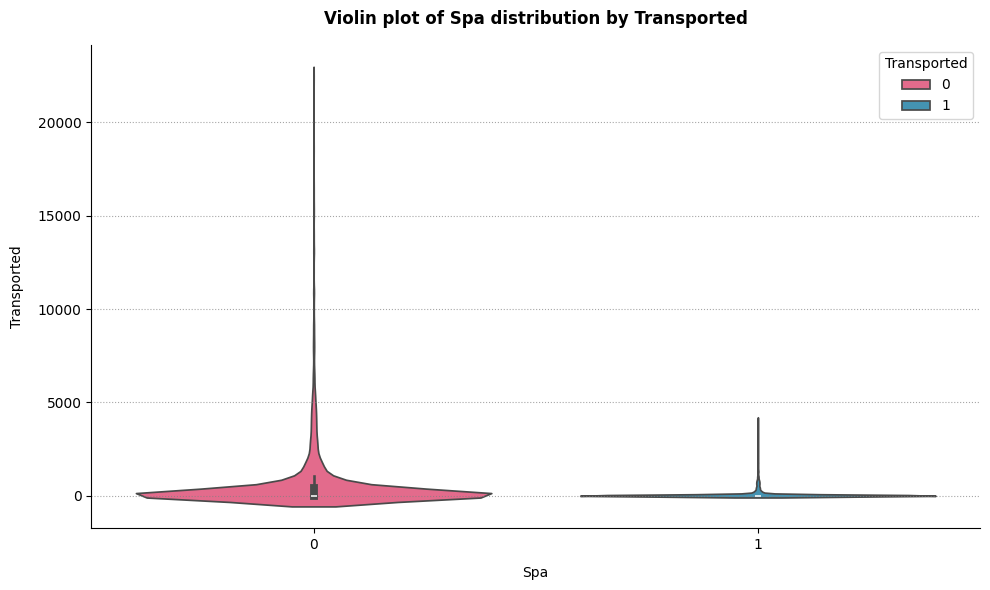

🔎 Shapiro-Wilk Normality Test for VRDeck across Transported groups
Group: 0
  Shapiro-Wilk statistic: 0.377
  p-value: 2.4688294219433603e-81
 ⚪ Group '0' does not appear to follow a normal distribution.

Group: 1
  Shapiro-Wilk statistic: 0.250
  p-value: 8.94848811864747e-86
 ⚪ Group '1' does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'VRDeck' by 'Transported'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 12658405.0
p-value     : 1.3049130243029366e-229
Z-score     : 27.46285474252964
Effect size : r = 0.2945512295853759

✅ Result: Statistically significant difference between the two groups (p ≤ 0.05).
Effect size: small


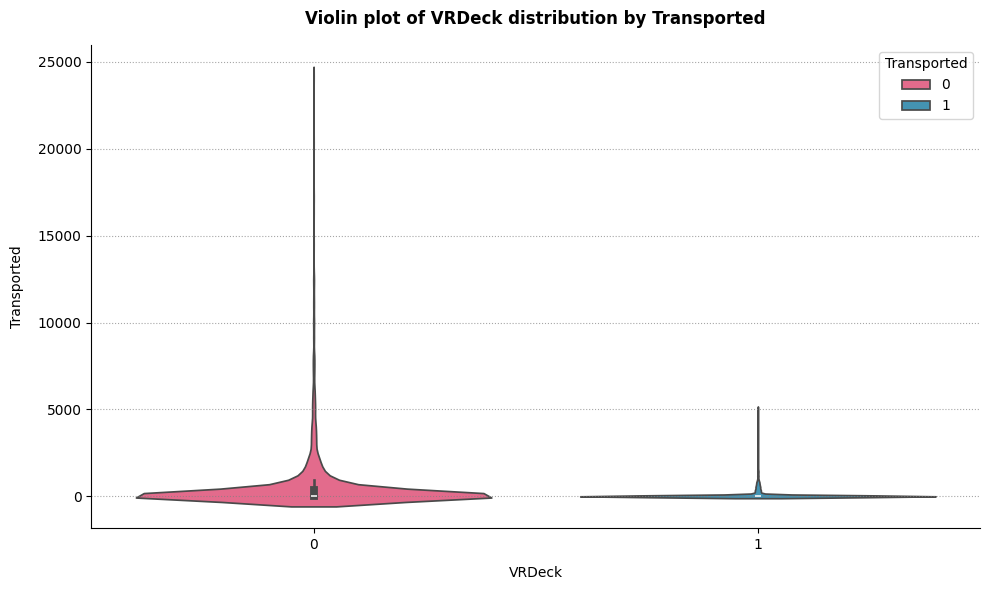

🔎 Shapiro-Wilk Normality Test for CabinNum across Transported groups
Group: 0
  Shapiro-Wilk statistic: 0.900
  p-value: 1.1399112164367272e-46
 ⚪ Group '0' does not appear to follow a normal distribution.

Group: 1
  Shapiro-Wilk statistic: 0.901
  p-value: 1.0083625263835404e-46
 ⚪ Group '1' does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'CabinNum' by 'Transported'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 9924750.0
p-value     : 4.1990927124267863e-05
Z-score     : 4.09621675805163
Effect size : r = 0.043933731363471264

✅ Result: Statistically significant difference between the two groups (p ≤ 0.05).
Effect size: negligible


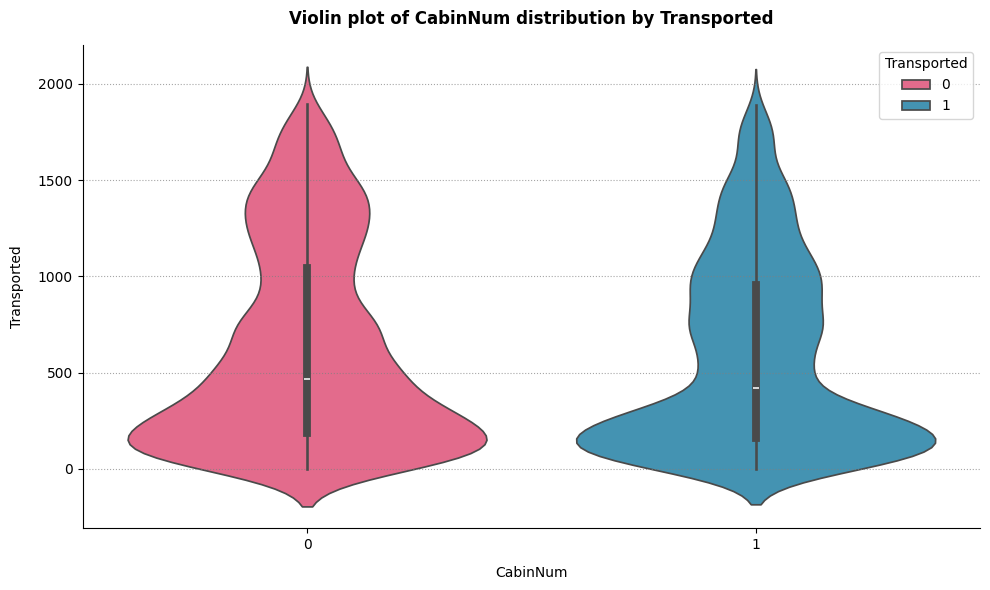

🔎 Shapiro-Wilk Normality Test for Group across Transported groups
Group: 0
  Shapiro-Wilk statistic: 0.948
  p-value: 1.236662328985255e-36
 ⚪ Group '0' does not appear to follow a normal distribution.

Group: 1
  Shapiro-Wilk statistic: 0.963
  p-value: 2.9820943814811436e-32
 ⚪ Group '1' does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Group' by 'Transported'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 9208046.5
p-value     : 0.04235740639659937
Z-score     : -2.0299956669648167
Effect size : r = 0.021772598856283184

✅ Result: Statistically significant difference between the two groups (p ≤ 0.05).
Effect size: negligible


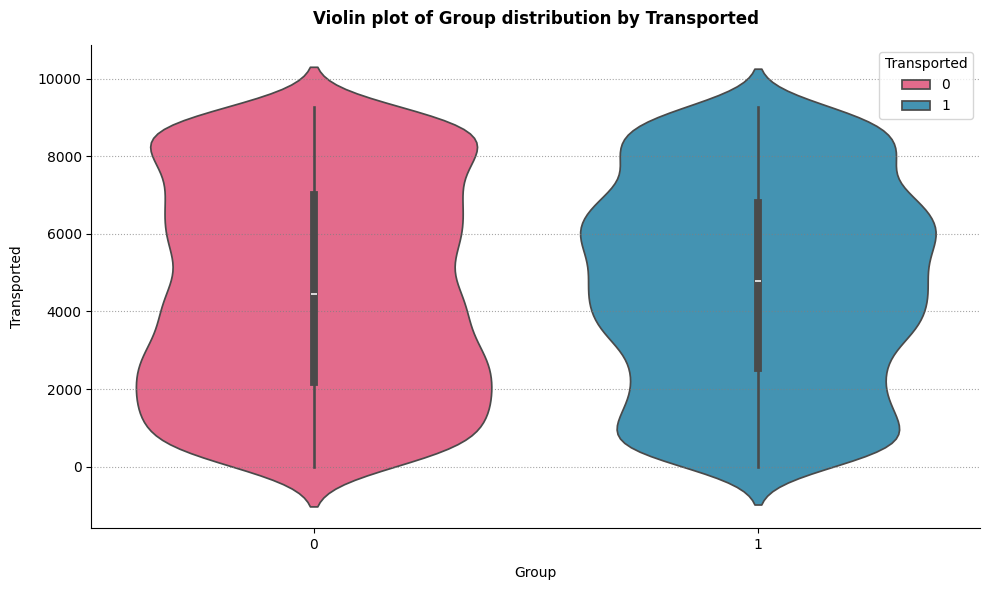

🔎 Shapiro-Wilk Normality Test for PassengerNum across Transported groups
Group: 0
  Shapiro-Wilk statistic: 0.506
  p-value: 2.2642775203299524e-76
 ⚪ Group '0' does not appear to follow a normal distribution.

Group: 1
  Shapiro-Wilk statistic: 0.602
  p-value: 3.21834210016827e-72
 ⚪ Group '1' does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'PassengerNum' by 'Transported'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 8682835.0
p-value     : 2.101598277210299e-16
Z-score     : -6.519379654989886
Effect size : r = 0.06992322216733518

✅ Result: Statistically significant difference between the two groups (p ≤ 0.05).
Effect size: negligible


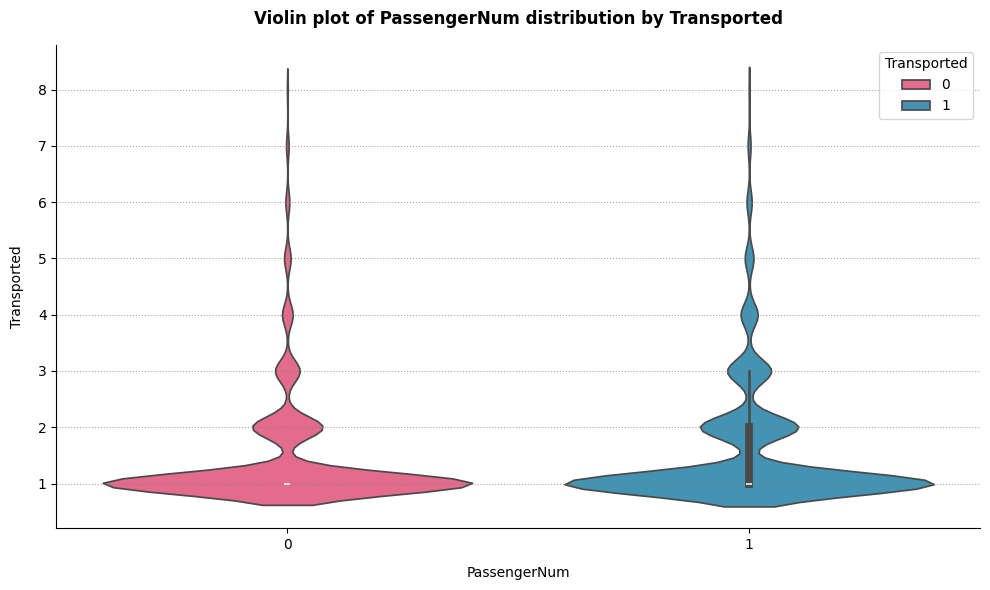

🔎 Shapiro-Wilk Normality Test for TotalAmount across Transported groups
Group: 0
  Shapiro-Wilk statistic: 0.578
  p-value: 4.168044114263078e-73
 ⚪ Group '0' does not appear to follow a normal distribution.

Group: 1
  Shapiro-Wilk statistic: 0.425
  p-value: 5.989261066910392e-80
 ⚪ Group '1' does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'TotalAmount' by 'Transported'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 13847725.5
p-value     : 0.0
Z-score     : 37.62888577827423
Effect size : r = 0.4035863961641961

✅ Result: Statistically significant difference between the two groups (p ≤ 0.05).
Effect size: medium


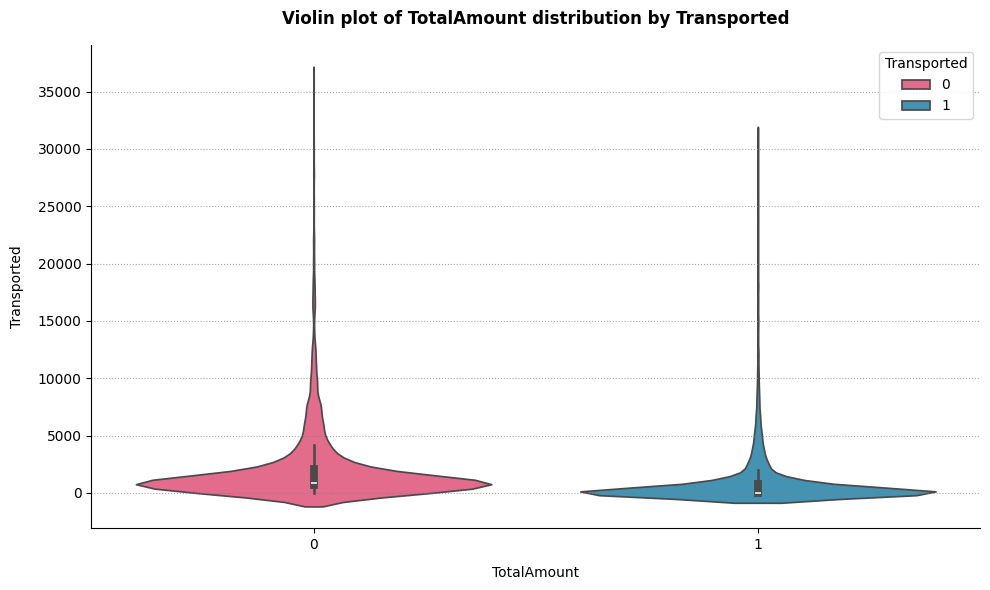

🔎 Shapiro-Wilk Normality Test for GroupSize across Transported groups
Group: 0
  Shapiro-Wilk statistic: 0.634
  p-value: 3.2893207542162695e-70
 ⚪ Group '0' does not appear to follow a normal distribution.

Group: 1
  Shapiro-Wilk statistic: 0.740
  p-value: 7.773530745320715e-64
 ⚪ Group '1' does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'GroupSize' by 'Transported'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 8309879.0
p-value     : 9.515364369506406e-27
Z-score     : -9.707319550894447
Effect size : r = 0.10411528358944173

✅ Result: Statistically significant difference between the two groups (p ≤ 0.05).
Effect size: small


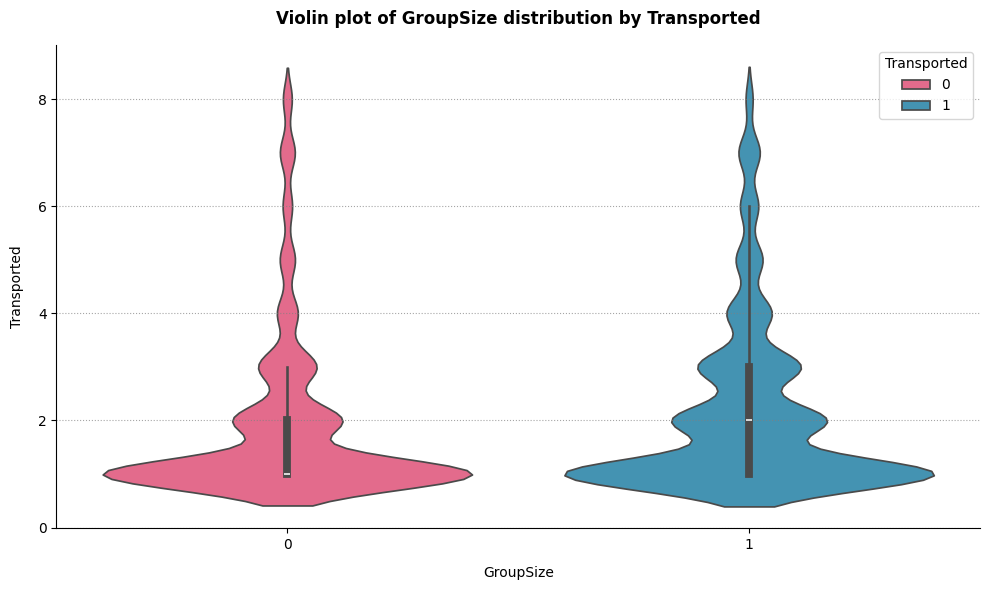

In [144]:
from IPython.core.display import HTML
def perform_statical_testing(feature, df_train = df_train, total_categories = 2, target_feature = "Transported"):
    cal_shapiro(cat_feature=target_feature, num_feature=feature, df=df_train)
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df_train, categorical_feature=target_feature, num_feature=feature)
    else:
        pass

def plot_numerical_distribution_by_Transported(feature, df_train = df_train, target_feature = "Transported", order = None):
    """
    Performs statical testing for each groups (distribution by target_feature) by ANOVA, T-test, Mann-Whitney U test,... <br>
    Draw violinplot and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the numerical variable.
        df_train (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """

    # Summary information
    df_summary_feature = df_train.groupby(by = target_feature, as_index= False)\
    .agg (
        Count = (feature, "count"),
        Mean = (feature, "mean"),
        Median = (feature, "median"),
        Std = (feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean", ascending=False)    

    summary_data = [
        ("Overall Mean", f"{df_train[feature].mean():.2f}"),
        ("Overall Median", f"{df_train[feature].median()}"),
        ("Overall Std", f"{df_train[feature].std():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cm).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(feature=feature, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    colors = [cmap(0.0), cmap(1.0)]
    sns.violinplot(x=target_feature, y=feature, data=df_train, hue=target_feature, palette=colors, ax=ax)
    ax.set_title(f"Violin plot of {feature} distribution by {target_feature}", pad=15, weight = "bold")
    ax.set_xlabel(feature, labelpad=10)
    ax.set_ylabel(target_feature, labelpad=10)
    plt.grid(axis="y", color="gray", linestyle=":", alpha=0.7)
    sns.despine(left=False, bottom=False, ax=ax)
    plt.tight_layout()
    plt.show()

for feature in num_features:
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {feature} by Transported</b></h2>"))
    plot_numerical_distribution_by_Transported(feature=feature)

### Insight for Numerical Features

Most of the groups do not follow the normal distribution based on the **Shapiro-Wilk Normality Test**. Therefore, to test whether there is a significant difference between the groups, we must use the **Mann–Whitney U test (Wilcoxon rank-sum test)**.

`Age` <br>
Although the p-value is very **small**, the effect size (r) is 0.07 -> Although the age difference is statistically significant, it is not practically significant.

`RoomService` <br>
There is a statistically significant difference between the 2 groups, and with an effect size of 0.3, the difference is **medium**.

Based on the violin plot, it can be seen that those who spend less money tend to be transported compared to the group who spend more money.

`FoodCourt` <br>
The difference between the 2 groups is **small** (r≈0.16). But it can also be seen that those who spend less money tend to be transported.

`ShoppingMall` <br>
There is a significant difference between the 2 groups. Specifically, the group who spend more money is more likely to stay. Interestingly, the average amount spent by the group that was transferred is higher than the group that stayed, this is due to the presence of a large outlier (>20000$)

`Spa`, `VRDeck` <br>
Similar to `RoomService`, `FoodCourt` and `ShoppingMall`, all groups have significant differences at the **medium** and **small** levels respectively, but all show the common point that those who spend more are more likely to stay than those who spend less.

`CabinNum` <br>
There is a difference between the two groups but it is not significant (r≈0.04) so ​​it can be considered that the two groups do not differ. This suggests that the passengers who are transferred are not related to the Cabin they are staying in.

`Group` <br>
Similar to `CabinNum`, the difference between the two groups is not significant (r≈0.02). Whether a passenger is transferred or not is not significantly related to the group they belong to.

`PassengerNum` <br>
Similar to `Cabin`, the difference between the two groups is not significant (r≈0.02). Whether a passenger is transferred or not is not significantly related to the number they belong to.

`TotalAmount` <br>
The value of `TotalAmount` is the sum of `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa` and `VRDeck`. It is clear that spending more increases the chance of staying.

`GroupSize` <br>
The significance between the two groups is **small** (r≈0.1), but this suggests that larger GroupSizes seem to be preferred over smaller GroupSizes.

**Conclusion** <br>
- The more you spend, the higher your chances of staying.
- The larger the group size, the more priority it seems to get for transportation.

In [ ]:
# defining function for plotting
def bivariate_percent_plot(cat, df, figsize=(15, 6), order = None, rot = 0):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=figsize)
    # Plot 1
    # Calculate the total number of each "cat" by Transported
    grouped = df.groupby([cat, "Transported"]).size().unstack(fill_value=0)
    # Calculate the percentages
    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
    if order is not None:
        percentages = percentages.loc[order]
        labels = order
    else:
        labels = percentages.index

    # Draw stacked bar plot
    ax[0] = percentages.plot(kind="bar", stacked=True, 
                             color = color(n_colors=2), ax = ax[0], use_index=True)
    for container in ax[0].containers:
        ax[0].bar_label(container, fmt='%1.0f%%', label_type="center", weight="bold", fontsize=10)
    ax[0].set_title(f"Percentage of Transported by {cat}", fontsize=14, weight="bold")
    ax[0].set_xlabel(f"{cat}")
    ax[0].set_ylabel("% Transported Rate")
    ax[0].set_xticklabels(labels = labels, rotation = rot)
    ax[0].legend_.remove()
    ax[0].grid(color="gray", linestyle=":", linewidth=0.7)
    sns.despine(left=False, bottom=False, ax=ax[0])

    # Plot 2
    sns.countplot(data=df, hue = "Transported", x = cat, palette=color(n_colors=2), ax=ax[1], order=order)
    # Show value for each bar.
    for container in ax[1].containers:
        ax[1].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")
    ax[1].set_title(f"Transported by {cat}", fontsize=14, weight="bold")
    ax[1].set_xlabel(f"{cat}", fontsize=12)
    ax[1].set_ylabel("Number of Employees")
    ax[1].legend(title="Transported", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax[1].grid(color="gray", linestyle=":", linewidth=0.7)
    sns.despine(left=False, bottom=False, ax=ax[1])
    plt.tight_layout()
    plt.show()

    cal_ChiSquare(cat_feature=cat, target_feature="Transported", df=df, show_residuals=True)

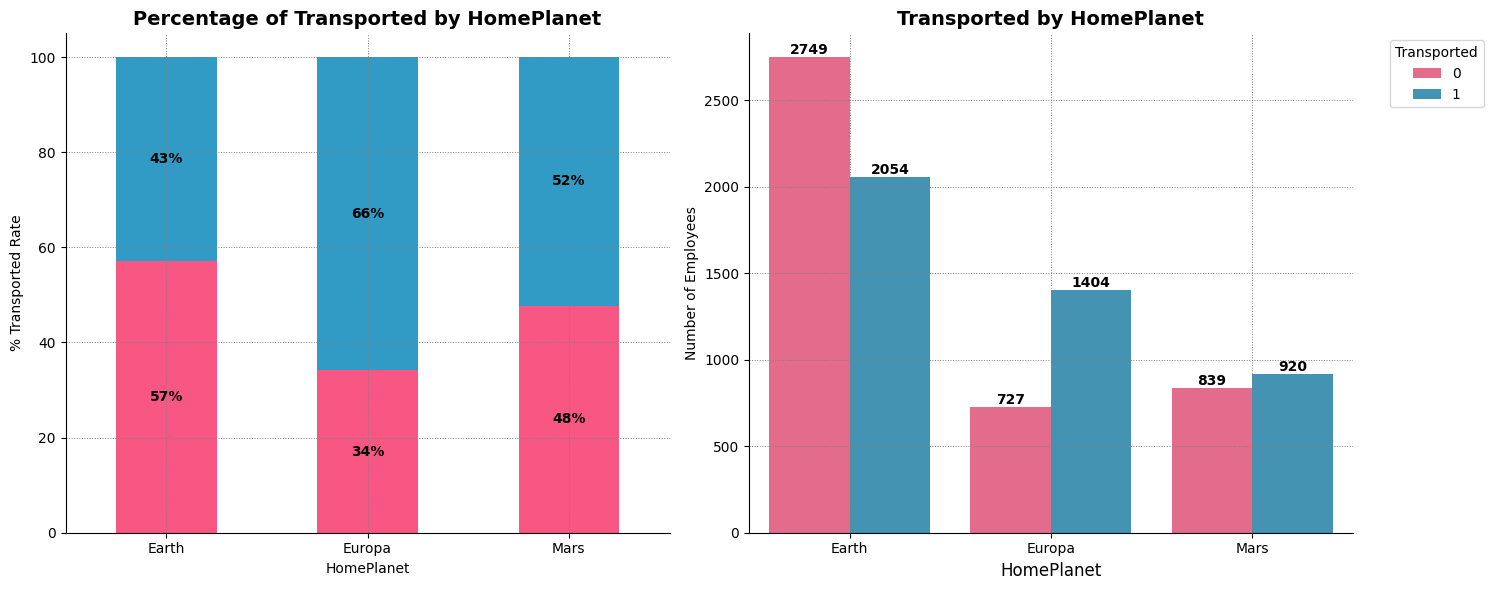


🔍 Chi-Square Test of Independence: 'HomePlanet' vs. 'Transported'
Chi-squared statistic: 318.934
Degrees of freedom: 2
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'HomePlanet' and 'Transported'.

📈 Standardized Residuals:
Transported      0      1
HomePlanet               
Earth         7.47  -7.42
Europa      -10.17  10.10
Mars         -1.15   1.15


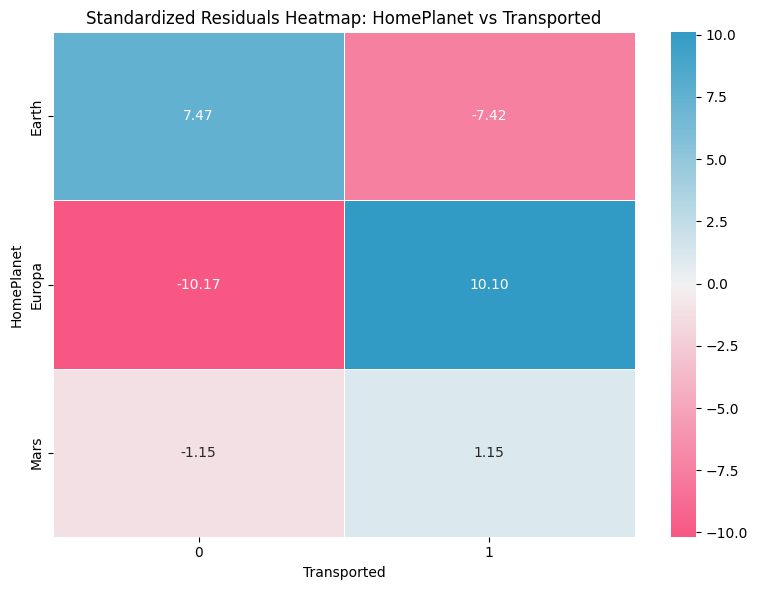

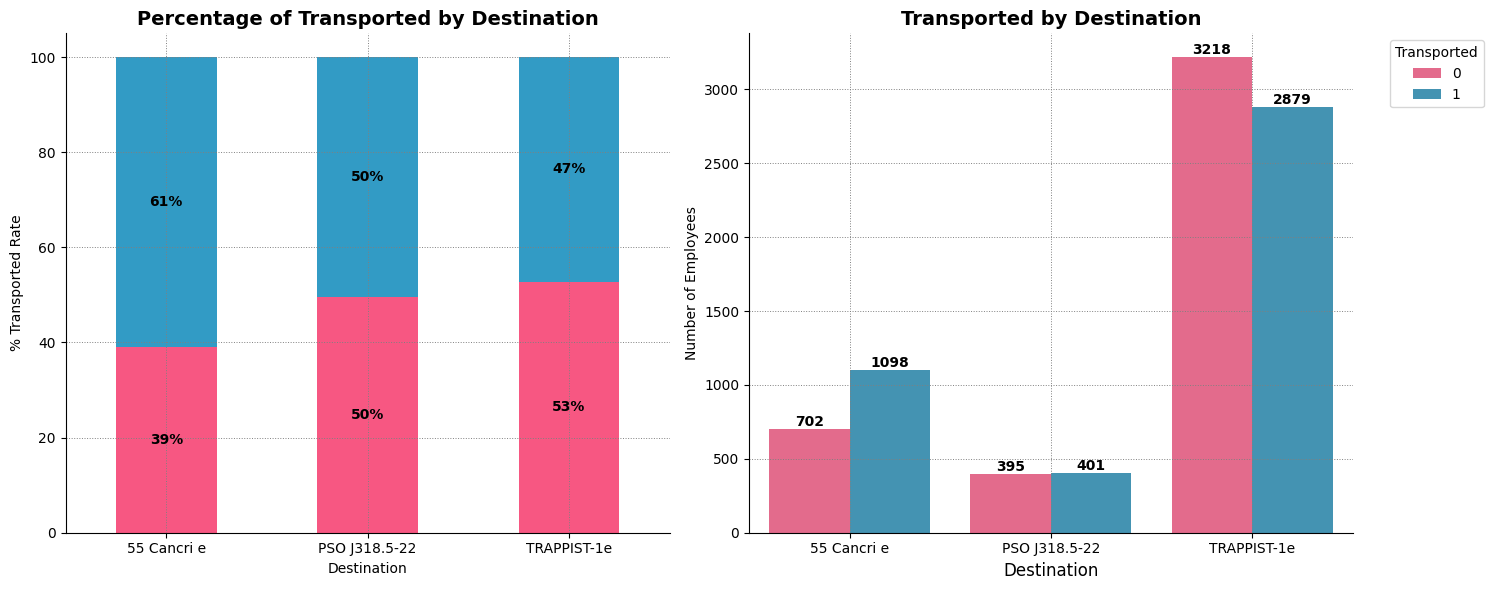


🔍 Chi-Square Test of Independence: 'Destination' vs. 'Transported'
Chi-squared statistic: 105.563
Degrees of freedom: 2
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Destination' and 'Transported'.

📈 Standardized Residuals:
Transported       0     1
Destination              
55 Cancri e   -6.41  6.36
PSO J318.5-22 -0.01  0.01
TRAPPIST-1e    3.48 -3.46


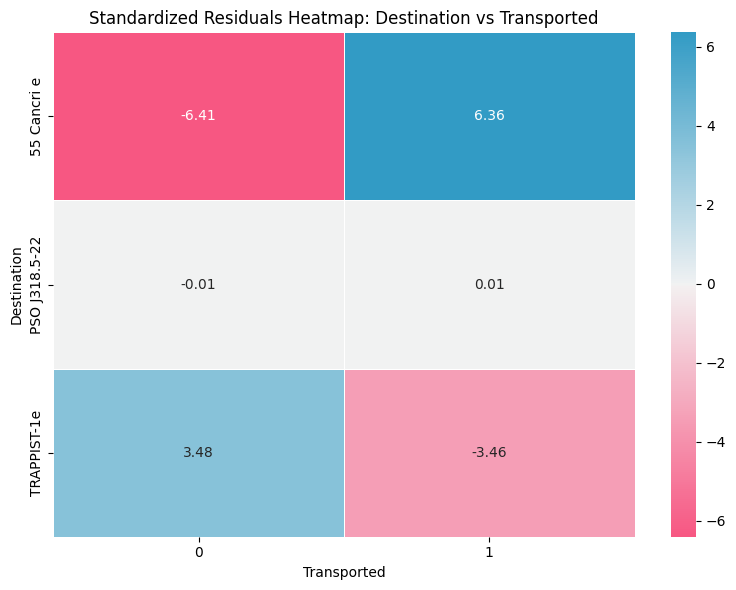

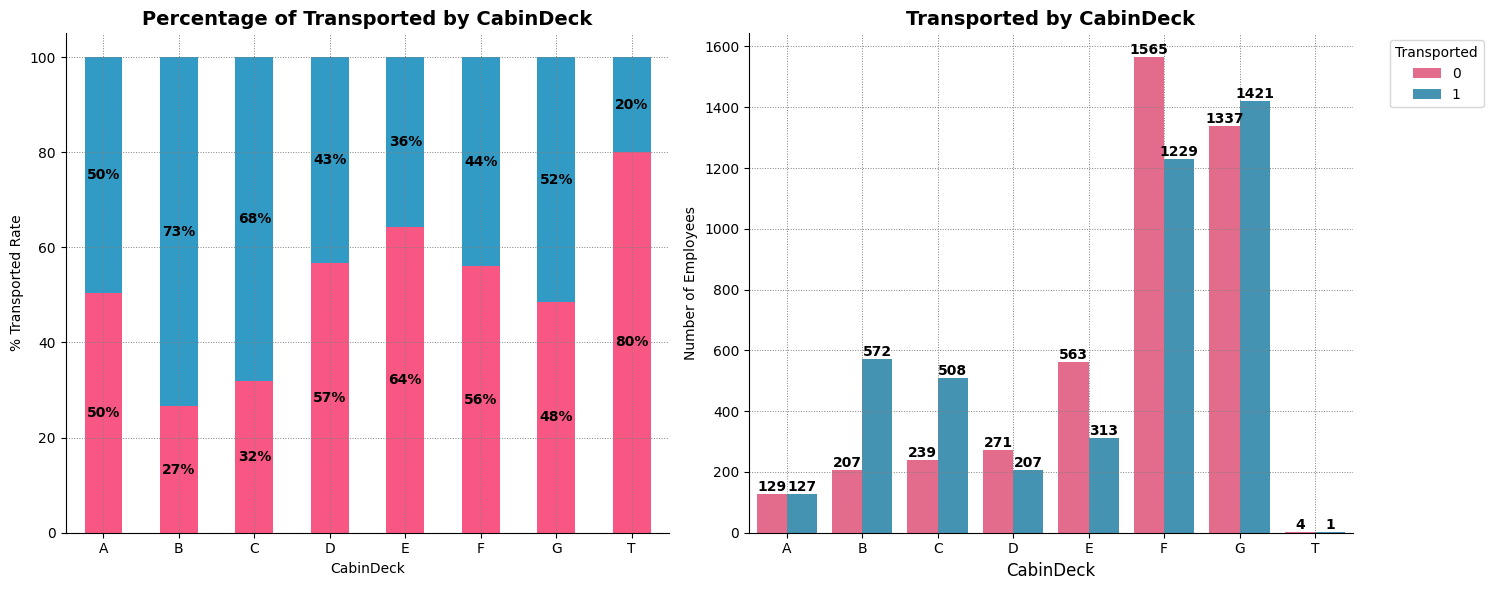


🔍 Chi-Square Test of Independence: 'CabinDeck' vs. 'Transported'
Chi-squared statistic: 392.150
Degrees of freedom: 7
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'CabinDeck' and 'Transported'.

📈 Standardized Residuals:
Transported     0     1
CabinDeck              
A            0.17 -0.17
B           -9.14  9.07
C           -6.84  6.79
D            2.19 -2.17
E            6.15 -6.10
F            4.78 -4.75
G           -0.87  0.86
T            0.96 -0.96


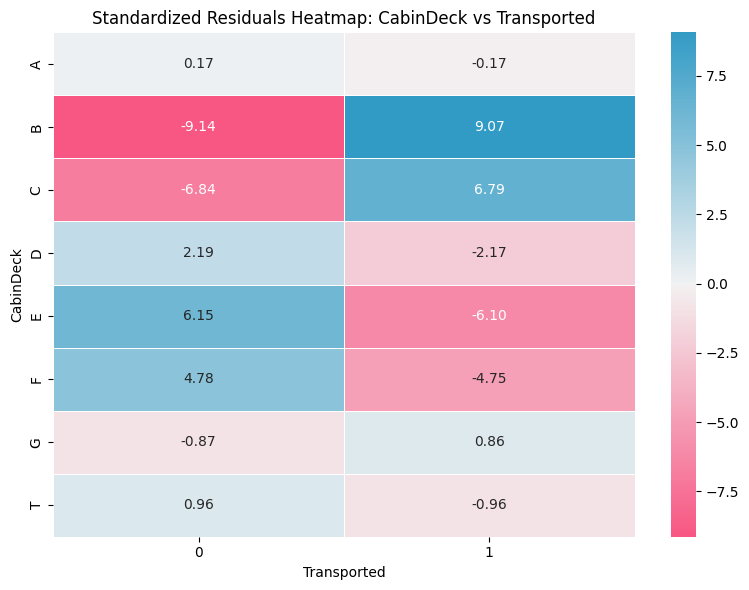

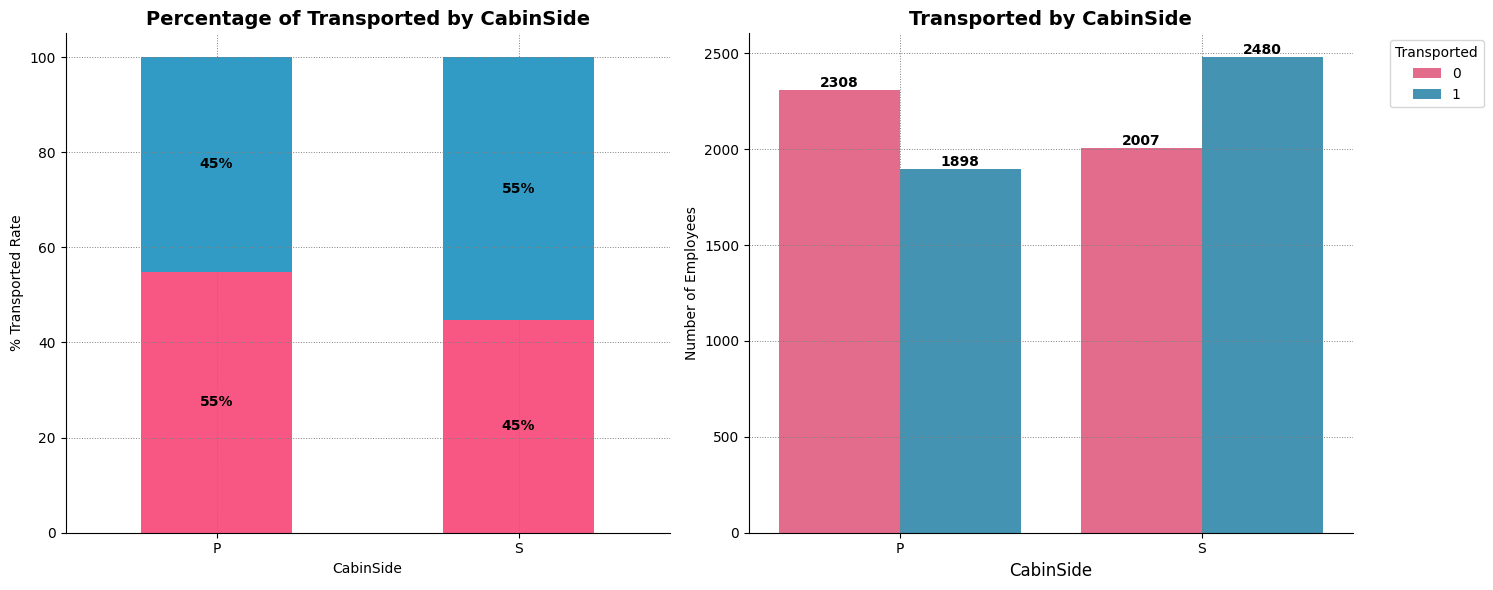


🔍 Chi-Square Test of Independence: 'CabinSide' vs. 'Transported'
Chi-squared statistic: 88.971
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'CabinSide' and 'Transported'.

📈 Standardized Residuals:
Transported     0     1
CabinSide              
P            4.82 -4.79
S           -4.67  4.63


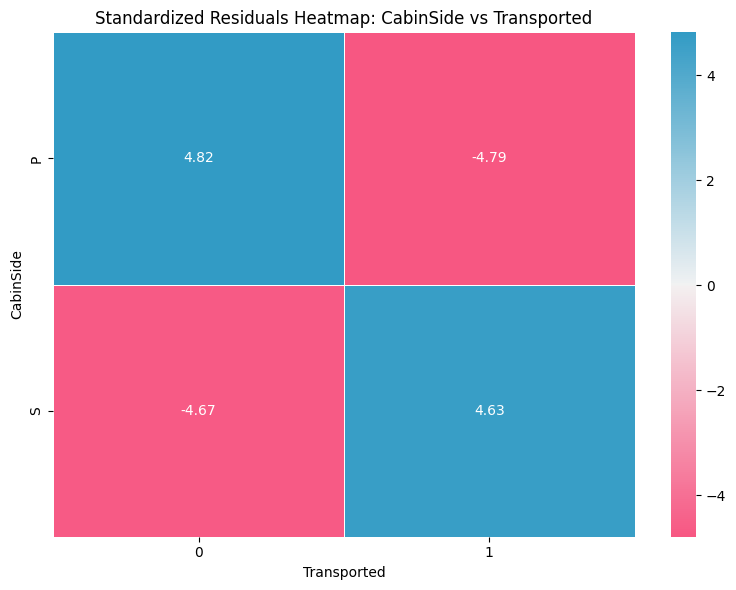

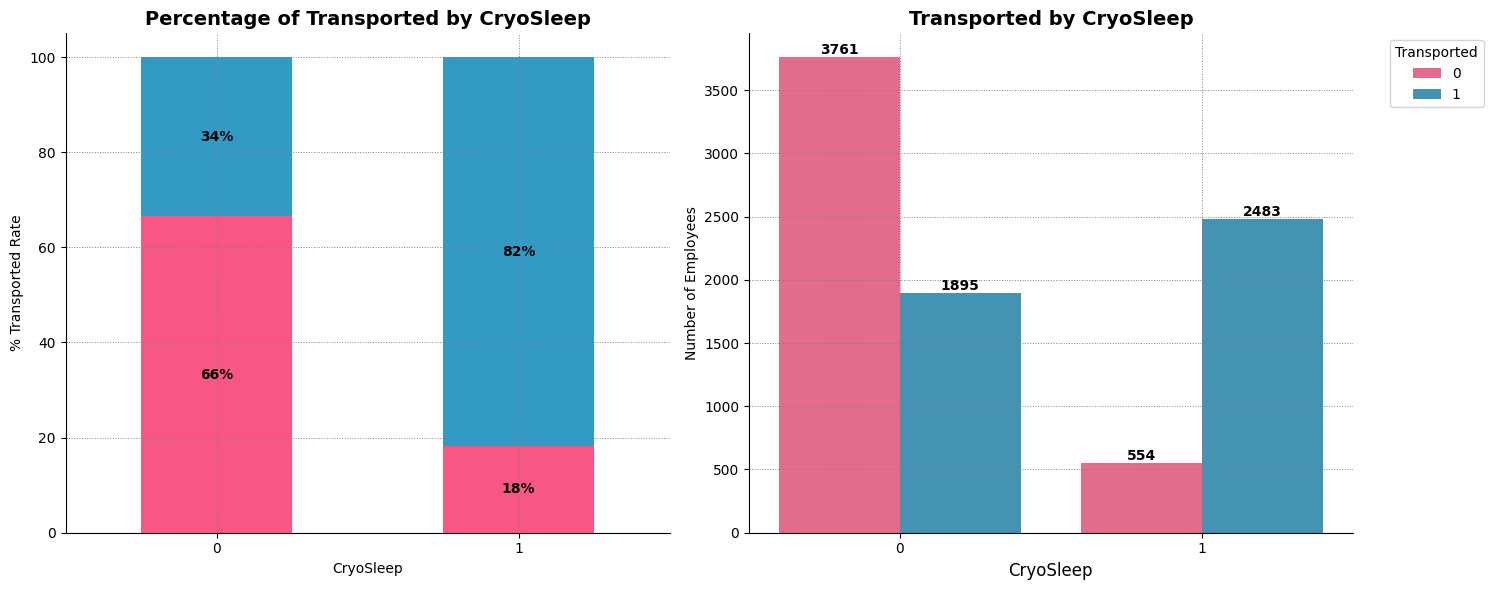


🔍 Chi-Square Test of Independence: 'CryoSleep' vs. 'Transported'
Chi-squared statistic: 1838.568
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'CryoSleep' and 'Transported'.

📈 Standardized Residuals:
Transported      0      1
CryoSleep                
0            18.00 -17.87
1           -24.56  24.38


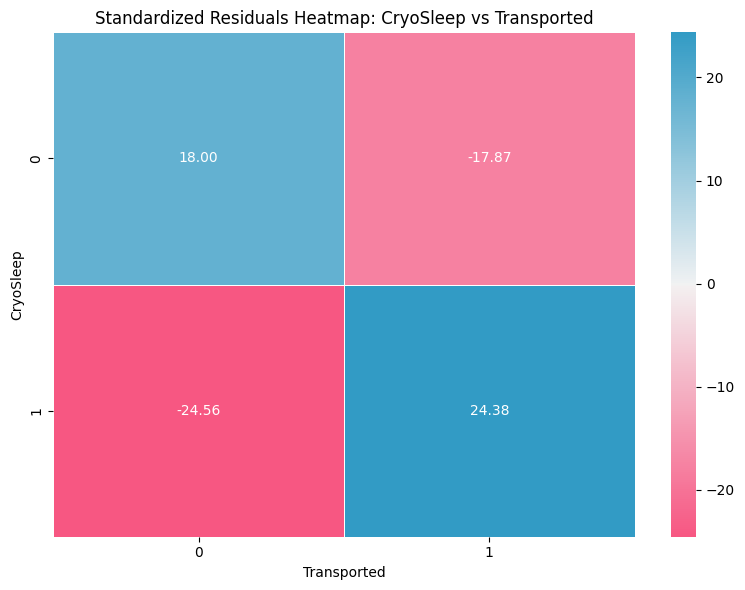

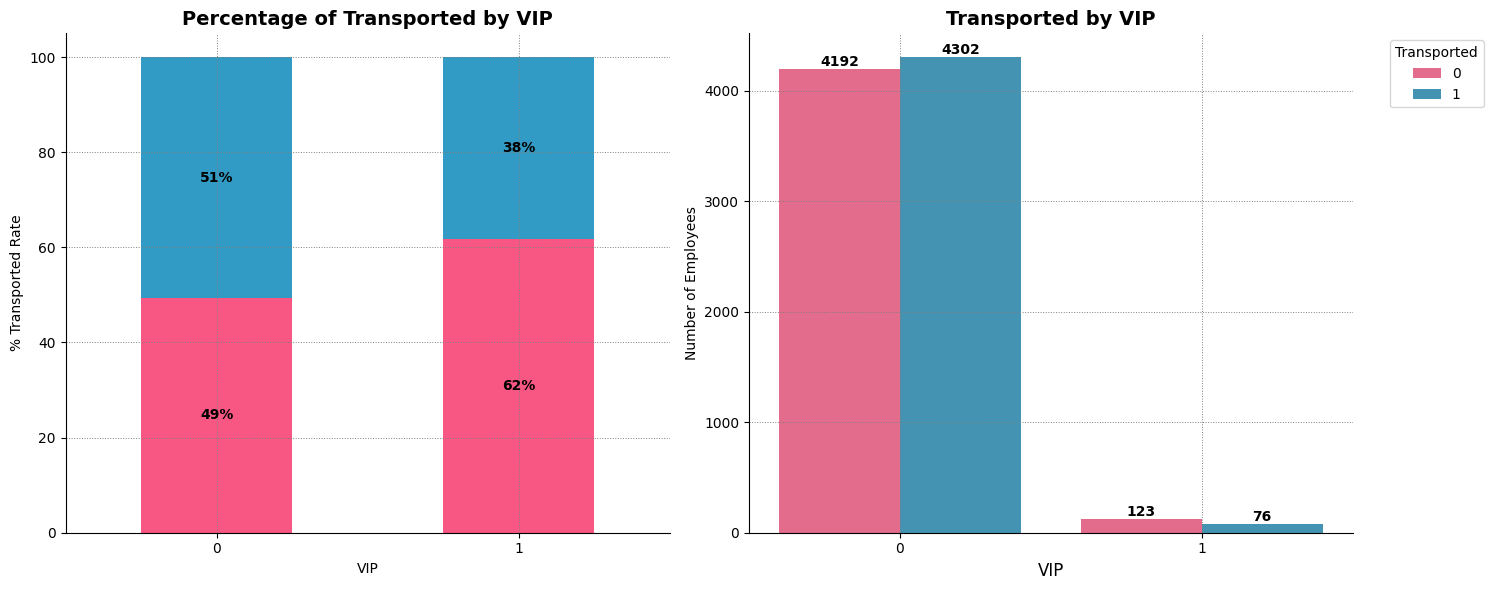


🔍 Chi-Square Test of Independence: 'VIP' vs. 'Transported'
Chi-squared statistic: 11.576
Degrees of freedom: 1
p-value: 0.000668
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'VIP' and 'Transported'.

📈 Standardized Residuals:
Transported     0     1
VIP                    
0           -0.37  0.37
1            2.44 -2.42


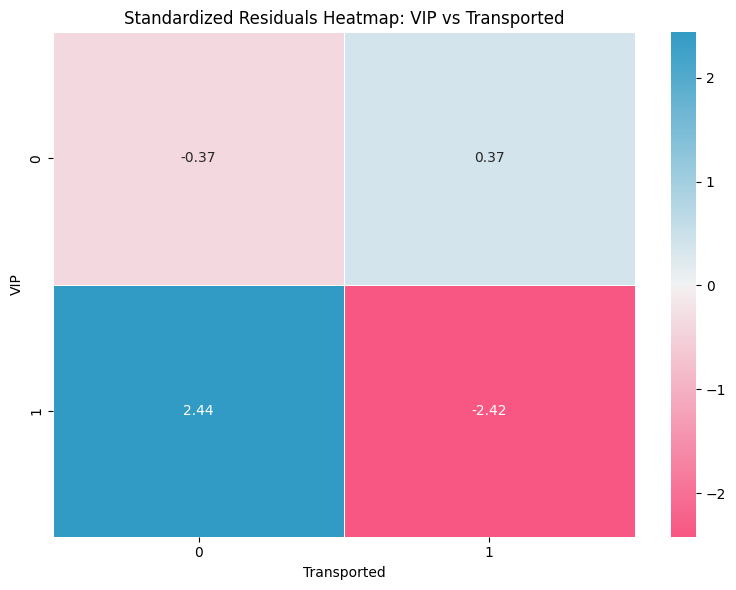

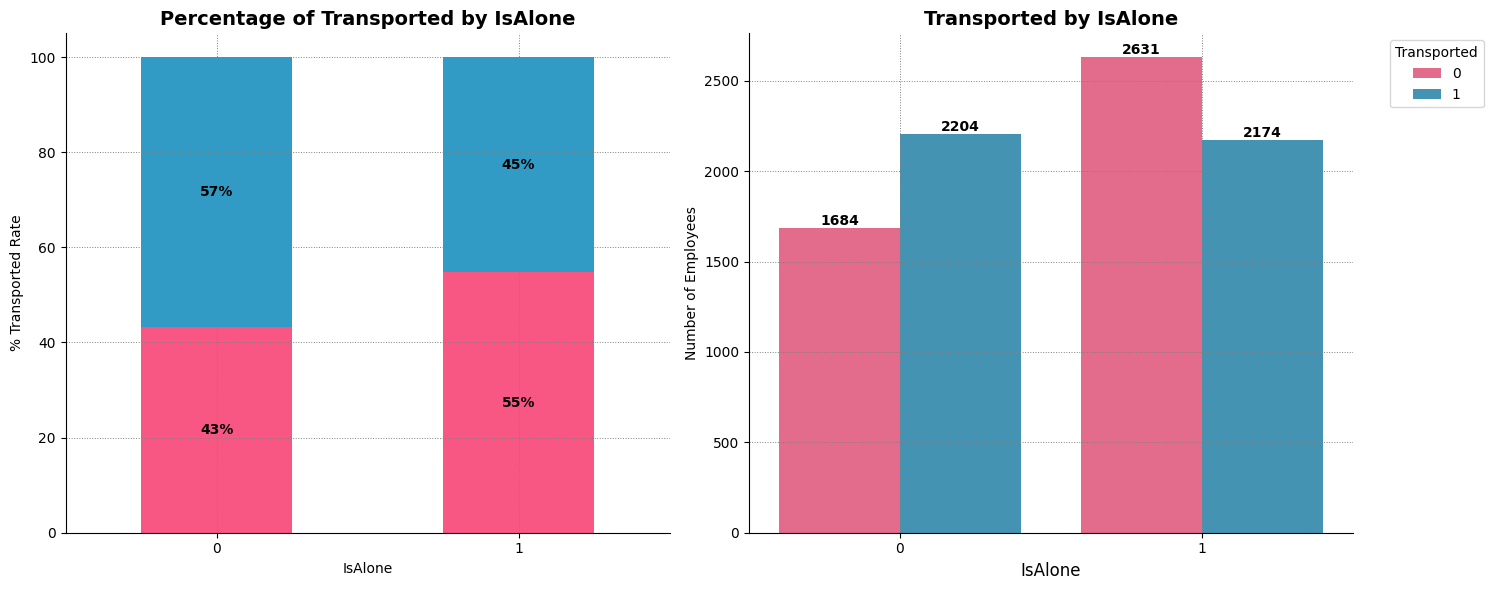


🔍 Chi-Square Test of Independence: 'IsAlone' vs. 'Transported'
Chi-squared statistic: 112.104
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'IsAlone' and 'Transported'.

📈 Standardized Residuals:
Transported     0     1
IsAlone                
0           -5.60  5.56
1            5.04 -5.00


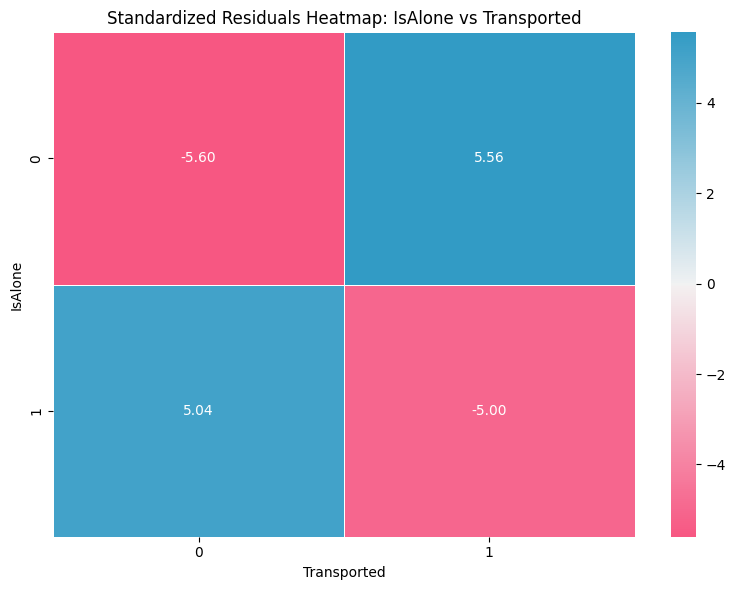

In [146]:
for feature in cat_features:
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {feature} by Transported</b></h2>"))
    bivariate_percent_plot(cat=feature, df= df_train)

### Insight for Categorical Features

`HomePlanet` <br>
There is a **statistically significant association** between 'HomePlanet' and 'Transported'.
- People from **Earth** tend to be less likely to be transported
- People from **Europa** are much more likely to be transported.
- No strong deviation from expected values → no clear transport tendency for **Mars** residents.

`Destination` <br>
There is a **statistically significant association** between 'Destination' and 'Transported'.
- **55 Cancri e** is a popular destination among the transported group (Transported = 1), while the non-transported group (Transported = 0) arrived there far less frequently than expected. Therefore, **55 Cancri e** is not a common destination for all passengers, but primarily for those who were transported.
- **55 Cancri e** is a popular destination for the transported group, while **TRAPPIST-1e** is a destination for the non-transported group, and the transported group is less abundant than expected at **TRAPPIST-1e**.
- While **55 Cancri e** and **TRAPPIST-1e** show opposite residual patterns, **PSO J318.5-22** maintains near-independence, possibly acting as a neutral or less-used route

`CabinDeck` <br>
There is a **statistically significant association** between 'CabinDeck' and 'Transported'.
- Decks **A**, **T**, and **G** show no statistically significant deviation in standardized residuals. Therefore, they can be considered independent of transport status.
- Decks **B** and **C** exhibit a strong positive association with the transported group, and a significant underrepresentation in the non-transported group.
→ This indicates that passengers from these decks were more likely to be transported.
- Conversely, decks **D**, **E**, and **F** show a significant overrepresentation in the non-transported group, and underrepresentation in the transported group.
→ This suggests that passengers from these decks were less likely to be transported.

`CabinSide` <br>
There is a **statistically significant association** between 'CabinSide' and 'Transported'.
- For side **P**, the non-transported group is significantly overrepresented, while the transported group is underrepresented.
→ This suggests that passengers located on side P were less likely to be transported.
- In contrast, side **S** shows the opposite trend:
→ The transported group is overrepresented, and the non-transported group is underrepresented, indicating that passengers on side S were more likely to be transported.

`CryoSleep` <br>
There is a **statistically significant association** between 'CryoSleep' and 'Transported'.
- `CryoSleep` status appears to be strongly associated with transport outcome. Passengers who opted for cryosleep were significantly more likely to be transported, while those who remained awake were more likely to stay untransported.

`VIP` <br>
There is a **statistically significant association** between 'VIP' and 'Transported'. 
- `VIP` status appears to have a weak but statistically significant association with transport outcome. Among `VIP` passengers, those who remained untransported were overrepresented, while those who were transported were fewer than expected.
- In contrast, no meaningful difference was observed among non-VIP passengers.

`IsAlone` <br>
There is a **statistically significant association** between 'IsAlone' and 'Transported'.
- Passengers traveling with family or in groups were significantly more likely to be transported, whereas those who traveled alone were underrepresented among the transported group.

## Multivariate Analysis

Let's look at some case studies.

### Why do more people in the non-transported group sign up for VIP than the transported group?

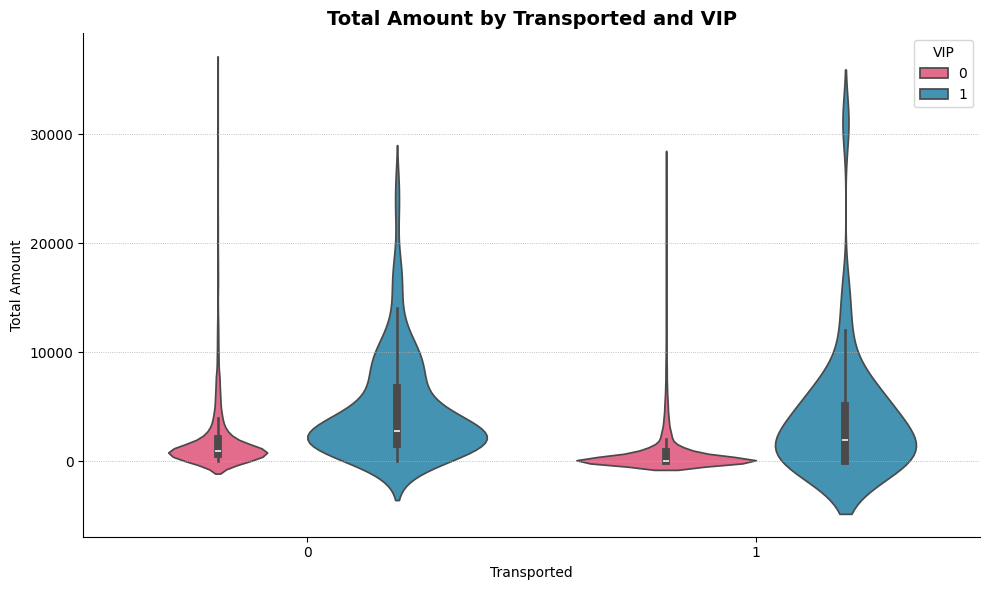

In [147]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_train, x="Transported", y="TotalAmount", hue="VIP", palette=color(n_colors=2))
plt.title("Total Amount by Transported and VIP", fontsize=14, weight="bold")
plt.ylabel("Total Amount")
plt.xlabel("Transported")
plt.legend(title="VIP")
plt.grid(axis="y", linestyle=":", linewidth=0.6)
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()

***Analysis of total passenger spending shows that non-transported individuals consistently spent more, particularly among those who were registered as VIPs.
This suggests that higher spenders may have been more likely to remain on board, engaging in premium services and amenities. Therefore, the positive correlation between VIP status and being non-transported is likely driven by spending behavior, where higher expenditure aligns with less likelihood of being transported.***

### Why do passengers traveling alone (Alone = 1) tend to remain non-transported?

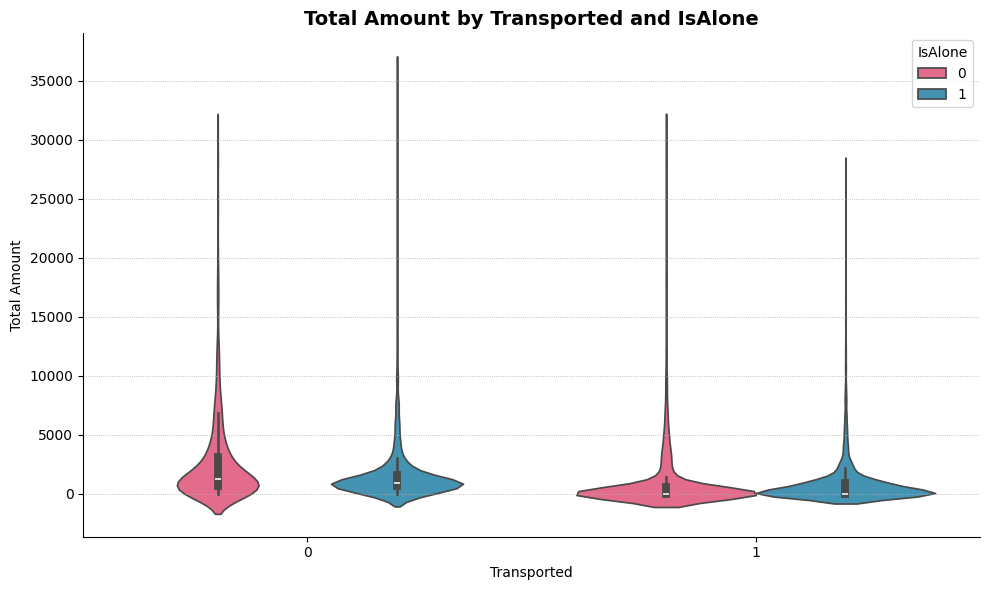

In [148]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_train, x="Transported", y="TotalAmount", hue="IsAlone", palette=color(n_colors=2))
plt.title("Total Amount by Transported and IsAlone", fontsize=14, weight="bold")
plt.ylabel("Total Amount")
plt.xlabel("Transported")
plt.legend(title="IsAlone")
plt.grid(axis="y", linestyle=":", linewidth=0.6)
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()

***The analysis of spending within the group of passengers traveling alone indicates that those who were not transported tended to spend more. This could suggest that high-spending solo passengers remained on board to enjoy premium services. Therefore, the link between higher expenditure and non-transportation remains a reasonable explanatory factor, even when focusing solely on passengers traveling alone.***

### Why do passengers on decks D, E, F tend to be retained?

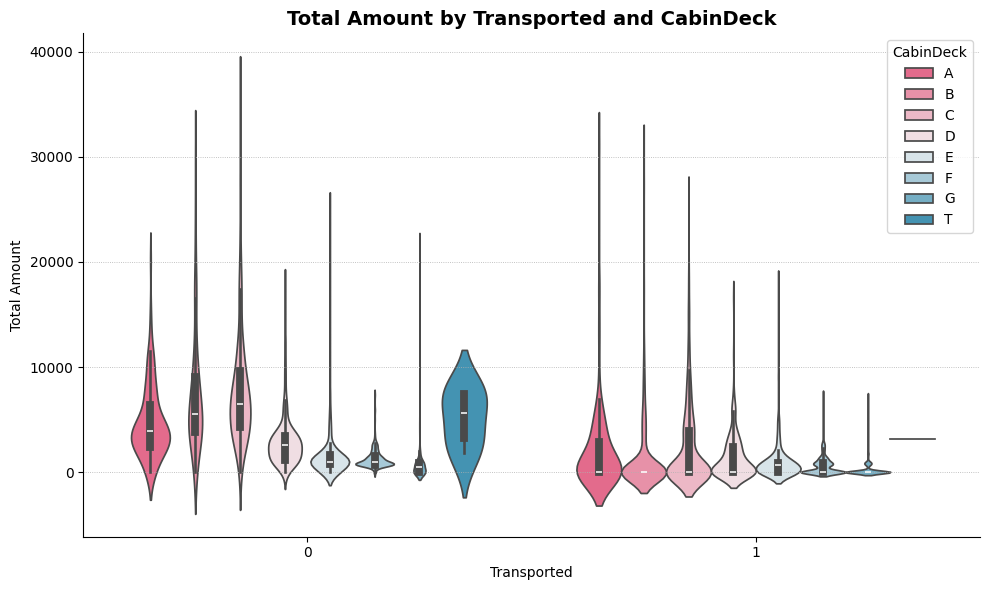

In [149]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_train, x="Transported", y="TotalAmount", hue="CabinDeck", palette=color(n_colors=len(df_train["CabinDeck"].unique())))
plt.title("Total Amount by Transported and CabinDeck", fontsize=14, weight="bold")
plt.ylabel("Total Amount")
plt.xlabel("Transported")
plt.legend(title="CabinDeck")
plt.grid(axis="y", linestyle=":", linewidth=0.6)
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()

***The analysis of spending shows that non-transported passengers on decks D, E, and F spent more than transported passengers. This further reinforces the theory that spending more to enjoy more amenities tends to be retained. Therefore, the link between higher expenditure and non-transportation remains a reasonable explanatory factor.***

### Why do passengers from Earth tend not to be transported?

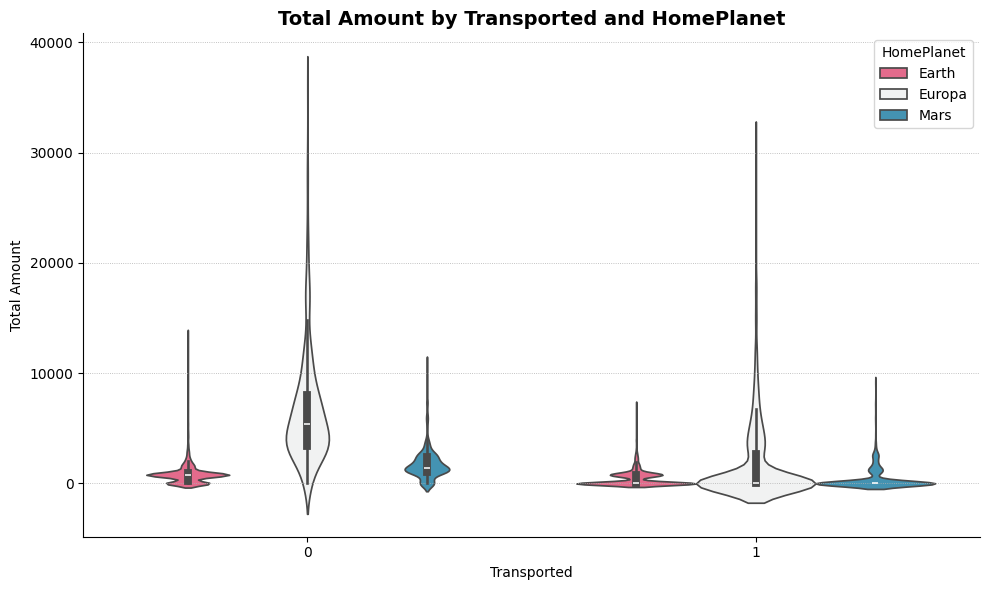

In [150]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_train, x="Transported", y="TotalAmount", hue="HomePlanet", palette=color(n_colors=len(df_train["HomePlanet"].unique())))
plt.title("Total Amount by Transported and HomePlanet", fontsize=14, weight="bold")
plt.ylabel("Total Amount")
plt.xlabel("Transported")
plt.legend(title="HomePlanet")
plt.grid(axis="y", linestyle=":", linewidth=0.6)
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()

***Based on the graph, it is clear that in the non-transported group, passengers from Earth had higher spending than passengers from Earth in the transported group. This suggests that individuals from Earth tended to stay on board to enjoy the premium services, which was reflected in their higher spending.***

#### Why do passengers from Europa who are in the non-transported group spend more than the rest of the planets but the residual value is -10.17 while passengers from the transported group spend less money and have a residual value of 10.10?

Based on the residual results between HomePlanet and Transported <br>
**Earth** `7.47` -`7.42` <br>
**Europa** `-10.17` `10.10` <br>
**Mars** `-1.15` `1.15` <br>

Combined with the results from the image **Total Amount by Transported and HomePlanet**. We can see the contradiction: "Passengers from Europa who are only in the non-transported group spend more money than the other planets but have a residual value of -10.17 while passengers from the transported group spend less but have a residual value of 10.10".

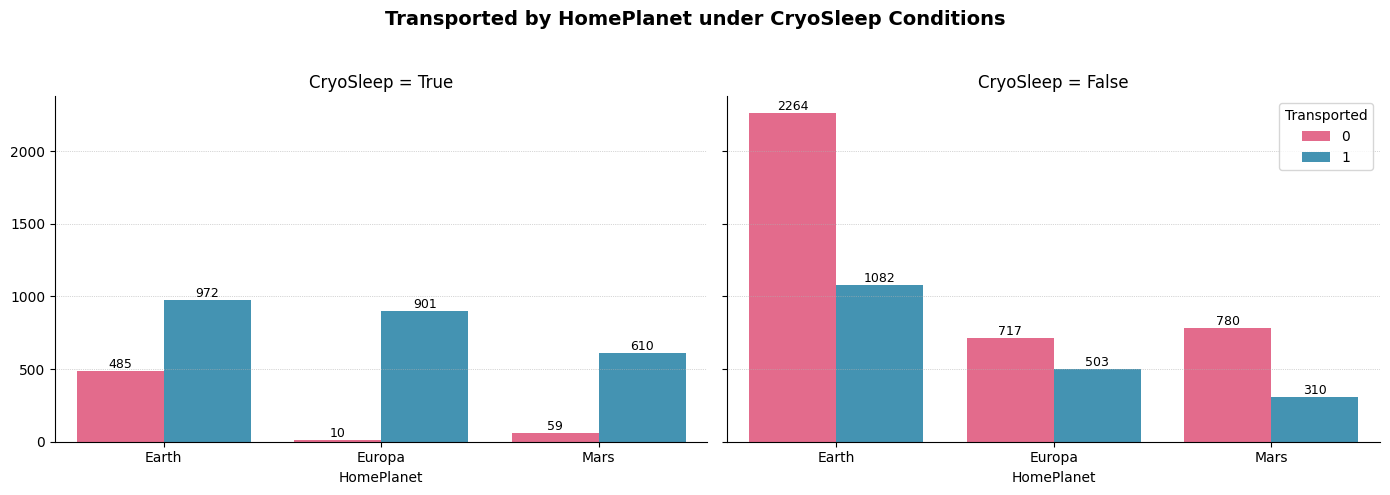

In [151]:
df_sleep = df_train[df_train["CryoSleep"] == True]
df_awake = df_train[df_train["CryoSleep"] == False]

fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
plot1 = sns.countplot(data=df_sleep, x="HomePlanet", hue="Transported", palette=color(n_colors=2), ax=ax[0])
ax[0].set_title("CryoSleep = True")
ax[0].set_xlabel("HomePlanet")
ax[0].set_ylabel("")
ax[0].grid(axis="y", linestyle=":", linewidth=0.5)
ax[0].legend().remove()
for container in plot1.containers:
    plot1.bar_label(container, fmt="%d", label_type="edge", fontsize=9)

plot2 = sns.countplot(data=df_awake, x="HomePlanet", hue="Transported", palette=color(n_colors=2), ax=ax[1])
ax[1].set_title("CryoSleep = False")
ax[1].set_xlabel("HomePlanet")
ax[1].legend(title="Transported")
ax[1].grid(axis="y", linestyle=":", linewidth=0.5)
for container in plot2.containers:
    plot2.bar_label(container, fmt="%d", label_type="edge", fontsize=9)

plt.suptitle("Transported by HomePlanet under CryoSleep Conditions", fontsize=14, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
sns.despine()
plt.show()

- Actual count: Europa - Transported = 0 includes 717 people (not in CryoSleep) and 10 people (in CryoSleep), totaling 727 passengers.
- Meanwhile, the transported group from Europa has 901 CryoSleep users and 503 non-CryoSleep passengers, totaling 1,404 people.
- The significantly larger transported group suggests that certain factors—especially CryoSleep—may have contributed to higher transportation likelihood for passengers from Europa.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>


## Handling Skewness

In [152]:
skew_feature_train, skew_train_df = check_skewness(df_train, "Train data")


🔍 Skewness for Train data:
------------------------------------------------------------
Feature               | Skewness   | Remark
------------------------------------------------------------
ShoppingMall          |  +12.7638 | Highly skewed
VRDeck                |   +7.9046 | Highly skewed
Spa                   |   +7.7164 | Highly skewed
FoodCourt             |   +7.1775 | Highly skewed
RoomService           |   +6.3978 | Highly skewed
TotalAmount           |   +4.4176 | Highly skewed
PassengerNum          |   +2.7466 | Highly skewed
GroupSize             |   +1.8890 | Highly skewed
CabinNum              |   +0.7073 | Moderately skewed
Age                   |   +0.4420 | Approximately symmetric
Group                 |   +0.0020 | Approximately symmetric
------------------------------------------------------------


In [153]:
skew_feature_test, skew_test_df = check_skewness(df_test, "Test data")


🔍 Skewness for Test data:
------------------------------------------------------------
Feature               | Skewness   | Remark
------------------------------------------------------------
VRDeck                |   +8.4658 | Highly skewed
Spa                   |   +7.7814 | Highly skewed
FoodCourt             |   +6.9974 | Highly skewed
ShoppingMall          |   +6.9020 | Highly skewed
RoomService           |   +5.6114 | Highly skewed
TotalAmount           |   +4.8102 | Highly skewed
PassengerNum          |   +2.8121 | Highly skewed
GroupSize             |   +1.9695 | Highly skewed
CabinNum              |   +0.7197 | Moderately skewed
Age                   |   +0.5204 | Moderately skewed
Group                 |   +0.0011 | Approximately symmetric
------------------------------------------------------------


In [154]:
from sklearn.preprocessing import PowerTransformer

def handle_skewed_features(
    df,
    zero_threshold=0.9,
    skew_threshold=0.5,
    num_features=None,
    exclude_cols=None,
    force_transform_cols=None,
    dataset="Train data"
    
):
    """
    Handle skewed numerical features by applying appropriate transformations,
    *forcing* certain columns to be transformed even if they don't exceed skew_threshold.

    Parameters:
    - df: pandas.DataFrame
    - zero_threshold: float (default=0.9)
    - skew_threshold: float (default=0.5)
    - num_features: list of numerical columns to consider
    - exclude_cols: list of columns to skip entirely
    - force_transform_cols: list of columns to always transform
    - dataset: Name of dataset

    Returns:
    - df: transformed DataFrame
    - transformed_cols: list of new feature names
    - high_zero_cols: list of sparse features (> zero_threshold)
    - skewed_cols: list of auto‑detected skewed features
    - pt_dict: dict mapping each YJ‑transformed col → its PowerTransformer
    """
    df = df.copy()
    if num_features is None:
        raise ValueError("`num_features` must be provided")
    if exclude_cols is None:
        exclude_cols = []

    if force_transform_cols is None and dataset == "Train data":
        force_transform_cols = ["Age"]
    else:
        force_transform_cols = []

    # 1) pick the numeric cols to scan
    numerical_cols = [c for c in num_features if c not in exclude_cols]

    # 2) detect ultra‑sparse
    zero_ratios = (df[numerical_cols] == 0).sum() / len(df)
    high_zero_cols = zero_ratios[zero_ratios > zero_threshold].index.tolist()

    # 3) compute skew
    skew_vals = df[numerical_cols].apply(lambda s: skew(s.dropna()))
    auto_skewed = skew_vals[abs(skew_vals) > skew_threshold].index.tolist()

    # 4) union these with your forced list
    to_transform = list(set(auto_skewed + force_transform_cols))

    transformed_cols = []
    dropped_cols     = []

    for col in to_transform:
        # if it's sparse → binary+log
        if col in high_zero_cols:
            df[f"Has_{col}"] = (df[col] > 0).astype(int)
            df[f"Log_{col}"] = df[col].map(lambda x: np.log1p(x) if x > 0 else 0)
            transformed_cols += [f"Has_{col}", f"Log_{col}"]
            dropped_cols.append(col)
        # if it's discrete small‑cardinality, skip transform but keep
        elif df[col].nunique() <= 5:
            # do nothing (we still keep raw col in df)
            continue
        # otherwise apply Yeo‑Johnson
        else:
            pt = PowerTransformer(method="yeo-johnson")
            arr = df[[col]].values  # shape (n,1)
            df[f"PT_{col}"] = pt.fit_transform(arr)
            transformed_cols.append(f"PT_{col}")
            dropped_cols.append(col)

    # drop originals for any column we did transform
    df.drop(columns=dropped_cols, inplace=True)

    return df, transformed_cols, high_zero_cols, auto_skewed

In [155]:
processed_train_df, transformed_columns, sparse_columns, skewed_columns = handle_skewed_features(df=df_train, num_features=skew_feature_test)

skew_feature_train, skew_train_df = check_skewness(data=processed_train_df, numerical_features=processed_train_df.select_dtypes(include=["int64", "float64"]).columns.tolist(),
                                                   dataset_name= "Train data")


🔍 Skewness for Train data:
------------------------------------------------------------
Feature               | Skewness   | Remark
------------------------------------------------------------
PT_PassengerNum       |   +0.9786 | Moderately skewed
PT_ShoppingMall       |   +0.8687 | Moderately skewed
PT_RoomService        |   +0.8375 | Moderately skewed
PT_VRDeck             |   +0.8154 | Moderately skewed
PT_FoodCourt          |   +0.7926 | Moderately skewed
PT_Spa                |   +0.7474 | Moderately skewed
PT_GroupSize          |   +0.4492 | Approximately symmetric
PT_TotalAmount        |   -0.1437 | Approximately symmetric
PT_CabinNum           |   -0.1388 | Approximately symmetric
PT_Age                |   -0.0224 | Approximately symmetric
Group                 |   +0.0020 | Approximately symmetric
------------------------------------------------------------


In [156]:
processed_test_df, transformed_columns_test, sparse_columns_test, skewed_columns_test = handle_skewed_features(df=df_test, num_features=skew_feature_test, dataset="Test data")

skew_feature_test, skew_test_df = check_skewness(data=processed_test_df, numerical_features=processed_test_df.select_dtypes(include=["int64", "float64"]).columns.tolist(),
                                                   dataset_name= "Test data")


🔍 Skewness for Test data:
------------------------------------------------------------
Feature               | Skewness   | Remark
------------------------------------------------------------
PT_PassengerNum       |   +0.9814 | Moderately skewed
PT_VRDeck             |   +0.8597 | Moderately skewed
PT_ShoppingMall       |   +0.8537 | Moderately skewed
PT_RoomService        |   +0.8194 | Moderately skewed
PT_FoodCourt          |   +0.8070 | Moderately skewed
PT_Spa                |   +0.7500 | Moderately skewed
PT_GroupSize          |   +0.4332 | Approximately symmetric
PT_TotalAmount        |   -0.1428 | Approximately symmetric
PT_CabinNum           |   -0.1320 | Approximately symmetric
PT_Age                |   +0.0061 | Approximately symmetric
Group                 |   +0.0011 | Approximately symmetric
------------------------------------------------------------


**Insight**

**Observations from the Skewness Table (`processed_train_df` and `processed_test_df`):**

🔴 **Moderately Skewed**:

* Many features still exhibit extreme skewness, for example:

  * `PT_PassengerNum`
  * `PT_VRDeck`
  * `PT_ShoppingMall`
  * `PT_RoomService`
  * `PT_FoodCourt`
  * `PT_Spa`

These features remain **Moderately skewed**, even after applying log transformations. These are generally **acceptable**, especially if we're using tree-based models (which are more robust to skewed data).

✅ **Approximately Symmetric**:

* Several features, such as:

  * `PT_GroupSize`, `PT_TotalAmount`,... show skewness < 0.5
  * This indicates that **Yeo-Johnson transformation was effective** for many variables.

**Conclusion:**

Some remain **Moderately skewed**, likely because:

   * They contain mostly `0` (`VRDeck`, `ShoppingMall`, `RoomService`, `FoodCourt`, `Spa`) and `1` (`PassengerNum`) values
   * The non-zero values are rare and extreme (e.g. mostly `0` with a few values like `300`).

## Create Test Set

Suppose you chatted with experts who told you that the **PT_TotalAmount** is a very important attribute to predict **Transported**. We may want to ensure that the test set is representative of the various categories of **PT_TotalAmount** in the whole dataset. Since the **PT_TotalAmount** is a continuous numerical attribute, we first need to create an income category attribute.

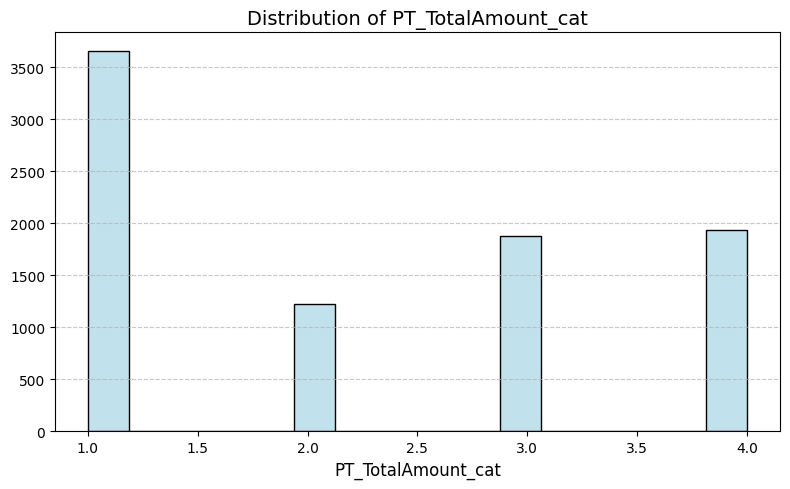

In [157]:
pt_total_amount_bins = [-np.inf, -1.14, 0.6, 0.85, np.inf]
pt_total_amount_labels = [1, 2, 3, 4]

processed_train_df["PT_TotalAmount_cat"] = pd.cut( processed_train_df["PT_TotalAmount"], bins=pt_total_amount_bins, labels=pt_total_amount_labels ).astype(int)

plt.figure(figsize=(8, 5))
sns.histplot(data=processed_train_df, x="PT_TotalAmount_cat", color="lightblue", edgecolor="black")

plt.title("Distribution of PT_TotalAmount_cat", fontsize=14)
plt.xlabel("PT_TotalAmount_cat", fontsize=12)
plt.ylabel("")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [158]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(processed_train_df, processed_train_df["PT_TotalAmount_cat"]):
    start_train_set = processed_train_df.iloc[train_index]
    start_test_set = processed_train_df.iloc[test_index]

## Scale

In [159]:
# Now we should remove the PT_TotalAmount_cat attribute so the data is back to its original state:
for set_ in (start_train_set, start_test_set): 
    set_.drop("PT_TotalAmount_cat", axis=1, inplace=True)

In [160]:
df_train_new = start_train_set.drop("Transported", axis=1)
df_train_label_new = start_train_set["Transported"].copy()

In [161]:
num_transfomer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("scaler", RobustScaler())
])

cat_transfomer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

cat_passthrough = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

In [162]:
num_features = processed_test_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_features

['Group',
 'PT_RoomService',
 'PT_PassengerNum',
 'PT_ShoppingMall',
 'PT_VRDeck',
 'PT_TotalAmount',
 'PT_FoodCourt',
 'PT_Age',
 'PT_CabinNum',
 'PT_GroupSize',
 'PT_Spa']

In [163]:
# We need to split 3 feature "CryoSleep", "VIP", "IsAlone" into list cat_features.
# Since the values of them are 0 and 1. So we do not need "one-hot encoding" them.
cat_to_keep = ["CryoSleep", "VIP", "IsAlone"]
cat_to_encode = [col for col in cat_features if col not in cat_to_keep]

In [164]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transfomer, num_features),
        ("cat", cat_transfomer, cat_features),
        ("cat_keep", cat_passthrough, cat_to_keep)
    ]
)

preprocessor.fit(df_train_new)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler', RobustScaler())]),
                                 ['Group', 'PT_RoomService', 'PT_PassengerNum',
                                  'PT_ShoppingMall', 'PT_VRDeck',
                                  'PT_TotalAmount', 'PT_FoodCourt', 'PT_Age',
                                  'PT_CabinNum', 'PT_GroupSize', 'PT_Spa']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['HomePlanet', 'Destination', 'CabinDeck',
                                  'CabinSide', 'CryoSleep', 'VIP', 'IsAlone']),
                                ('cat_keep',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['CryoSleep', 'VIP', 'IsAlone'])])

In [165]:
df_train_new_prepared = preprocessor.transform(df_train_new)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num__Group',
 'num__PT_RoomService',
 'num__PT_PassengerNum',
 'num__PT_ShoppingMall',
 'num__PT_VRDeck',
 'num__PT_TotalAmount',
 'num__PT_FoodCourt',
 'num__PT_Age',
 'num__PT_CabinNum',
 'num__PT_GroupSize',
 'num__PT_Spa',
 'cat__HomePlanet_Earth',
 'cat__HomePlanet_Europa',
 'cat__HomePlanet_Mars',
 'cat__Destination_55 Cancri e',
 'cat__Destination_PSO J318.5-22',
 'cat__Destination_TRAPPIST-1e',
 'cat__CabinDeck_A',
 'cat__CabinDeck_B',
 'cat__CabinDeck_C',
 'cat__CabinDeck_D',
 'cat__CabinDeck_E',
 'cat__CabinDeck_F',
 'cat__CabinDeck_G',
 'cat__CabinDeck_T',
 'cat__CabinSide_P',
 'cat__CabinSide_S',
 'cat__CryoSleep_0',
 'cat__CryoSleep_1',
 'cat__VIP_0',
 'cat__VIP_1',
 'cat__IsAlone_0',
 'cat__IsAlone_1',
 'cat_keep__CryoSleep',
 'cat_keep__VIP',
 'cat_keep__IsAlone']

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>

| Metric        | Definition                                                  | Meaning in Attrition Context                                          |
| ------------- | ----------------------------------------------------------- | --------------------------------------------------------------------- |
| **Recall**    | $\frac{TP}{TP + FN}$                                        | **Most important** – how many true leavers you can catch              |
| **Precision** | $\frac{TP}{TP + FP}$                                        | Among predicted leavers, how many are actually correct                |
| **Accuracy**  | $\frac{TP + TN}{Total}$                                     | Can be misleading with imbalanced data (e.g., <20% attrition)         |
| **F1-score**  | $\frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$ | Balanced trade-off between Precision and Recall                       |
| **AUC-ROC**   | Area under ROC Curve                                        | Measures ability to distinguish leavers vs. stayers at all thresholds |

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Evaluation Using Cross-Validation</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Evaluation Using Cross-Validation
    </h1>
</div>

In [166]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, HistGradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

seed = 42
max_iter = 50000

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
models = [
    LinearSVC(max_iter=max_iter, random_state=seed),
    SVC(kernel="rbf", random_state=seed),
    KNeighborsClassifier(metric = "minkowski", p = 2, n_neighbors=5),
    GaussianNB(),
    LogisticRegression(solver="liblinear", max_iter=max_iter, random_state=seed),
    DecisionTreeClassifier(max_depth=5, random_state=seed),
    RandomForestClassifier(n_estimators=100, random_state=seed),
    ExtraTreesClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed, algorithm="SAMME"),
    XGBClassifier(n_estimators= 100, learning_rate=0.05, max_depth=3, min_child_weight=2, gamma=0, 
                  subsample=0.8, colsample_bytree=0.8, reg_alpha=0.01, reg_lambda=1, use_label_encoder=False,
                  eval_metric="logloss", random_state=seed),
    MLPClassifier(max_iter=max_iter, random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    RidgeClassifier(alpha=1.0, random_state=seed, max_iter=max_iter),
    RidgeClassifierCV(alphas=[0.1, 0.5, 1.0], cv=kfold),
    CatBoostClassifier(random_seed=seed, iterations=100, learning_rate=0.05, depth=4, verbose=0),
    LGBMClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=seed, verbose=-1),
    HistGradientBoostingClassifier(max_iter=max_iter, learning_rate=0.05, random_state=seed),
    BaggingClassifier(random_state=seed)
]

In [167]:
def generate_baseline_results(models = models, X = df_train_new_prepared, y = df_train_label_new, metric = "accuracy", cv = kfold, plot_result = False):
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        model_scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
        for fold_idx, score in enumerate(model_scores):
            entries.append((model_name, fold_idx, score))
        cv_df = pd.DataFrame(entries, columns=["model_name", "fold_id", "accuracy_score"])

    # Summary
    mean = cv_df.groupby("model_name")["accuracy_score"].mean()
    std = cv_df.groupby("model_name")["accuracy_score"].std()

    baseline_result = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_result.columns = ["Mean", "Standard Deviation"]

    # Sort by accuracy
    baseline_result.sort_values(by=["Mean"], ascending=False, inplace=True)   

    if plot_result:
        plt.figure(figsize=(18, 8))
        sns.barplot(x="model_name", y="accuracy_score", data=cv_df, palette="viridis")
        plt.title("Base-Line Model Accuracy using 5-fold cross-validation", fontsize=14, weight="bold", pad=20)
        plt.xlabel("Model")
        plt.ylabel("Accuracy")
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

        return baseline_result
    else:
        return baseline_result

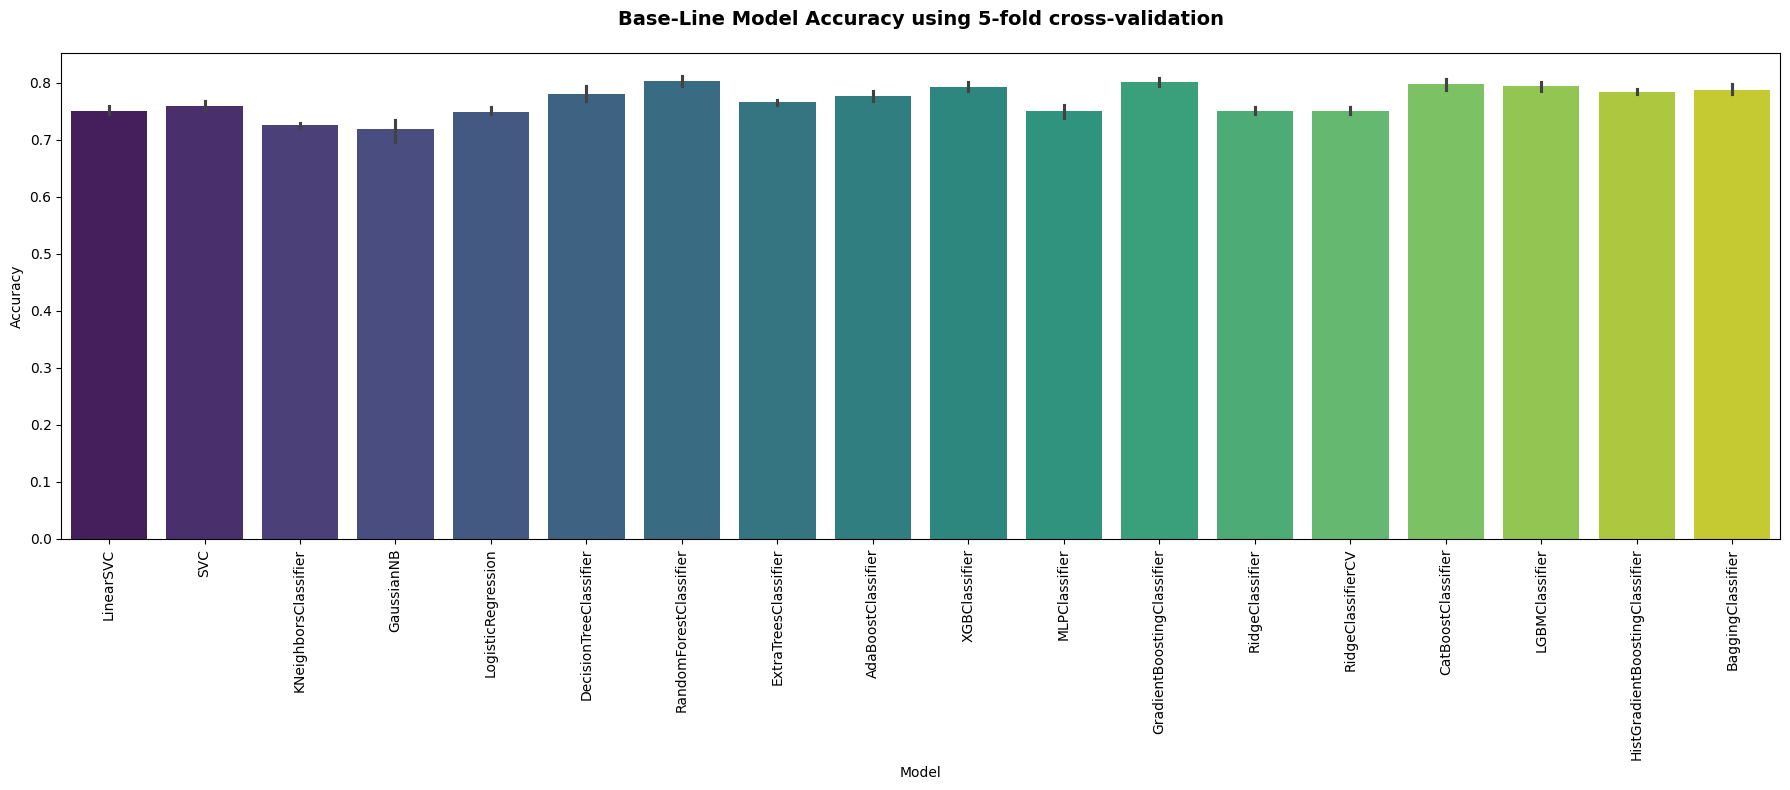

Mean  Standard Deviation
model_name                                                  
RandomForestClassifier          0.802989            0.011786
GradientBoostingClassifier      0.801121            0.009851
CatBoostClassifier              0.797528            0.011799
LGBMClassifier                  0.794508            0.009942
XGBClassifier                   0.793644            0.009329
BaggingClassifier               0.788465            0.012498
HistGradientBoostingClassifier  0.784872            0.004918
DecisionTreeClassifier          0.781131            0.016961
AdaBoostClassifier              0.777680            0.011931
ExtraTreesClassifier            0.765889            0.006433
SVC                             0.759131            0.010714
LinearSVC                       0.751366            0.009469
RidgeClassifier                 0.750791            0.008870
RidgeClassifierCV               0.750647            0.008954
MLPClassifier                   0.750645            0.014339
LogisticRegression              0.749784            0.008503
KNeighborsClassifier            0.725770            0.006562
GaussianNB                      0.719443            0.026205

In [ ]:
generate_baseline_results(plot_result = True)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Hyperparameter tuning</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
       Hyperparameter tuning
    </h1>
</div>

In [169]:
def shap_plot(model, X_test, list_feature):    
     # https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137/
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    X_test_sample = pd.DataFrame(X_test, columns=list_feature)
    explainer = shap.Explainer(model.predict, X_test_sample)
    shap_values = explainer(X_test_sample)
    shap.summary_plot(shap_values, X_test_sample)

In [170]:
def plot_ROC_confusionMatrix(estimator, X_val, y_val, figsize):
    y_pred_prob = estimator.predict_proba(X_val)[:, 1]  # Probability of positive class
    y_pred = estimator.predict(X_val)

    fig, ax = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=figsize)
    
    # Plot 1    
    # Calculate ROC
    fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
    rocScore = roc_auc_score(y_val, y_pred_prob)

    ax[0, 0].plot(fpr, tpr, label=f"{estimator.__class__.__name__} (AUC = {rocScore:.2f})")
    ax[0, 0].plot([0, 1], [0, 1], "b--")
    ax[0, 0].set_xlabel("False Positive Rate")
    ax[0, 0].set_ylabel("True Positive Rate")
    ax[0, 0].set_title(f"ROC ({estimator.__class__.__name__})", weight="bold")
    ax[0, 0].legend()

    # Plot 2
    confusionMatrix = confusion_matrix(y_val, y_pred)
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap=cmap, ax=ax[0, 1])
    ax[0, 1].set_title(f"Confusion Matrix ({estimator.__class__.__name__})", weight="bold")
    ax[0, 1].set_xlabel("Prediction")
    ax[0, 1].set_ylabel("Actual")

    # plot 3
    precision, recall, thresholds_pr = precision_recall_curve(y_val, y_pred_prob)
    pr_auc = auc(recall, precision)
    ax[1, 0].plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.3f})")
    ax[1, 0].set_xlabel("Recall")
    ax[1, 0].set_ylabel("Precision")
    ax[1, 0].set_title("Precision-Recall Curve")
    ax[1, 0].legend()
    
    ax.flat[-1].set_visible(False)

    plt.tight_layout()
    plt.show()

    print(classification_report(y_val, y_pred))

In [171]:
# Function to evaluate models
def evaluate_model(model, X_train, X_val, y_train, y_val, figsize = (15, 6), show_shap_plot = False):
    print(f"Evaluating {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    plot_ROC_confusionMatrix(estimator = model, X_val = X_val, y_val = y_val, figsize = figsize)
    if show_shap_plot:
        shap_sample = X_val.iloc[:200] if isinstance(X_val, pd.DataFrame) else X_val[:200]
        shap_plot(model=model, X_test=shap_sample, list_feature=list_feature_prepared)

In [172]:
X_val = start_test_set.drop("Transported", axis=1)
y_val = start_test_set["Transported"].copy()
X_val_prepared = preprocessor.transform(X_val)

## GradientBoostingClassifier

In [173]:
def objective_gbc(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
    }

    model = GradientBoostingClassifier(**params, random_state=seed)
    score = cross_val_score(model, X=df_train_new_prepared, y=df_train_label_new, cv=kfold,
                            scoring="accuracy", n_jobs=-1)
    return score.mean()

In [174]:
study_gbc = optuna.create_study(direction="maximize")
study_gbc.optimize(objective_gbc, n_trials=200, show_progress_bar=True)

  0%|          | 0/200 [00:00<?, ?it/s]

In [175]:
study_gbc.best_value

0.810324232346689

In [176]:
study_gbc.best_params

{'n_estimators': 282,
 'learning_rate': 0.036232708022490415,
 'max_depth': 5,
 'min_samples_split': 9,
 'min_samples_leaf': 5,
 'subsample': 0.8889252672910779,
 'max_features': None}

In [177]:
best_model_gradientBoost = GradientBoostingClassifier(**study_gbc.best_params, random_state=seed)
best_model_gradientBoost

GradientBoostingClassifier(learning_rate=0.036232708022490415, max_depth=5,
                           min_samples_leaf=5, min_samples_split=9,
                           n_estimators=282, random_state=42,
                           subsample=0.8889252672910779)

Evaluating GradientBoostingClassifier...


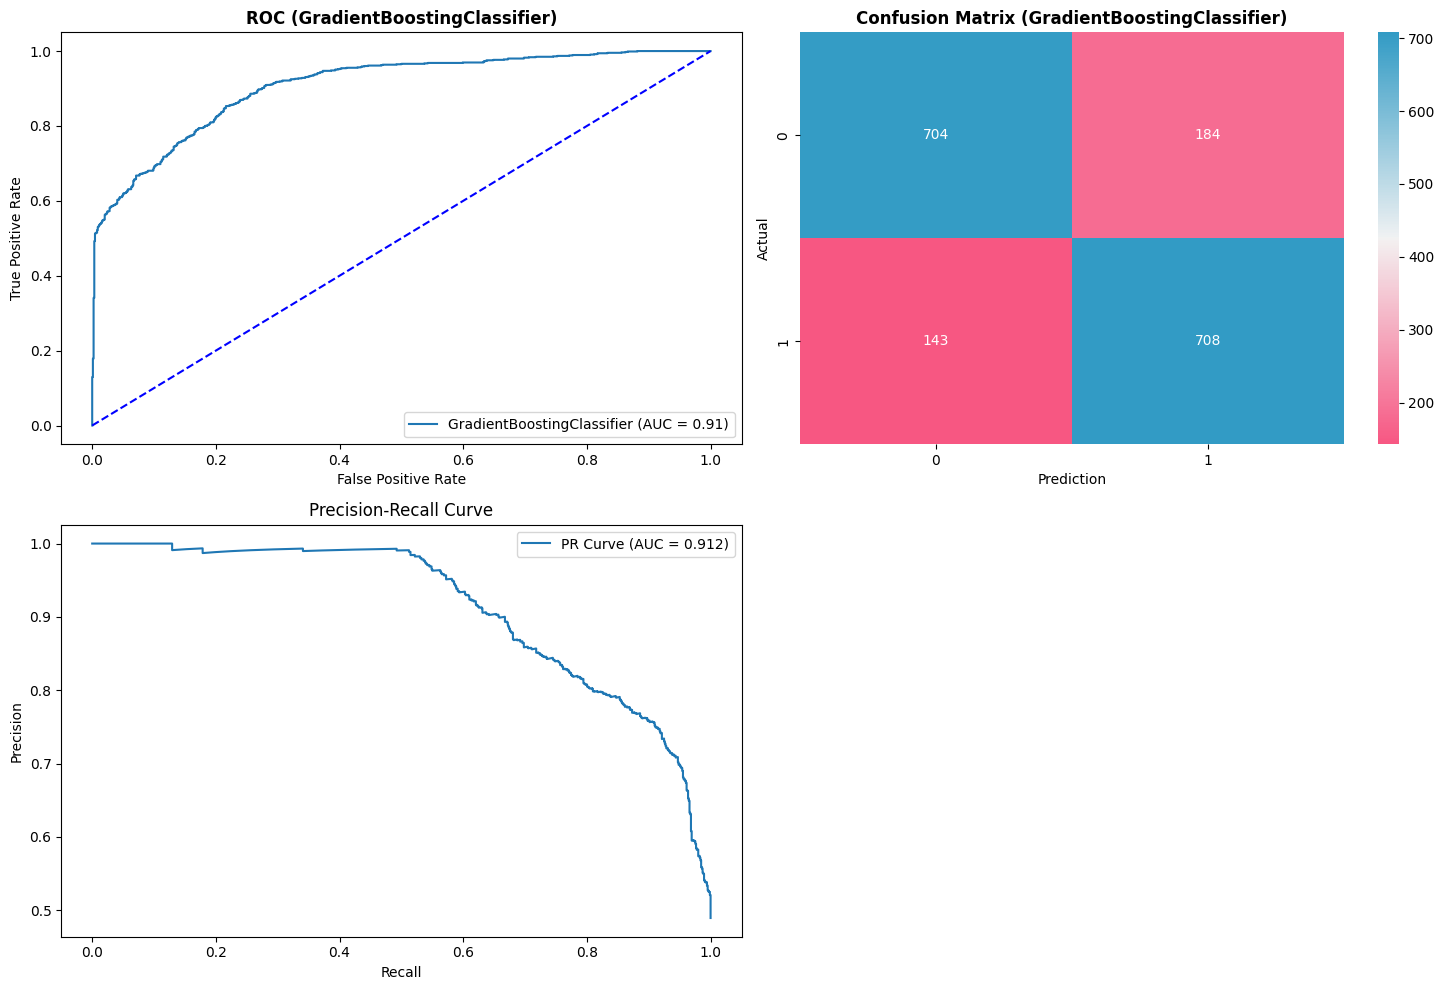

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       888
           1       0.79      0.83      0.81       851

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



In [178]:
evaluate_model(model = best_model_gradientBoost, X_train=df_train_new_prepared, X_val=X_val_prepared,
               y_train=df_train_label_new, y_val=y_val, figsize=(15, 10))

## RandomForestClassifier

In [179]:
def objective_rnd(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False])
    }

    model = RandomForestClassifier(**params, random_state=seed, n_jobs=-1)
    score = cross_val_score(model, X=df_train_new_prepared, y=df_train_label_new, cv=kfold, scoring="accuracy", n_jobs=-1)
    return score.mean()

In [180]:
study_rnd = optuna.create_study(direction="maximize")
study_rnd.optimize(objective_rnd, n_trials=300, show_progress_bar=True)

  0%|          | 0/300 [00:00<?, ?it/s]

In [181]:
study_rnd.best_value

0.8075915572358792

In [182]:
study_rnd.best_params

{'n_estimators': 277,
 'max_depth': 19,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'bootstrap': False}

In [183]:
best_model_rnd = RandomForestClassifier(**study_rnd.best_params, random_state=seed, n_jobs=-1)
best_model_rnd

RandomForestClassifier(bootstrap=False, max_depth=19, min_samples_leaf=2,
                       min_samples_split=7, n_estimators=277, n_jobs=-1,
                       random_state=42)

Evaluating RandomForestClassifier...


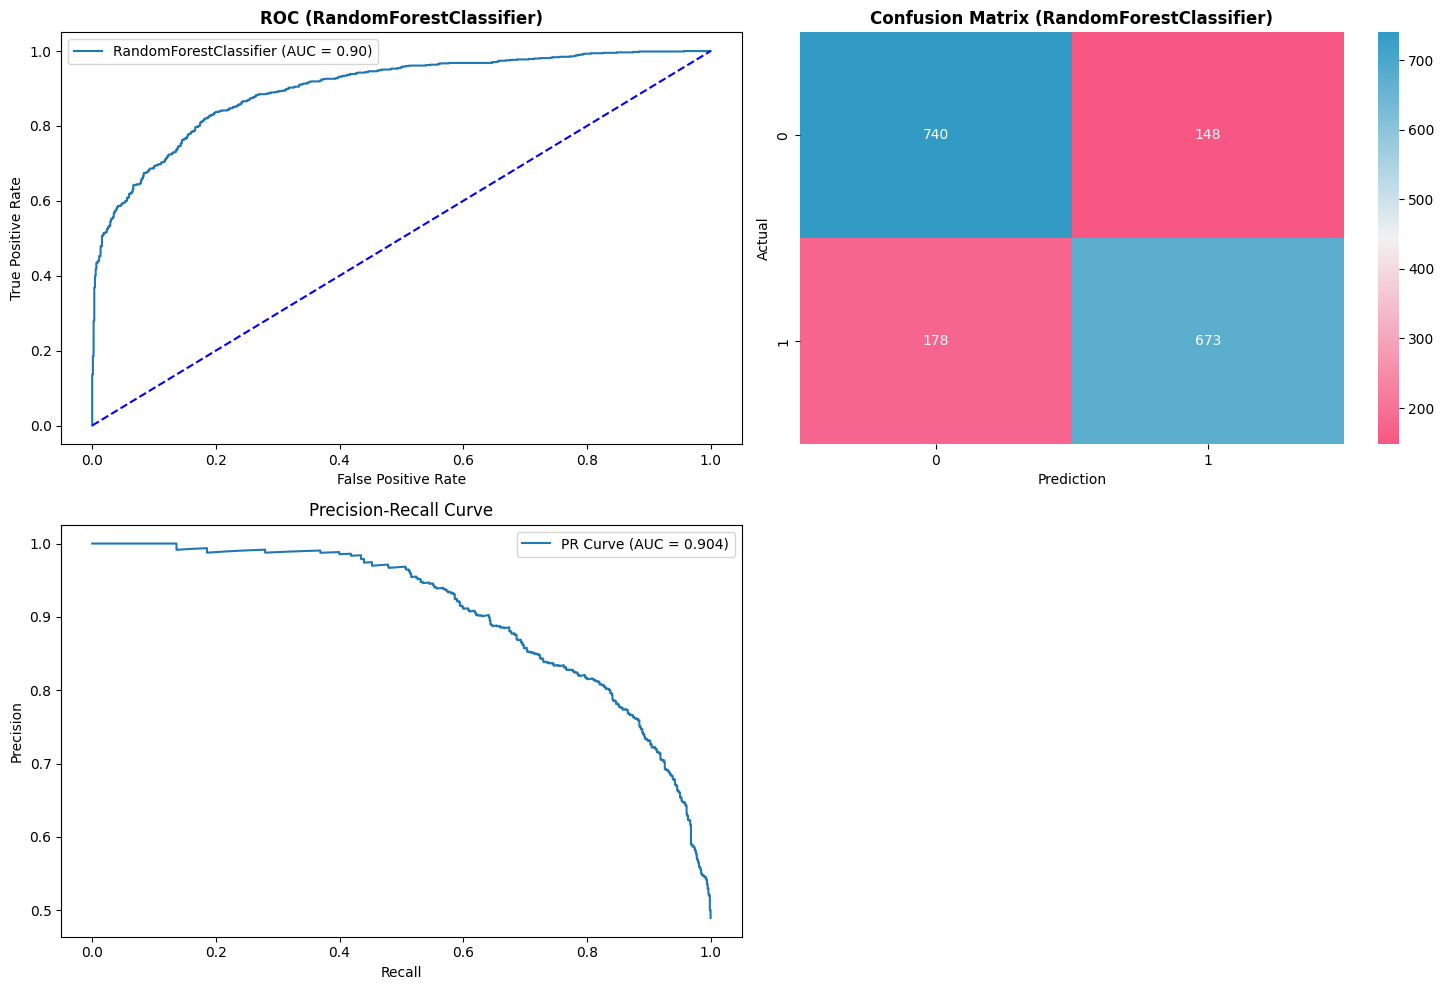

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       888
           1       0.82      0.79      0.81       851

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



In [184]:
evaluate_model(model = best_model_rnd, X_train=df_train_new_prepared, X_val=X_val_prepared,
               y_train=df_train_label_new, y_val=y_val, figsize=(15, 10))

## CatBoostClassifier

In [185]:
def objective_catboost(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 10.0),
        "random_strength": trial.suggest_float("random_strength", 1e-9, 10.0),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "verbose": 0
    }

    model = CatBoostClassifier(**params, random_seed=seed, task_type="CPU")
    score = cross_val_score(model, X=df_train_new_prepared, y=df_train_label_new, cv=kfold,
                            scoring="accuracy", n_jobs=-1)
    return score.mean()

In [186]:
study_catboost = optuna.create_study(direction="maximize")
study_catboost.optimize(objective_catboost, n_trials=300, show_progress_bar=True)

  0%|          | 0/300 [00:00<?, ?it/s]

In [187]:
study_catboost.best_value

0.8170825812391065

In [188]:
study_catboost.best_params

{'iterations': 311,
 'learning_rate': 0.08981158880189243,
 'depth': 7,
 'l2_leaf_reg': 4.708658564135874,
 'random_strength': 2.6443522655190197,
 'bagging_temperature': 0.6219837420213925,
 'border_count': 211}

In [189]:
best_model_catboost = CatBoostClassifier(**study_catboost.best_params, random_seed=seed, 
                                        early_stopping_rounds=20,
                                        eval_metric="Accuracy", verbose=0)
best_model_catboost

Evaluating CatBoostClassifier...


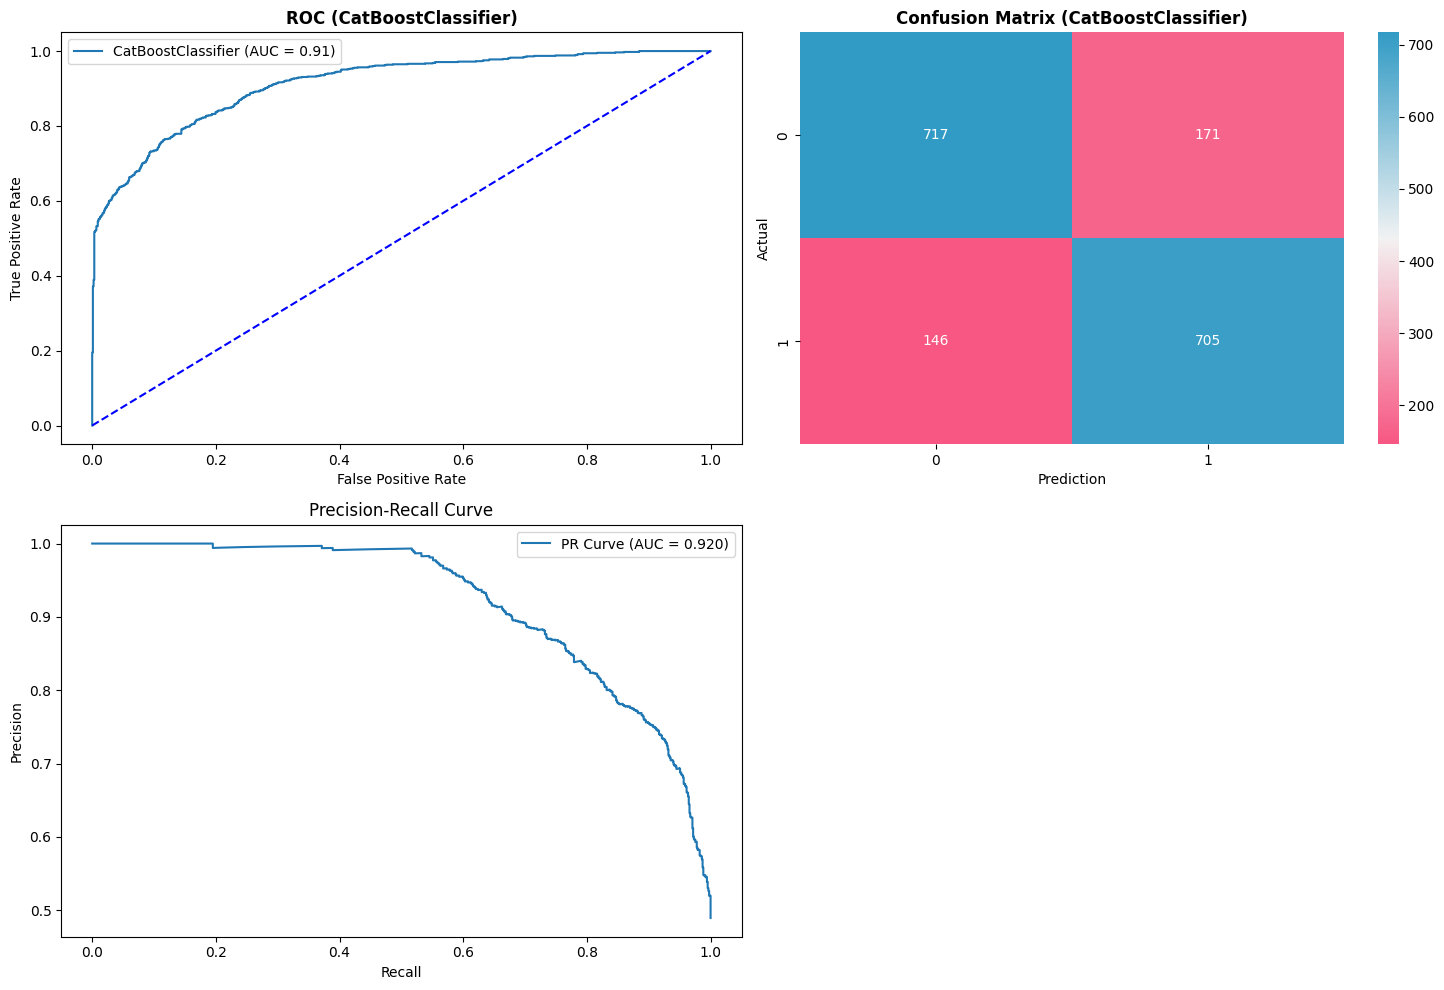

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       888
           1       0.80      0.83      0.82       851

    accuracy                           0.82      1739
   macro avg       0.82      0.82      0.82      1739
weighted avg       0.82      0.82      0.82      1739



In [190]:
evaluate_model(model = best_model_catboost, X_train=df_train_new_prepared, X_val=X_val_prepared,
               y_train=df_train_label_new, y_val=y_val, figsize=(15, 10))

## LGBMClassifier

In [191]:
def objective_lgbm(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "num_leaves": trial.suggest_int("num_leaves", 15, 127),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 50),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0)
    }

    model = LGBMClassifier(**params, random_state=42)
    score = cross_val_score(model, X=df_train_new_prepared, y=df_train_label_new, cv=kfold,
                            scoring="accuracy", n_jobs=-1)
    return score.mean()

In [192]:
study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=1000, show_progress_bar=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [193]:
study_lgbm.best_value

0.8121934946650875

In [194]:
study_lgbm.best_params

{'n_estimators': 234,
 'learning_rate': 0.03894508570196011,
 'max_depth': 5,
 'num_leaves': 17,
 'min_child_samples': 33,
 'subsample': 0.8282858386009783,
 'colsample_bytree': 0.9914818582480023,
 'reg_alpha': 0.0891812286737107,
 'reg_lambda': 0.7060729738444737}

In [195]:
best_model_LGMBC = LGBMClassifier(**study_lgbm.best_params, random_state=seed)
best_model_LGMBC

LGBMClassifier(colsample_bytree=0.9914818582480023,
               learning_rate=0.03894508570196011, max_depth=5,
               min_child_samples=33, n_estimators=234, num_leaves=17,
               random_state=42, reg_alpha=0.0891812286737107,
               reg_lambda=0.7060729738444737, subsample=0.8282858386009783)

Evaluating LGBMClassifier...


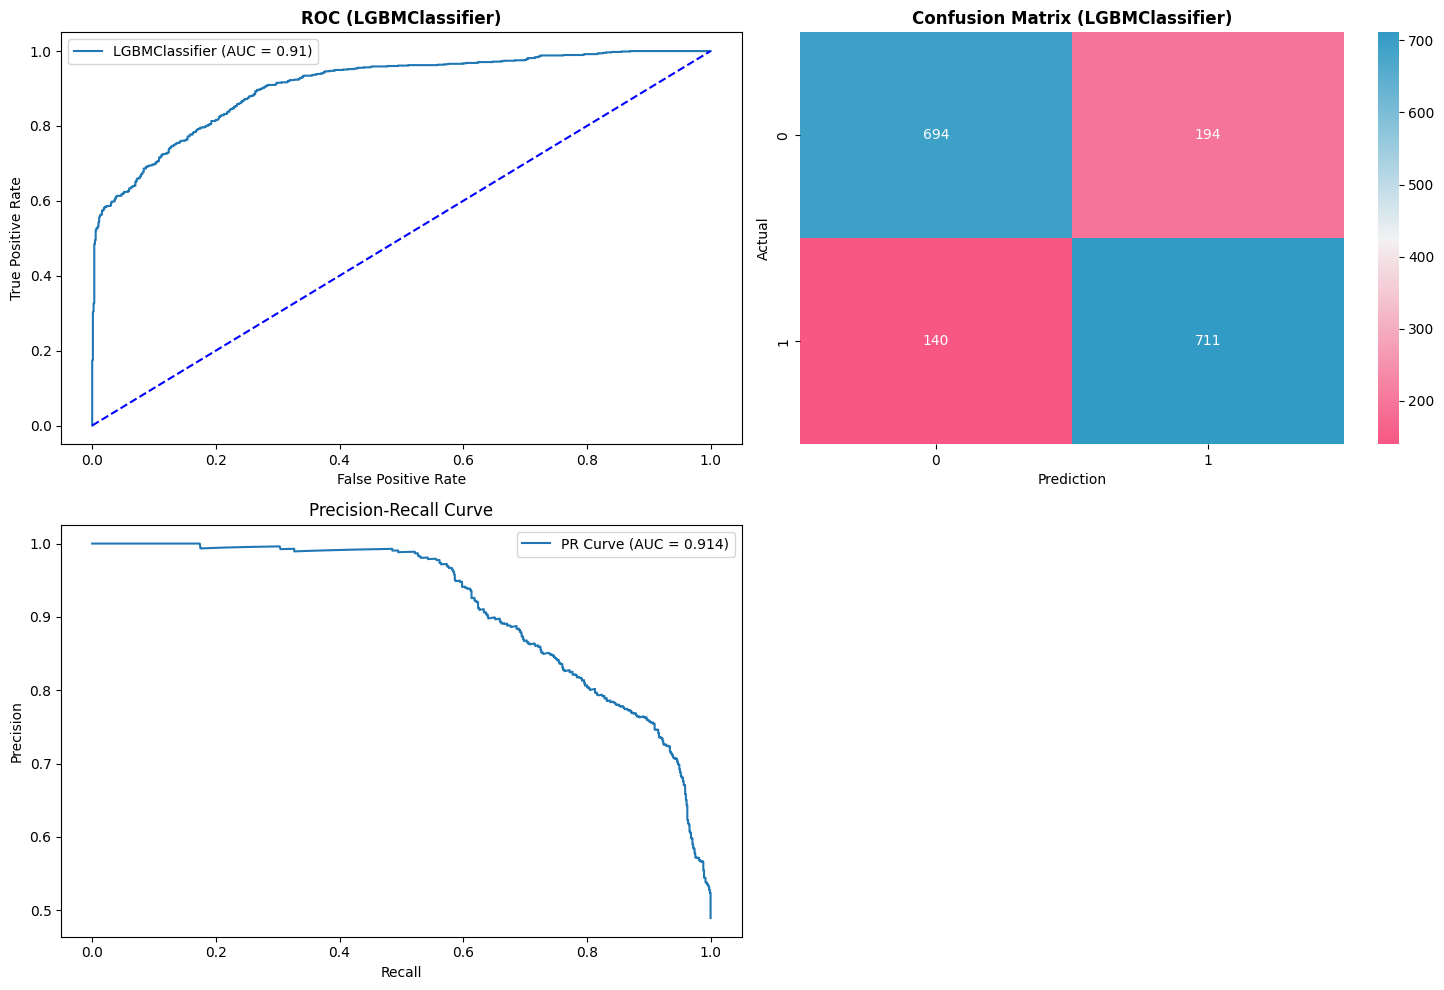

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       888
           1       0.79      0.84      0.81       851

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



In [196]:
evaluate_model(model = best_model_LGMBC, X_train=df_train_new_prepared, X_val=X_val_prepared,
               y_train=df_train_label_new, y_val=y_val, figsize=(15, 10))

## XGBClassifier

In [197]:
def objective_xgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "use_label_encoder": False,
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "random_state": 42,
        "verbosity": 0
    }

    model = XGBClassifier(**params)
    score = cross_val_score(model, X=df_train_new_prepared, y=df_train_label_new, cv=kfold,
                            scoring="accuracy", n_jobs=-1)
    return score.mean()

In [198]:
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=1000, show_progress_bar=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [199]:
study_xgb.best_value

0.8133437462826288

In [200]:
study_xgb.best_params

{'n_estimators': 130,
 'learning_rate': 0.14641652183666887,
 'max_depth': 9,
 'min_child_weight': 2,
 'gamma': 0.705583538047631,
 'subsample': 0.9219838908315608,
 'colsample_bytree': 0.9641871255411635,
 'reg_alpha': 4.160987351338609,
 'reg_lambda': 1.714740341283968}

In [201]:
best_model_xgb = XGBClassifier(**study_xgb.best_params)
best_model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9641871255411635, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.705583538047631, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.14641652183666887,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=130, n_jobs=None,
              num_parallel_tree=None, ...)

Evaluating XGBClassifier...


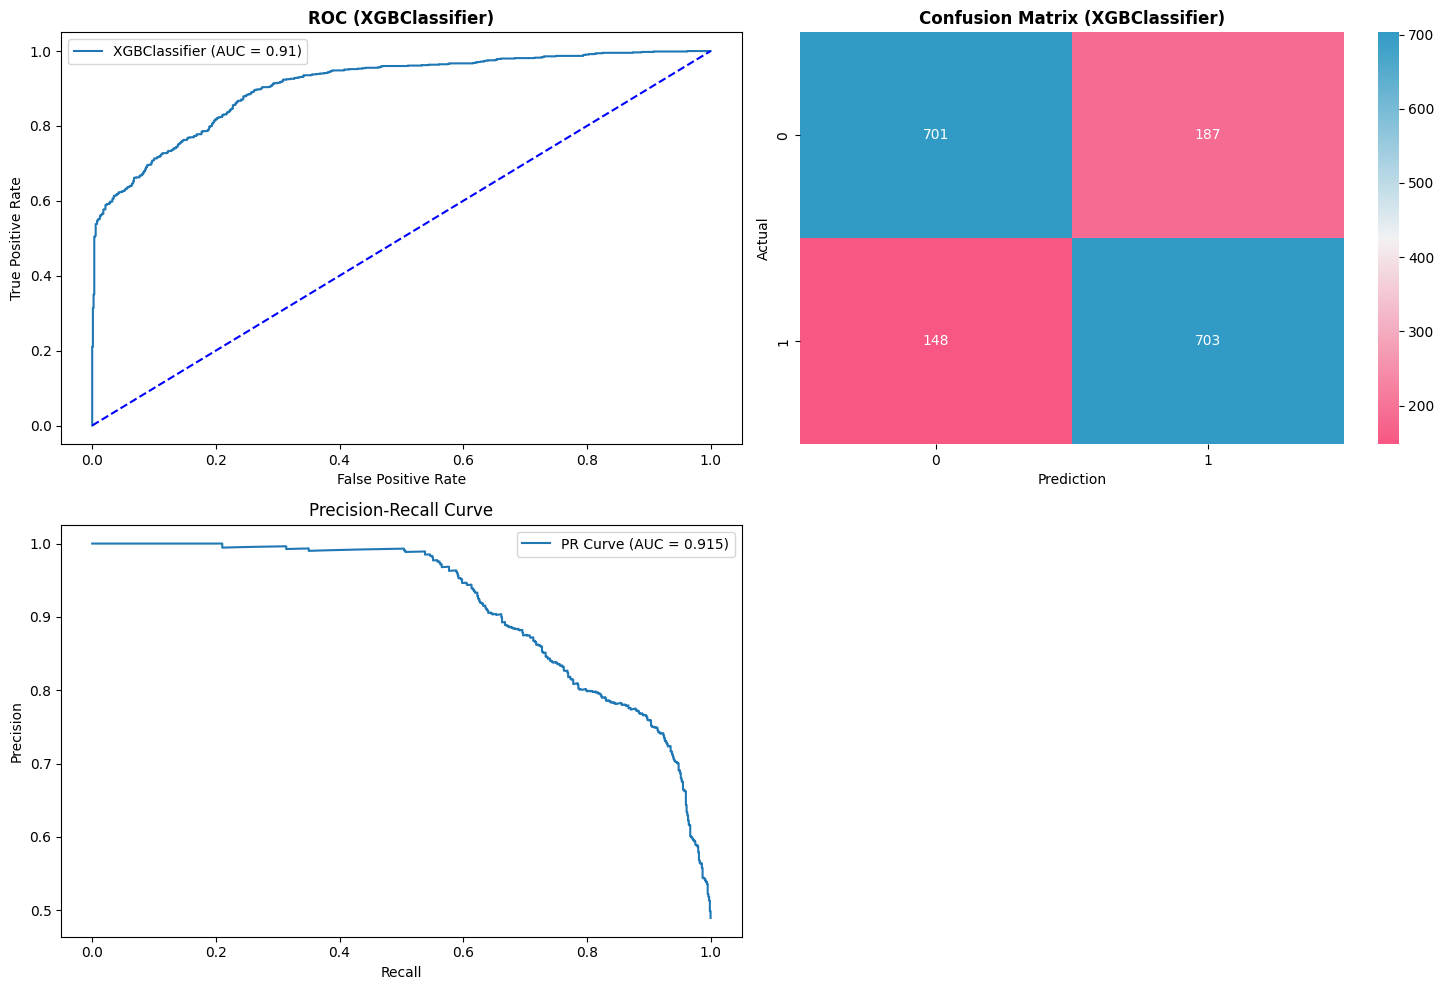

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       888
           1       0.79      0.83      0.81       851

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



In [202]:
evaluate_model(model = best_model_xgb, X_train=df_train_new_prepared, X_val=X_val_prepared,
               y_train=df_train_label_new, y_val=y_val, figsize=(15, 10))

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Prepare Final Submission File</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
       Prepare Final Submission File
    </h1>
</div>

In [203]:
df_test_prepared = preprocessor.transform(processed_test_df)

PermutationExplainer explainer: 1001it [01:03, 14.71it/s]                          


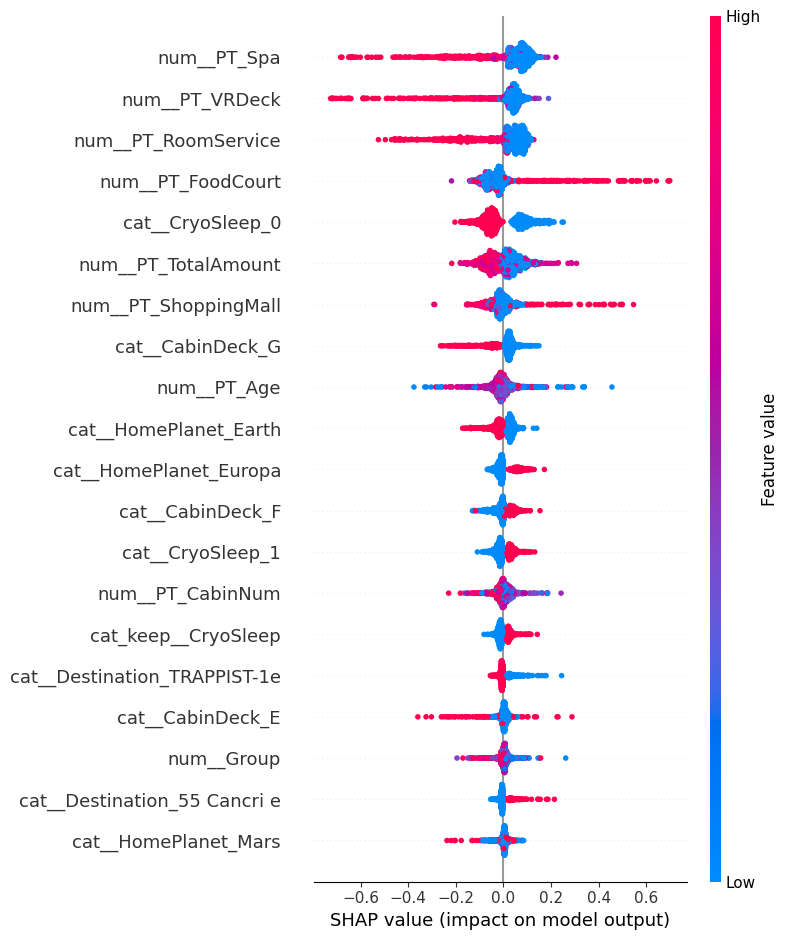

In [204]:
shap_plot(
    model = best_model_catboost,
    X_test = df_test_prepared[:1000],
    list_feature = list_feature_prepared
)

In [205]:
y_pred_final = best_model_catboost.predict(df_test_prepared)
y_pred_final = y_pred_final.astype(bool)

In [206]:
submission_df = pd.DataFrame({
    "PassengerId": list_test_PassengerId,
    "Transported": y_pred_final
})

submission_df.to_csv("submission.csv", index=False)
print("\nSubmission file saved!")
submission_df.head(10)


Submission file saved!


PassengerId  Transported
0     0013_01        False
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True
5     0027_01         True
6     0029_01         True
7     0032_01         True
8     0032_02         True
9     0033_01         True

**Insight**

Based on the SHAP graph, we can completely determine the factors that affect transported. <br>
Through the SHAP graphs from the models, we can conclude a few main points:
- Passengers who spend a lot of money (for services and amenities such as `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` and `TotalAmount`) tend to stay.
- Passengers coming from `Earth` are less likely to be Transported. Meanwhile, passengers coming from `Europa` are more likely to be Transported.

Regarding the parameter optimization of the models, we can increase the value of n_trials to find the optimization. This depends on the hardware configuration.